In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold 
from sklearn.metrics import make_scorer, mean_squared_error , accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score , mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Initial Dataset

In [5]:
data=pd.read_csv('dataset.csv')

In [6]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


In [7]:
data.info

<bound method DataFrame.info of       business_code cust_number       name_customer           clear_date  \
0              U001  0200769623        WAL-MAR corp  2020-02-11 00:00:00   
1              U001  0200980828              BEN E   2019-08-08 00:00:00   
2              U001  0200792734          MDV/ trust  2019-12-30 00:00:00   
3              CA02  0140105686            SYSC llc                  NaN   
4              U001  0200769623  WAL-MAR foundation  2019-11-25 00:00:00   
...             ...         ...                 ...                  ...   
49995          U001  0200561861      CO corporation                  NaN   
49996          U001  0200769623          WAL-MAR co  2019-09-03 00:00:00   
49997          U001  0200772595    SAFEW associates  2020-03-05 00:00:00   
49998          U001  0200726979           BJ'S  llc  2019-12-12 00:00:00   
49999          U001  0200020431            DEC corp  2019-01-15 00:00:00   

       buisness_year        doc_id posting_date  docume

In [8]:
#to check if any missing data
(data.isna().sum() / len(data)).sort_values(ascending=False)

area_business             1.00000
clear_date                0.20000
invoice_id                0.00012
business_code             0.00000
invoice_currency          0.00000
cust_payment_terms        0.00000
baseline_create_date      0.00000
total_open_amount         0.00000
posting_id                0.00000
document type             0.00000
due_in_date               0.00000
cust_number               0.00000
document_create_date.1    0.00000
document_create_date      0.00000
posting_date              0.00000
doc_id                    0.00000
buisness_year             0.00000
name_customer             0.00000
isOpen                    0.00000
dtype: float64

In [9]:
# First five data in csv
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [10]:
#last five data in the csv
data.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0
49999,U001,0200020431,DEC corp,2019-01-15 00:00:00,2019.0,1.928576e+09,2019-01-05,20190105,20190105,20190124.0,USD,RV,1.0,NaN,1790.30,20190101.0,NAM4,1.928576e+09,0


In [11]:
#a DataFrame where each row represents a statistic (e.g., count, mean, std, min, 25%, 50%, 75%, max) and each column represents a numerical column
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


In [12]:
#each value represents the number of missing values (NaNs) in the corresponding column.
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [13]:
#each value represents the percentage of missing values in the corresponding column.
(data.isnull().sum()/(len(data)))*100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

# Data cleaning:

In [14]:
# Display invoice_id and doc_id (Noticing the data values in the both columns are same

In [15]:
(data['doc_id'] == data['invoice_id']).sum()

49994

In [16]:
# Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

In [17]:
data[['baseline_create_date','document_create_date','document_create_date.1']].corr().style.background_gradient(cmap='gist_ncar',vmin=0.999999)

,baseline_create_date,document_create_date,document_create_date.1
baseline_create_date,1.000000,0.994078,0.999527
document_create_date,0.994078,1.000000,0.994547
document_create_date.1,0.999527,0.994547,1.000000


In [18]:
# Checking if the column posting_id is constant with the rest of the columns.

In [19]:
print("Number of unique values in posting_id column: ",data['posting_id'].nunique())
print("Hence Posting ID is a constant column")

Number of unique values in posting_id column:  1
Hence Posting ID is a constant column


In [20]:
# Checking whether isOpen column is constant and relevent to the other columns.

In [21]:
print("Number of unique values in posting_id column: ",data['isOpen'].nunique())
print("\nNumber of value count of each unique value:\n",data['isOpen'].value_counts())
print("\nWe can see maximum rows are have same values and hence its a Quasi Constant column and needs to be dropped.")

Number of unique values in posting_id column:  2

Number of value count of each unique value:
 isOpen
0    40000
1    10000
Name: count, dtype: int64

We can see maximum rows are have same values and hence its a Quasi Constant column and needs to be dropped.


In [22]:
# Write the code to drop all the following columns from the dataframe'area_business',"posting_id","invoice_id","document_create_date","isOpen",'document type','document_create_date.1'.

In [23]:
drop_cols=['area_business',"posting_id","invoice_id","document_create_date","isOpen",'document type','document_create_date.1']
data=data.drop(columns=drop_cols)
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4


# Dropping Duplicates:

In [24]:
# Show all the duplicate rows from the dataset

In [25]:
data[data.duplicated(keep = 'first')]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


In [26]:
# Display the number of duplicate rows 

In [27]:
(data.duplicated()==True).sum()

1161

In [28]:
# Drop all the duplicated rows 

In [29]:
data=data.drop_duplicates(keep = 'first')

In [30]:
# Checking if there are any duplicate rows in the dataset

In [31]:
(data.duplicated()==True).sum()

0

In [32]:
# Checking for the number of rows and columns in the dataset 

In [33]:
data.shape

(48839, 12)

In [34]:
# Finding out the total Null values in each columns

In [35]:
data.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

# Data type conversion

In [36]:
data.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

In [37]:
# Check the datatype format of columns clear_date, posting_date, due_in_date, baseline_create_date.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48839 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         48839 non-null  object 
 1   cust_number           48839 non-null  object 
 2   name_customer         48839 non-null  object 
 3   clear_date            39158 non-null  object 
 4   buisness_year         48839 non-null  float64
 5   doc_id                48839 non-null  float64
 6   posting_date          48839 non-null  object 
 7   due_in_date           48839 non-null  float64
 8   invoice_currency      48839 non-null  object 
 9   total_open_amount     48839 non-null  float64
 10  baseline_create_date  48839 non-null  float64
 11  cust_payment_terms    48839 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.8+ MB


In [39]:
# Ensure that the relevant date columns are in datetime format
data['posting_date'] = pd.to_datetime(data['posting_date'], format='mixed')
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'], format='ISO8601')
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='ISO8601')

# Extract day, month, and year for 'posting_date'
data['posting_day'] = data['posting_date'].dt.day
data['posting_month'] = data['posting_date'].dt.month
data['posting_year'] = data['posting_date'].dt.year

# Extract day, month, and year for 'baseline_create_date'
data['baseline_create_day'] = data['baseline_create_date'].dt.day
data['baseline_create_month'] = data['baseline_create_date'].dt.month
data['baseline_create_year'] = data['baseline_create_date'].dt.year

# Extract day, month, and year for 'due_in_date'
data['due_in_day'] = data['due_in_date'].dt.day
data['due_in_month'] = data['due_in_date'].dt.month
data['due_in_year'] = data['due_in_date'].dt.year

# Display the first few rows to verify the new columns
data.head()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,...,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,...,NAH4,26,1,2020,26,1,2020,10,2,2020
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,...,NAD1,22,7,2019,22,7,2019,11,8,2019
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,...,NAA8,14,9,2019,14,9,2019,29,9,2019
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,...,CA10,30,3,2020,31,3,2020,10,4,2020
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,...,NAH4,13,11,2019,13,11,2019,28,11,2019


In [40]:
data['due_in_date']

0       2020-02-10
1       2019-08-11
2       2019-09-29
3       2020-04-10
4       2019-11-28
           ...    
49995   2020-05-06
49996   2019-08-30
49997   2020-03-05
49998   2019-12-12
49999   2019-01-24
Name: due_in_date, Length: 48839, dtype: datetime64[ns]

In [41]:
data.dtypes

business_code                    object
cust_number                      object
name_customer                    object
clear_date                       object
buisness_year                   float64
doc_id                          float64
posting_date             datetime64[ns]
due_in_date              datetime64[ns]
invoice_currency                 object
total_open_amount               float64
baseline_create_date     datetime64[ns]
cust_payment_terms               object
posting_day                       int32
posting_month                     int32
posting_year                      int32
baseline_create_day               int32
baseline_create_month             int32
baseline_create_year              int32
due_in_day                        int32
due_in_month                      int32
due_in_year                       int32
dtype: object

# Converting CAD currencies as USD:

In [42]:
# The invoice currency contains two different currencies CAD & USD 

In [43]:
data['invoice_currency'].value_counts()

invoice_currency
USD    45011
CAD     3828
Name: count, dtype: int64

In [44]:
# Display the total_open_amount columns value

In [45]:
pd.DataFrame(data['total_open_amount'])

,total_open_amount
0,54273.28
1,79656.60
2,2253.86
3,3299.70
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


In [46]:
#Convert all CAD currencies into USD for the total_open_amount column.
# 1 CAD = 0.7 USD

In [47]:
data['converted_usd'] = np.where((data['invoice_currency']=='CAD'),data['total_open_amount']*0.7,data['total_open_amount'])

In [48]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,...,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,...,26,1,2020,26,1,2020,10,2,2020,54273.28
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,...,22,7,2019,22,7,2019,11,8,2019,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,...,14,9,2019,14,9,2019,29,9,2019,2253.86
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,...,30,3,2020,31,3,2020,10,4,2020,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,...,13,11,2019,13,11,2019,28,11,2019,33133.29


In [49]:
# Display the new converted_usd column in the dataframe

In [50]:
pd.DataFrame(data['converted_usd'])

,converted_usd
0,54273.28
1,79656.60
2,2253.86
3,2309.79
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


In [51]:
# Display year wise total number of records 

In [52]:
data['buisness_year'].value_counts()

buisness_year
2019.0    33975
2020.0    14864
Name: count, dtype: int64

In [53]:
# Write a code to delete the following columns -> invoice_currency & total_open_amount

In [54]:
del_cols=['invoice_currency','total_open_amount']
data=data.drop(columns=del_cols)
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,26,1,2020,26,1,2020,10,2,2020,54273.28
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,22,7,2019,22,7,2019,11,8,2019,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,14,9,2019,14,9,2019,29,9,2019,2253.86
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,30,3,2020,31,3,2020,10,4,2020,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,13,11,2019,13,11,2019,28,11,2019,33133.29


In [55]:
# Write a code to check the number of columns existing in the dataframe

In [56]:
print("Number of remaining columns in the data: ", data.shape[1],"\n")
print(data.columns)

Number of remaining columns in the data:  20 

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'posting_day',
       'posting_month', 'posting_year', 'baseline_create_day',
       'baseline_create_month', 'baseline_create_year', 'due_in_day',
       'due_in_month', 'due_in_year', 'converted_usd'],
      dtype='object')


# Manually replacing all the string values of cust_number column into integer:

In [58]:
# Check the datatype of the 'cust_number' column
print(data['cust_number'].dtype)

# If the datatype is not 'object' (string), convert it to string
if data['cust_number'].dtype != 'object':
    data['cust_number'] = data['cust_number'].astype(str)

# Now, replace the string values with integers
data['cust_number'] = data['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC', "3").astype(np.int64)

int64


In [59]:
data.dtypes

business_code                    object
cust_number                       int64
name_customer                    object
clear_date                       object
buisness_year                   float64
doc_id                          float64
posting_date             datetime64[ns]
due_in_date              datetime64[ns]
baseline_create_date     datetime64[ns]
cust_payment_terms               object
posting_day                       int32
posting_month                     int32
posting_year                      int32
baseline_create_day               int32
baseline_create_month             int32
baseline_create_year              int32
due_in_day                        int32
due_in_month                      int32
due_in_year                       int32
converted_usd                   float64
dtype: object

# Splitting the dataset

In [60]:
# Look for all the columns which has Null value 

In [61]:
data.columns[data.isna().any()].to_list()

['clear_date']

In [62]:
# Find the number of Null values from the column which we got from the above code 

In [63]:
data['clear_date'].isna().sum()

9681

# On basis of the above column we are spliting data into dataset

# First dataframe (refer that as maindata) only containing the rows, that have NULL data in that column ( This is going to be our train dataset )

# Second dataframe (refer that as nulldata) that contains the columns, that have Not Null data in that column ( This is going to be our test dataset )

In [64]:
maindata = data.loc[~data['clear_date'].isnull()]
maindata = maindata.reset_index(drop=True)
nulldata = data.loc[data['clear_date'].isnull()]

In [65]:
# Check the number of rows and column for both dataframes 

In [66]:
maindata.shape

(39158, 20)

In [67]:
nulldata.shape

(9681, 20)

In [68]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd
0,U001,200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,26,1,2020,26,1,2020,10,2,2020,54273.280
1,U001,200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,22,7,2019,22,7,2019,11,8,2019,79656.600
2,U001,200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,14,9,2019,14,9,2019,29,9,2019,2253.860
3,U001,200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,13,11,2019,13,11,2019,28,11,2019,33133.290
4,CA02,140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,20,9,2019,24,9,2019,4,10,2019,15558.088


In [69]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd
3,CA02,140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,30,3,2020,31,3,2020,10,4,2020,2309.79
7,U001,200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,19,3,2020,19,3,2020,3,4,2020,11173.02
10,U001,200418007,AM,NaN,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,11,3,2020,11,3,2020,26,3,2020,3525.59
14,U001,200739534,OK systems,NaN,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,15,4,2020,15,4,2020,30,4,2020,121105.65
15,U001,200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,23,4,2020,16,4,2020,26,4,2020,3726.06


# Considering the Maindata

# Data Preprocessing:

## Delay Table

In [70]:
# Generate a new column Delay from the existing columns.

In [71]:
# # Ensure that the relevant date columns are in datetime format
maindata['clear_date'] = pd.to_datetime(maindata['clear_date'], format='ISO8601')
# maindata['due_in_date'] = pd.to_datetime(maindata['due_in_date'], format='ISO8601')

# # Check the data types to confirm the conversion
# print(maindata[['clear_date', 'due_in_date']].dtypes)

# Generate a new column 'Delay' from the existing columns
maindata['Delay'] = maindata['clear_date'] - maindata['due_in_date']


maindata['clear_date'].info()


# Display the first few rows to verify the new column
print(maindata.head())

<class 'pandas.core.series.Series'>
RangeIndex: 39158 entries, 0 to 39157
Series name: clear_date
Non-Null Count  Dtype         
--------------  -----         
39158 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 306.0 KB
  business_code  cust_number       name_customer clear_date  buisness_year  \
0          U001    200769623        WAL-MAR corp 2020-02-11         2020.0   
1          U001    200980828              BEN E  2019-08-08         2019.0   
2          U001    200792734          MDV/ trust 2019-12-30         2019.0   
3          U001    200769623  WAL-MAR foundation 2019-11-25         2019.0   
4          CA02    140106181    THE  corporation 2019-12-04         2019.0   

         doc_id posting_date due_in_date baseline_create_date  \
0  1.930438e+09   2020-01-26  2020-02-10           2020-01-26   
1  1.929646e+09   2019-07-22  2019-08-11           2019-07-22   
2  1.929874e+09   2019-09-14  2019-09-29           2019-09-14   
3  1.930148e+09   2019-11-13  2

## Mean (or) Avg delay Days

In [72]:
# Generate a new column named avg_delay from the existing columns.

#This new column "avg_delay" is meant to store "customer_name" wise delay

#groupby('name_customer')['Delay'].mean(numeric_only=False)

#Display the new "avg_delay" column

In [73]:
avg_del = maindata.groupby('name_customer')['Delay'].mean().to_frame()
avg_del.rename(columns={'Delay': 'avg_delay'}, inplace=True)
avg_del.head()

,avg_delay
name_customer,
11078 us,17 days
17135 associates,-10 days
17135 llc,-3 days
236008 associates,-3 days
99 CE,2 days


# You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column.

In [74]:
# Map the mean delay back to the maindata DataFrame
maindata['avg_delay'] = maindata['name_customer'].map(avg_del['avg_delay'])
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,...,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,...,2020,26,1,2020,10,2,2020,54273.280,1 days,-3 days +07:08:49.779837776
1,U001,200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,...,2019,22,7,2019,11,8,2019,79656.600,-3 days,19 days 00:00:00
2,U001,200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,...,2019,14,9,2019,29,9,2019,2253.860,92 days,8 days 02:10:54.545454545
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,...,2019,13,11,2019,28,11,2019,33133.290,-3 days,-3 days +19:33:27.692307693
4,CA02,140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,...,2019,24,9,2019,4,10,2019,15558.088,61 days,71 days 10:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,U001,200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,...,2019,10,7,2019,25,7,2019,84780.400,0 days,-1 days +14:45:00
39154,U001,200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,...,2019,15,8,2019,30,8,2019,6766.540,4 days,-3 days +12:40:08.540925267
39155,U001,200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,...,2020,19,2,2020,5,3,2020,6120.860,0 days,1 days 01:08:34.285714285
39156,U001,200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,...,2019,27,11,2019,12,12,2019,63.480,0 days,1 days 13:36:42.985074626


In [75]:
import pandas as pd
import numpy as np

# Assuming the initial DataFrame 'maindata' is already defined and contains the relevant columns

# Step 1: Group by 'name_customer' to compute the mean delay as a Timedelta
avg_del = maindata.groupby('name_customer')['Delay'].mean().to_frame()
avg_del.rename(columns={'Delay': 'avg_delay'}, inplace=True)

# Step 2: Ensure the avg_delay is treated as a Timedelta after mapping
avg_del['avg_delay'] = pd.to_timedelta(avg_del['avg_delay'])

# Step 3: Map the mean delay back to the maindata DataFrame
maindata['avg_delay'] = maindata['name_customer'].map(avg_del['avg_delay'])

# Step 4: Convert the Timedelta values to seconds
maindata['avg_delay_seconds'] = maindata['avg_delay'].dt.total_seconds()

# Display the updated dataframe
print(maindata.head())


  business_code  cust_number       name_customer clear_date  buisness_year  \
0          U001    200769623        WAL-MAR corp 2020-02-11         2020.0   
1          U001    200980828              BEN E  2019-08-08         2019.0   
2          U001    200792734          MDV/ trust 2019-12-30         2019.0   
3          U001    200769623  WAL-MAR foundation 2019-11-25         2019.0   
4          CA02    140106181    THE  corporation 2019-12-04         2019.0   

         doc_id posting_date due_in_date baseline_create_date  \
0  1.930438e+09   2020-01-26  2020-02-10           2020-01-26   
1  1.929646e+09   2019-07-22  2019-08-11           2019-07-22   
2  1.929874e+09   2019-09-14  2019-09-29           2019-09-14   
3  1.930148e+09   2019-11-13  2019-11-28           2019-11-13   
4  2.960581e+09   2019-09-20  2019-10-04           2019-09-24   

  cust_payment_terms  ...  baseline_create_day  baseline_create_month  \
0               NAH4  ...                   26                     

In [76]:
# Renaming 'avg_delay' to 'avg_delay_in_seconds'
maindata.rename(columns={'avg_delay': 'avg_delay_in_seconds'}, inplace=True)

In [77]:
# Converting avg_delay_in_seconds into integer columns 
maindata['avg_delay_in_seconds'] = maindata['avg_delay_in_seconds'].dt.total_seconds().astype(int)

In [78]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,...,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,Delay,avg_delay_in_seconds,avg_delay_seconds
0,U001,200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,...,26,1,2020,10,2,2020,54273.280,1 days,-233470,-2.334702e+05
1,U001,200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,...,22,7,2019,11,8,2019,79656.600,-3 days,1641600,1.641600e+06
2,U001,200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,...,14,9,2019,29,9,2019,2253.860,92 days,699054,6.990545e+05
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,...,13,11,2019,28,11,2019,33133.290,-3 days,-188792,-1.887923e+05
4,CA02,140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,...,24,9,2019,4,10,2019,15558.088,61 days,6172800,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,U001,200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,...,10,7,2019,25,7,2019,84780.400,0 days,-33300,-3.330000e+04
39154,U001,200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,...,15,8,2019,30,8,2019,6766.540,4 days,-213591,-2.135915e+05
39155,U001,200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,...,19,2,2020,5,3,2020,6120.860,0 days,90514,9.051429e+04
39156,U001,200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,...,27,11,2019,12,12,2019,63.480,0 days,135402,1.354030e+05


In [79]:
# Since we have the mean (or) avg delay value from the columns of clear_date and delay column , we drop the columns.

In [80]:
drop = ['Delay','clear_date']
maindata = maindata.drop(columns=drop)
maindata.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,posting_day,...,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,avg_delay_in_seconds,avg_delay_seconds
0,U001,200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,26,...,2020,26,1,2020,10,2,2020,54273.280,-233470,-2.334702e+05
1,U001,200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,22,...,2019,22,7,2019,11,8,2019,79656.600,1641600,1.641600e+06
2,U001,200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,14,...,2019,14,9,2019,29,9,2019,2253.860,699054,6.990545e+05
3,U001,200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,13,...,2019,13,11,2019,28,11,2019,33133.290,-188792,-1.887923e+05
4,CA02,140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,20,...,2019,24,9,2019,4,10,2019,15558.088,6172800,6.172800e+06


In [81]:
# Deleting the 'avg_delay_seconds' column using the drop method
maindata = maindata.drop(columns=['avg_delay_seconds'])

# Display the updated dataframe first five columns
maindata.head()


,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,avg_delay_in_seconds
0,U001,200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,26,1,2020,26,1,2020,10,2,2020,54273.280,-233470
1,U001,200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,22,7,2019,22,7,2019,11,8,2019,79656.600,1641600
2,U001,200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,14,9,2019,14,9,2019,29,9,2019,2253.860,699054
3,U001,200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,13,11,2019,13,11,2019,28,11,2019,33133.290,-188792
4,CA02,140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,20,9,2019,24,9,2019,4,10,2019,15558.088,6172800


In [82]:
maindata

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,avg_delay_in_seconds
0,U001,200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,26,1,2020,26,1,2020,10,2,2020,54273.280,-233470
1,U001,200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,22,7,2019,22,7,2019,11,8,2019,79656.600,1641600
2,U001,200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,14,9,2019,14,9,2019,29,9,2019,2253.860,699054
3,U001,200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,13,11,2019,13,11,2019,28,11,2019,33133.290,-188792
4,CA02,140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,20,9,2019,24,9,2019,4,10,2019,15558.088,6172800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,U001,200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,10,7,2019,10,7,2019,25,7,2019,84780.400,-33300
39154,U001,200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,15,8,2019,15,8,2019,30,8,2019,6766.540,-213591
39155,U001,200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,19,2,2020,19,2,2020,5,3,2020,6120.860,90514
39156,U001,200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,27,11,2019,27,11,2019,12,12,2019,63.480,135402


In [83]:
# Deleting the specified columns using the drop method
maindata = maindata.drop(columns=['posting_date', 'due_in_date', 'baseline_create_date'])

# Display the updated dataframe
maindata


,business_code,cust_number,name_customer,buisness_year,doc_id,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,avg_delay_in_seconds
0,U001,200769623,WAL-MAR corp,2020.0,1.930438e+09,NAH4,26,1,2020,26,1,2020,10,2,2020,54273.280,-233470
1,U001,200980828,BEN E,2019.0,1.929646e+09,NAD1,22,7,2019,22,7,2019,11,8,2019,79656.600,1641600
2,U001,200792734,MDV/ trust,2019.0,1.929874e+09,NAA8,14,9,2019,14,9,2019,29,9,2019,2253.860,699054
3,U001,200769623,WAL-MAR foundation,2019.0,1.930148e+09,NAH4,13,11,2019,13,11,2019,28,11,2019,33133.290,-188792
4,CA02,140106181,THE corporation,2019.0,2.960581e+09,CA10,20,9,2019,24,9,2019,4,10,2019,15558.088,6172800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39153,U001,200762301,C&S WH trust,2019.0,1.929601e+09,NAC6,10,7,2019,10,7,2019,25,7,2019,84780.400,-33300
39154,U001,200769623,WAL-MAR co,2019.0,1.929744e+09,NAH4,15,8,2019,15,8,2019,30,8,2019,6766.540,-213591
39155,U001,200772595,SAFEW associates,2020.0,1.930537e+09,NAA8,19,2,2020,19,2,2020,5,3,2020,6120.860,90514
39156,U001,200726979,BJ'S llc,2019.0,1.930199e+09,NAA8,27,11,2019,27,11,2019,12,12,2019,63.480,135402


In [84]:
maindata.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'cust_payment_terms', 'posting_day', 'posting_month',
       'posting_year', 'baseline_create_day', 'baseline_create_month',
       'baseline_create_year', 'due_in_day', 'due_in_month', 'due_in_year',
       'converted_usd', 'avg_delay_in_seconds'],
      dtype='object')

# Data Label Encoding:

In [85]:
maindata.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'cust_payment_terms', 'posting_day', 'posting_month',
       'posting_year', 'baseline_create_day', 'baseline_create_month',
       'baseline_create_year', 'due_in_day', 'due_in_month', 'due_in_year',
       'converted_usd', 'avg_delay_in_seconds'],
      dtype='object')

In [86]:
# Importing the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Creating label encoder instances
label_encoder_buisness_code = LabelEncoder()

# Applying label encoding to the respective columns
maindata['business_code'] = label_encoder_buisness_code.fit_transform(maindata['business_code'])

# Displaying the first few rows of the updated dataframe
maindata.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,avg_delay_in_seconds
0,1,200769623,WAL-MAR corp,2020.0,1.930438e+09,NAH4,26,1,2020,26,1,2020,10,2,2020,54273.280,-233470
1,1,200980828,BEN E,2019.0,1.929646e+09,NAD1,22,7,2019,22,7,2019,11,8,2019,79656.600,1641600
2,1,200792734,MDV/ trust,2019.0,1.929874e+09,NAA8,14,9,2019,14,9,2019,29,9,2019,2253.860,699054
3,1,200769623,WAL-MAR foundation,2019.0,1.930148e+09,NAH4,13,11,2019,13,11,2019,28,11,2019,33133.290,-188792
4,0,140106181,THE corporation,2019.0,2.960581e+09,CA10,20,9,2019,24,9,2019,4,10,2019,15558.088,6172800


In [87]:
# Importing the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Creating label encoder instances
label_encoder_name_customer = LabelEncoder()

# Applying label encoding to the respective columns
maindata['name_customer'] = label_encoder_name_customer.fit_transform(maindata['name_customer'])

# Displaying the first few rows of the updated dataframe
maindata.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,avg_delay_in_seconds
0,1,200769623,3765,2020.0,1.930438e+09,NAH4,26,1,2020,26,1,2020,10,2,2020,54273.280,-233470
1,1,200980828,356,2019.0,1.929646e+09,NAD1,22,7,2019,22,7,2019,11,8,2019,79656.600,1641600
2,1,200792734,2330,2019.0,1.929874e+09,NAA8,14,9,2019,14,9,2019,29,9,2019,2253.860,699054
3,1,200769623,3767,2019.0,1.930148e+09,NAH4,13,11,2019,13,11,2019,28,11,2019,33133.290,-188792
4,0,140106181,3532,2019.0,2.960581e+09,CA10,20,9,2019,24,9,2019,4,10,2019,15558.088,6172800


In [88]:
# Importing the LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Creating label encoder instances
label_encoder_cust_payment_terms = LabelEncoder()

# Applying label encoding to the respective columns
maindata['cust_payment_terms'] = label_encoder_cust_payment_terms.fit_transform(maindata['cust_payment_terms'])

# Displaying the first few rows of the updated dataframe
maindata.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,avg_delay_in_seconds
0,1,200769623,3765,2020.0,1.930438e+09,35,26,1,2020,26,1,2020,10,2,2020,54273.280,-233470
1,1,200980828,356,2019.0,1.929646e+09,29,22,7,2019,22,7,2019,11,8,2019,79656.600,1641600
2,1,200792734,2330,2019.0,1.929874e+09,21,14,9,2019,14,9,2019,29,9,2019,2253.860,699054
3,1,200769623,3767,2019.0,1.930148e+09,35,13,11,2019,13,11,2019,28,11,2019,33133.290,-188792
4,0,140106181,3532,2019.0,2.960581e+09,5,20,9,2019,24,9,2019,4,10,2019,15558.088,6172800


# Splitting of the Train and Test data

In [89]:
# You need to split the "maindata" columns into X and y dataframe

# y should have the target column i.e. "avg_delay" and the other column should be in X

# X is going to hold the source fields and y will be going to hold the target fields

In [90]:
X = maindata.iloc[:, 0:16]
X.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd
0,1,200769623,3765,2020.0,1.930438e+09,35,26,1,2020,26,1,2020,10,2,2020,54273.280
1,1,200980828,356,2019.0,1.929646e+09,29,22,7,2019,22,7,2019,11,8,2019,79656.600
2,1,200792734,2330,2019.0,1.929874e+09,21,14,9,2019,14,9,2019,29,9,2019,2253.860
3,1,200769623,3767,2019.0,1.930148e+09,35,13,11,2019,13,11,2019,28,11,2019,33133.290
4,0,140106181,3532,2019.0,2.960581e+09,5,20,9,2019,24,9,2019,4,10,2019,15558.088


In [91]:
Y = maindata.iloc[:,-1:]
Y.head()

,avg_delay_in_seconds
0,-233470
1,1641600
2,699054
3,-188792
4,6172800


In [92]:
# You are expected to split both the dataframes into train and test format in 60:40 ratio

In [93]:
X_train, X_loc_test, Y_train, Y_loc_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [94]:
# Check the number of columns of all the new DataFrames (all 4)

In [95]:
print(X_train.shape)
print(X_loc_test.shape)
print(Y_train.shape)
print(Y_loc_test.shape)

(23494, 16)
(15664, 16)
(23494, 1)
(15664, 1)


In [96]:
# Split the "X_loc_test" and "Y_loc_test" dataset into "Test" and "Validation" dataframe with 50:50 format

In [97]:
X_val, X_test, Y_val, Y_test = train_test_split(X_loc_test, Y_loc_test, test_size=0.5, random_state=42)

In [98]:
# Check the number of columns and rows of all the new DataFrames (all 4)

In [99]:
print(X_val.shape)
print(X_test.shape)
print(Y_val.shape)
print(Y_test.shape)

(7832, 16)
(7832, 16)
(7832, 1)
(7832, 1)


In [100]:
X = maindata.drop(columns=['avg_delay_in_seconds'])  # Drop target column
Y = maindata[['avg_delay_in_seconds']]  # Target column

# Split into training and local test sets (60:40)
X_train, X_loc_test, Y_train, Y_loc_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Split the local test set into validation and test sets (50:50)
X_val, X_test, Y_val, Y_test = train_test_split(X_loc_test, Y_loc_test, test_size=0.5, random_state=42)

# Calculate sizes and percentages
data_size = len(maindata)
train_size = len(Y_train)
val_size = len(Y_val)
test_size = len(Y_test)

train_percentage = train_size / data_size * 100
val_percentage = val_size / data_size * 100
test_percentage = test_size / data_size * 100

# Print sizes and percentages
print(f"Training set size: {train_size} ({train_percentage:.2f}%)")
print(f"Validation set size: {val_size} ({val_percentage:.2f}%)")
print(f"Test set size: {test_size} ({test_percentage:.2f}%)")
print(f"Total percentage: {train_percentage + val_percentage + test_percentage:.2f}%")

Training set size: 23494 (60.00%)
Validation set size: 7832 (20.00%)
Test set size: 7832 (20.00%)
Total percentage: 100.00%


# Exploratory Data analysis (EDA) & Chart Analysis

# (i) Distribution Plot of the target variable 'avg_delay' (use the dataframe which contains the target field)

INSIGHTS FOR THIS CHART :
    
1.Peak Density: The KDE plot will reveal where the peak density of average delay times occurs, showing the most common 
delay time in seconds.

2.Distribution Shape: The shape of the KDE plot (whether it’s unimodal, bimodal, or multimodal) will indicate if there are 
multiple common delay times or just one.    

3.Overall Range: The KDE plot will help in visualizing the overall range of the average delay times, showing the minimum and 
maximum values on the x-axis.

4.Color Impact: The color 'F08080' (a light coral color) used in the plot makes the KDE easily distinguishable against the 
whitegrid background, ensuring that patterns and peaks are easily visible and not lost against the gridlines.

5.Kurtosis: The "tailedness" or kurtosis of the distribution can be observed. A plot with higher peaks and fatter tails 
indicates leptokurtic distribution, while flatter peaks suggest platykurtic distribution.

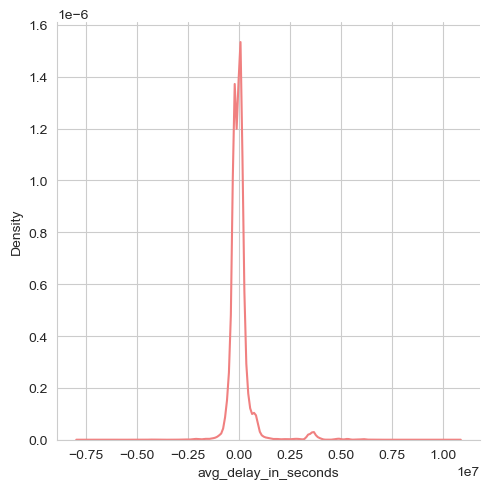

In [101]:
sns.set_style("whitegrid")
sns.displot(data=Y_train,kind="kde",color ='#F08080',x='avg_delay_in_seconds')

# (ii) This chart is for name_customers  vs  Payment days how many customer pay within (Payment days = clear_date / avg_delay_in_seconds) :

INSIGHTS FOR THIS CHART :

1.Proportional Representation: The pie chart will clearly show the proportion of customers in each delay category (Overdue, No Delay, and Delayed).

2.Customer Behavior Trends: By examining the proportions, you can infer the general behavior of the customers regarding payment timeliness. A larger slice for 'No Delay Customers' would indicate prompt payment behavior, whereas a larger slice for 'Delayed Customers' suggests a tendency towards late payments.

3.Comparative Size: Comparing the sizes of the 'No Delay Customers' and 'Delayed Customers' slices can provide insights into the relative performance and reliability of the customer base.

4.Customer Segmentation: The delay categories help segment customers based on their payment behavior, which can be useful for targeted marketing or customer service strategies.

5.Visualization Effectiveness: The use of the 'viridis' color palette ensures that each category is visually distinct, making it easy to differentiate between customer groups and understand the distribution at a glance.

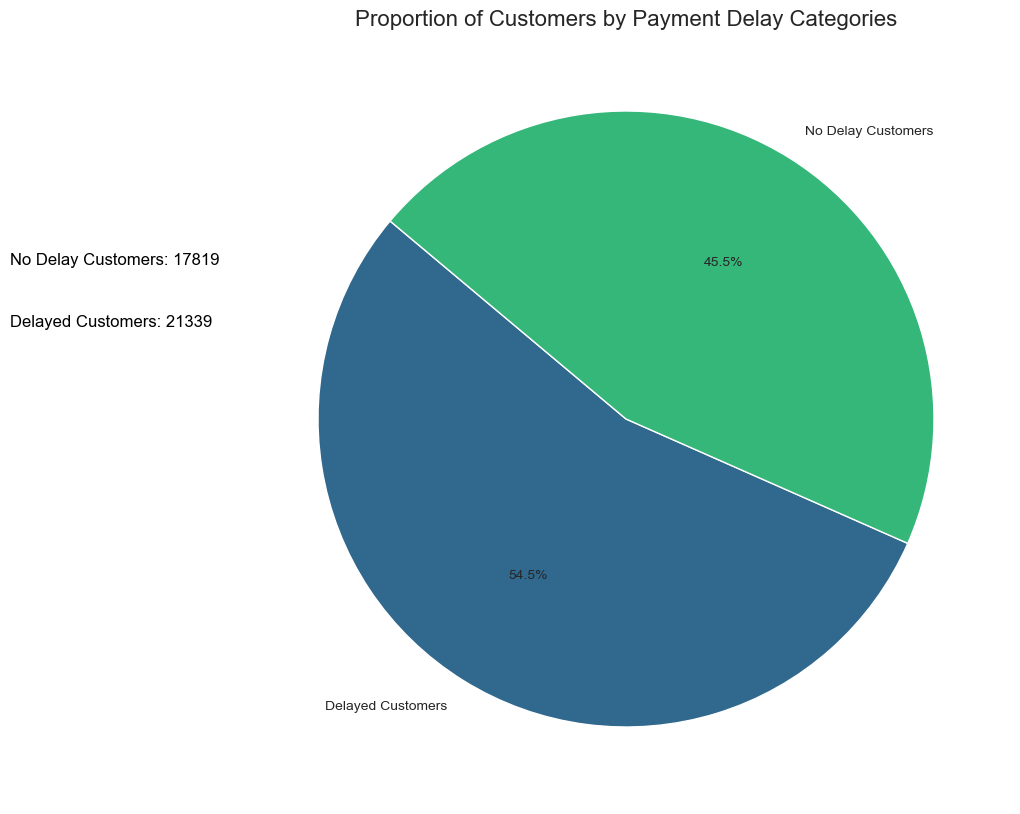

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column for delay categories
def categorize_delay(row):
    if pd.isnull(row['avg_delay_in_seconds']):
        return 'Overdue Customers'
    elif row['avg_delay_in_seconds'] < 0:
        return 'No Delay Customers'
    else:
        return 'Delayed Customers'

maindata['delay_category'] = maindata.apply(categorize_delay, axis=1)

# Group by the delay categories and count the number of customers in each category
delay_category_counts = maindata['delay_category'].value_counts()

# Plotting
plt.figure(figsize=(10, 10))

# Create a pie chart for delay categories
plt.pie(delay_category_counts, labels=delay_category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(delay_category_counts)))

# Set plot title
plt.title('Proportion of Customers by Payment Delay Categories', fontsize=16)

# Add total counts of no delay and delayed customers as text
no_delay_count = delay_category_counts.get('No Delay Customers', 0)
delayed_count = delay_category_counts.get('Delayed Customers', 0)

plt.text(-2, 0.5, f'No Delay Customers: {no_delay_count}', fontsize=12, color='black')
plt.text(-2, 0.3, f'Delayed Customers: {delayed_count}', fontsize=12, color='black')

# Show plot
plt.show()

# (iii) This chart is for Total Amount per Customer

INSIGHTS FOR THIS CHART :

1.Top Customers: The plot highlights the total amount spent by top customers sampled at regular intervals, providing insights into spending patterns among the highest spenders.

2.Spending Distribution: The general trend of the line can indicate whether there is a steep drop-off in spending among the top customers or if spending is more evenly distributed.

3.Customer Segmentation: The plot helps in identifying segments of customers based on their total spending, which can be useful for targeted marketing and personalized offers.

4.Annotation Insights: The annotated points with total amounts give specific insights into the exact spending of sampled customers, helping in precise identification of key customers.

5.Customer Engagement: The pattern in the line plot can reflect customer engagement levels, where higher spending indicates higher engagement, and sharp drops might suggest lower engagement or potential churn risks.

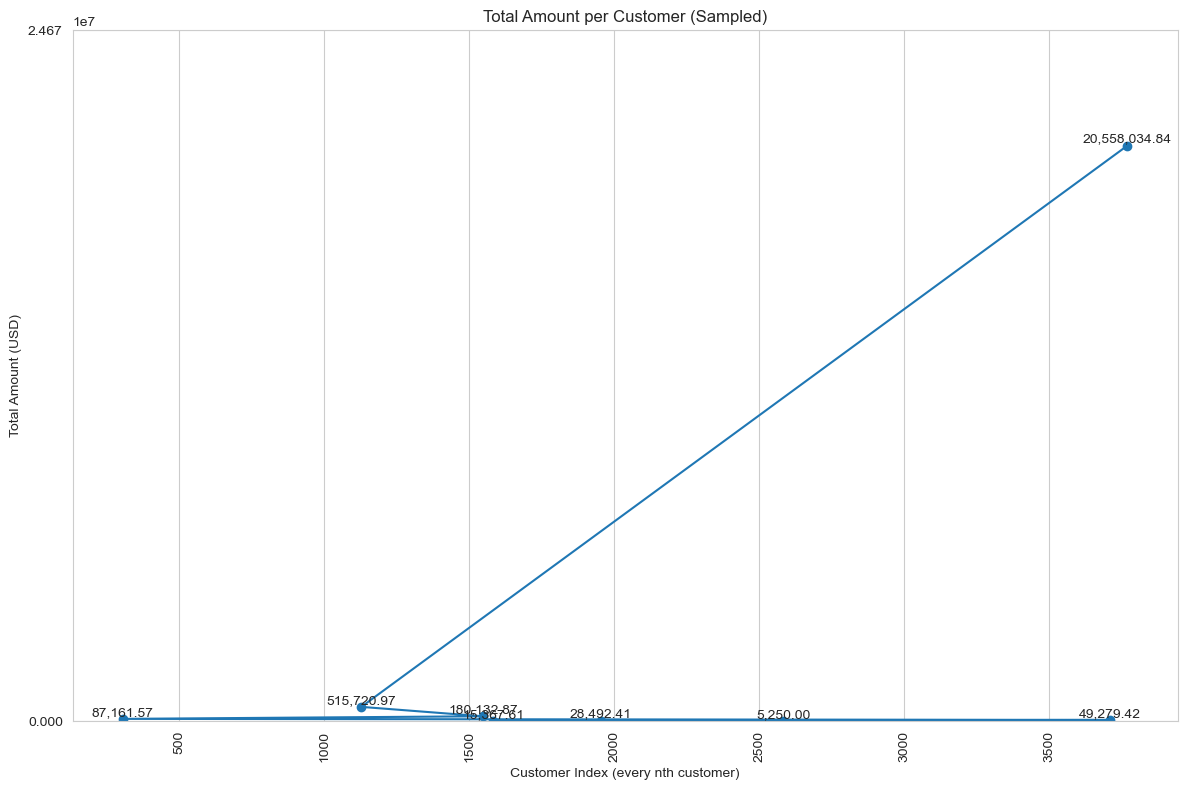

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming maindata is already defined and preprocessed

# Group by 'name_customer' and calculate the total amount using maindata
total_amount_per_customer = maindata.groupby('name_customer')['converted_usd'].sum().reset_index()

# Sort by total amount
total_amount_per_customer = total_amount_per_customer.sort_values(by='converted_usd', ascending=False)

# Sample every nth customer, e.g., every 500 th customer
nth = 500
total_amount_per_customer_sampled = total_amount_per_customer.iloc[::nth, :].reset_index(drop=True)

# Plotting the data as a line plot with markers
plt.figure(figsize=(12, 8))
plt.plot(total_amount_per_customer_sampled['name_customer'], total_amount_per_customer_sampled['converted_usd'], marker='o')

# Annotating each point with the value, adjust position to fit inside the plot
for x, y in zip(total_amount_per_customer_sampled['name_customer'], total_amount_per_customer_sampled['converted_usd']):
    plt.text(x, y, f"{y:,.2f}", ha='center', va='bottom')

plt.xlabel('Customer Index (every nth customer)')
plt.ylabel('Total Amount (USD)')
plt.title('Total Amount per Customer (Sampled)')
plt.xticks(rotation=90)

# Set y-axis limit from 0 to the maximum value of converted_usd
plt.ylim(0, total_amount_per_customer['converted_usd'].max())

# Set y-axis ticks with a step size more than the maximum value of converted_usd
y_step = total_amount_per_customer['converted_usd'].max() * 1.2  # Increase the step size by 20%
plt.yticks(np.arange(0, total_amount_per_customer['converted_usd'].max() + y_step, y_step))

# Add grid background
plt.grid(True)

# Ensure the labels fit within the plot
plt.tight_layout()

plt.show()


# (iv) This chart is for Mean Delay Per Customer :


INSIGHTS FOR THIS CHART : 

1.Overall Delay Trends: The plot provides a visual representation of the overall delay trends for each customer, showing how average delays fluctuate across the customer base.

2.Positive vs. Negative Delays: By differentiating between positive (delayed) and negative (early) delays using distinct colors (royalblue for positive and salmon for negative), the plot helps in identifying which customers are consistently early or late in their payments.

3.Impact of Delay on Customer Segments: By examining the segments of the plot with more pronounced delays, insights can be drawn about which customer segments are more prone to delays and might need targeted interventions.

4.Outliers: Any customers with extremely high or low average delays are easily identifiable as outliers. These outliers can indicate customers with chronic issues or those who are exceptionally punctual.

5.Effectiveness of Payment Policies: The presence of more negative delays could suggest that current payment policies or incentives for early payments are effective, whereas more positive delays might indicate the need for stricter policies or additional incentives.

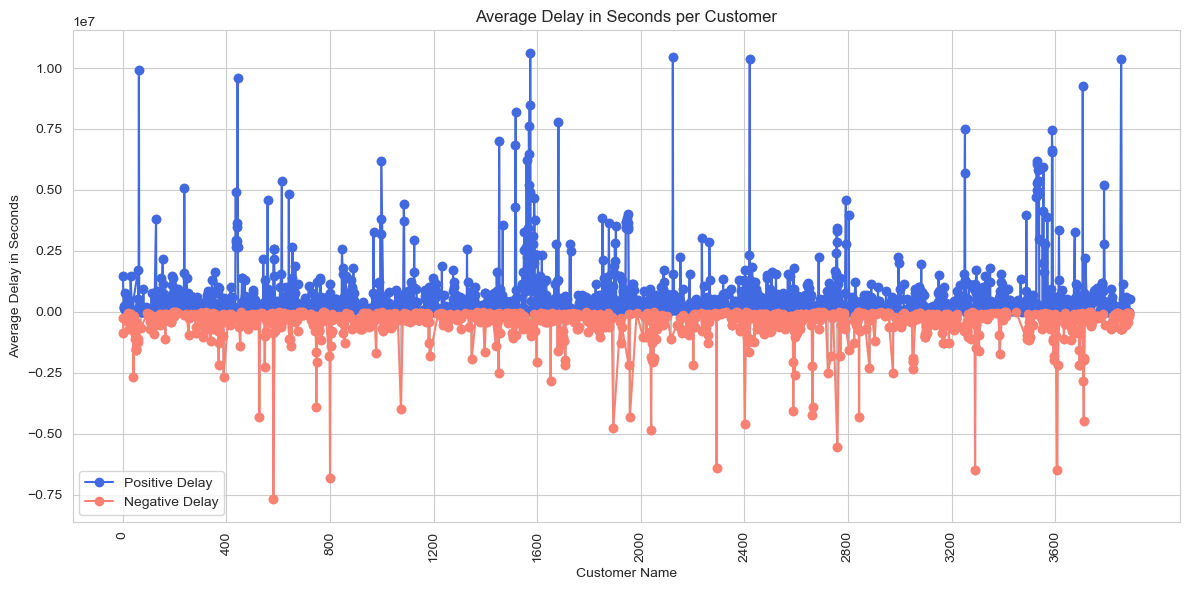

In [104]:
# Prepare data for plotting
plot_data = maindata[['name_customer', 'avg_delay_in_seconds']].drop_duplicates()

# Ensure data is sorted by name_customer to maintain order
plot_data = plot_data.sort_values('name_customer')

# Plotting the average delay in seconds per customer using a linear graph
plt.figure(figsize=(12, 6))

# Plot both positive and negative delays on the same graph to maintain alignment
plt.plot(plot_data['name_customer'], plot_data['avg_delay_in_seconds'], marker='o', linestyle='-', color='gray', alpha=0.5)

# Highlight positive and negative delays separately
plt.plot(plot_data.loc[plot_data['avg_delay_in_seconds'] >= 0, 'name_customer'], 
         plot_data.loc[plot_data['avg_delay_in_seconds'] >= 0, 'avg_delay_in_seconds'], 
         marker='o', linestyle='-', color='royalblue', label='Positive Delay')

plt.plot(plot_data.loc[plot_data['avg_delay_in_seconds'] < 0, 'name_customer'], 
         plot_data.loc[plot_data['avg_delay_in_seconds'] < 0, 'avg_delay_in_seconds'], 
         marker='o', linestyle='-', color='salmon', label='Negative Delay')

plt.title('Average Delay in Seconds per Customer')
plt.xlabel('Customer Name')
plt.ylabel('Average Delay in Seconds')

# Show every nth customer name label on the x-axis
n = 400
plt.xticks(ticks=np.arange(0, len(plot_data['name_customer']), n), 
           labels=plot_data['name_customer'][::n], rotation=90)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# (v) This chart is for No.of counts of invoice_currency (CAD & USD) :


INSIGHTS FOR THIS CHART :
    
1.Dominant Currency: The currency with the highest bar indicates the most frequently used currency for invoices, suggesting it is the dominant currency for business transactions.

2.Currency Distribution: The heights of the bars show the distribution of invoices across different currencies, giving an overview of the relative popularity or usage frequency of each currency.

3.Currency Risk Management: Understanding which currencies are most frequently used can help in managing currency risk and planning for currency exchange fluctuations.

4.Customer Demographics: The variety of currencies used in invoices can provide insights into the customer demographics and regions where the customers are located.

5.Transaction Volume: The number of invoices per currency can give an indication of transaction volume and business activity in different regions, which is valuable for financial planning and forecasting.

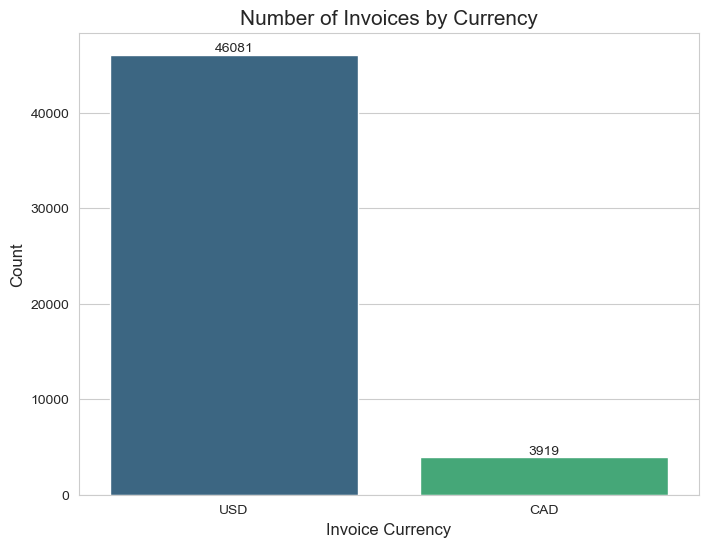

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is the DataFrame containing your dataset
data = pd.read_csv('dataset.csv')

# Calculate the counts of each currency
currency_counts = data['invoice_currency'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=currency_counts.index, y=currency_counts.values, palette='viridis')

# Add labels on top of the bars
for i in range(len(currency_counts)):
    plt.text(i, currency_counts.values[i] + 5, str(currency_counts.values[i]), ha='center', va='bottom')

# Set title and labels
plt.title('Number of Invoices by Currency', fontsize=15)
plt.xlabel('Invoice Currency', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


# (vi) This chart is for Cost Analysis: Different currencies may have varying transaction costs or exchange rate conversion fees, impacting the overall cost structure of transactions :

INSIGHTS FOR THIS CHART :

1.Trend Analysis: The chart provides insights into the average payment delay over time, which allows for trend analysis. It shows whether delays are increasing, decreasing, or remaining stable over the period covered by the data.

2.Positive vs. Negative Delays: By plotting positive, negative, and zero delay lines separately, the chart effectively distinguishes between early payments (negative delays), delayed payments (positive delays), and payments made exactly on time (zero delay).

3.Early Payment Patterns: The red line representing early payments (negative delays) reveals patterns of prompt payment behavior among customers or clients. Identifying these patterns can be crucial for understanding the financial stability of the business and its clients.

4.Delayed Payment Trends: The green line depicting delayed payments (positive delays) indicates trends in late payments over time. This insight is valuable for assessing cash flow management, identifying potential liquidity issues, and improving credit control processes.

5.Forecasting: By extrapolating the observed trends, businesses can make informed forecasts about future payment behavior. This information is invaluable for financial planning, risk management, and strategic decision-making.

In [106]:
maindata.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'cust_payment_terms', 'posting_day', 'posting_month',
       'posting_year', 'baseline_create_day', 'baseline_create_month',
       'baseline_create_year', 'due_in_day', 'due_in_month', 'due_in_year',
       'converted_usd', 'avg_delay_in_seconds', 'delay_category'],
      dtype='object')

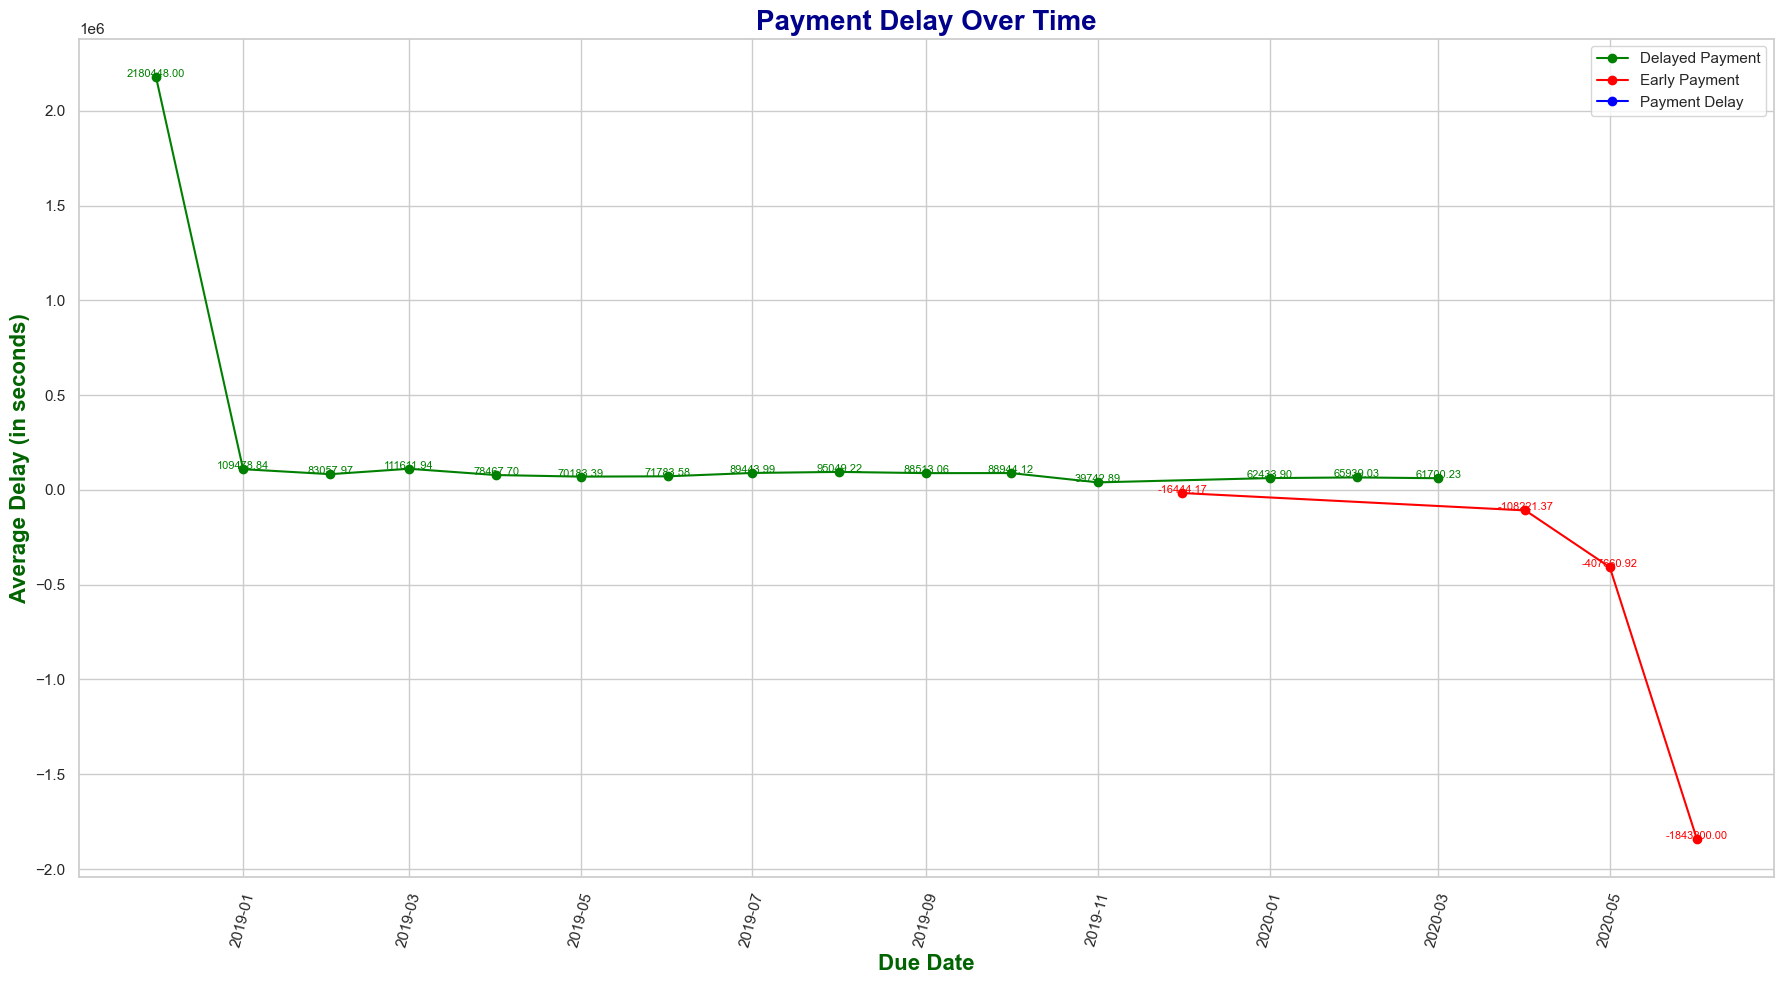

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that the plotting styles are set
sns.set(style="whitegrid")

# Rename columns to year, month, and day temporarily
maindata.rename(columns={'due_in_year': 'year', 'due_in_month': 'month', 'due_in_day': 'day'}, inplace=True)

# Convert due_in_date to datetime
maindata['due_in_date'] = pd.to_datetime(maindata[['year', 'month', 'day']])

# Rename the columns back to their original names
maindata.rename(columns={'year': 'due_in_year', 'month': 'due_in_month', 'day': 'due_in_day'}, inplace=True)

# Calculate the monthly average delay
monthly_avg_delay = maindata.groupby(maindata['due_in_date'].dt.to_period("M"))['avg_delay_in_seconds'].mean().reset_index()
monthly_avg_delay['due_in_date'] = monthly_avg_delay['due_in_date'].dt.to_timestamp()

# Splitting data into positive, negative, and zero average delay
positive_delay = monthly_avg_delay[monthly_avg_delay['avg_delay_in_seconds'] > 0]
negative_delay = monthly_avg_delay[monthly_avg_delay['avg_delay_in_seconds'] < 0]
zero_delay = monthly_avg_delay[monthly_avg_delay['avg_delay_in_seconds'] == 0]

# Plotting positive, negative, and zero delay lines separately
plt.figure(figsize=(18, 10))

# Plot positive delay line
plt.plot(positive_delay['due_in_date'], positive_delay['avg_delay_in_seconds'], marker='o', linestyle='-', color='green', label='Delayed Payment')

# Plot negative delay line
plt.plot(negative_delay['due_in_date'], negative_delay['avg_delay_in_seconds'], marker='o', linestyle='-', color='red', label='Early Payment')

# Plot zero delay line
plt.plot(zero_delay['due_in_date'], zero_delay['avg_delay_in_seconds'], marker='o', linestyle='-', color='blue', label='Payment Delay')

# Title and labels with highlighting
plt.title('Payment Delay Over Time', fontsize=20, fontweight='bold', color='darkblue')
plt.xlabel('Due Date', fontsize=16, fontweight='bold', color='darkgreen')
plt.ylabel('Average Delay (in seconds)', fontsize=16, fontweight='bold', color='darkgreen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Add legend
plt.legend()

# Add gridlines
plt.grid(True)

# Annotate data points with the average delay value
for i, row in positive_delay.iterrows():
    y_value = 10 if i == n else row['avg_delay_in_seconds']
    plt.text(row['due_in_date'], y_value, f'{row["avg_delay_in_seconds"]:.2f}', 
             ha='center', fontsize=8, color='green')

for i, row in negative_delay.iterrows():
    y_value = 10 if i == n else row['avg_delay_in_seconds']
    plt.text(row['due_in_date'], y_value, f'{row["avg_delay_in_seconds"]:.2f}', 
             ha='center', fontsize=8, color='red')

for i, row in zero_delay.iterrows():
    y_value = 10 if i == n else row['avg_delay_in_seconds']
    plt.text(row['due_in_date'], y_value, f'{row["avg_delay_in_seconds"]:.2f}', 
             ha='center', fontsize=8, color='blue')

plt.tight_layout()
plt.show()


# (vii) Distribution of Payment delay OverTime 

INSIGHTS FOR THIS CHART :

1.Trend Analysis: Observe the overall trend in payment delays. Are delays becoming more frequent or less frequent over time? 
This can indicate improvements or deteriorations in payment processes.

2.Category Shifts: Look for any shifts in the categories of delays. For instance, if there is an increase in the 'Long' delay 
category over time, it may signal worsening payment practices or increasing financial strain on clients.

3.Efficiency of Interventions: If there have been any process improvements or policy changes aimed at reducing payment delays, 
analyze the impact of these interventions. A decrease in 'Medium' and 'Long' delays over time could indicate successful implementation.

4.Client Behavior: Examine if certain periods show a change in client payment behavior. Consistent 'Short' delays might indicate 
habitual minor late payments, while 'Long' delays might indicate severe financial difficulties.

5.Predictive Analysis: Utilize the historical data to predict future delays. Identifying patterns and trends can help forecast 
potential delay periods and allow for proactive measures.

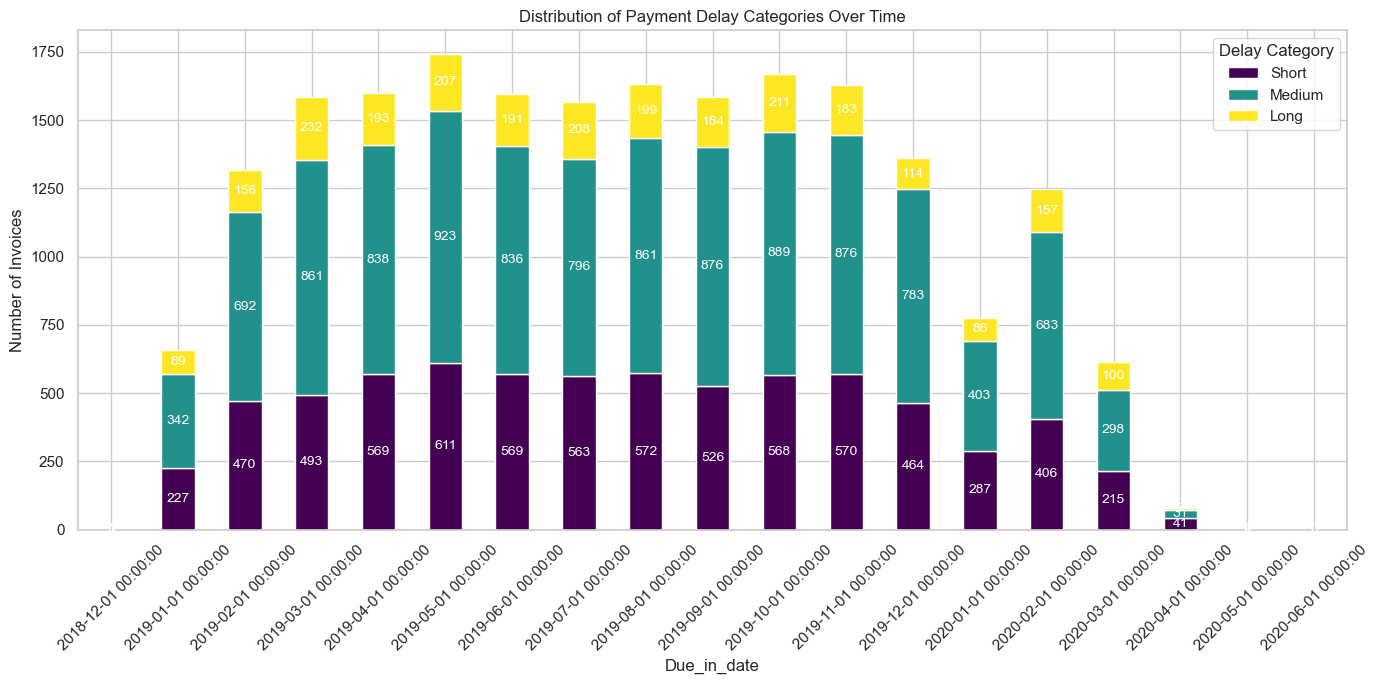

In [108]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming maindata and other necessary imports are already done

# Adding delay category column
delay_thresholds = [0, 86400, 604800, float('inf')]  # 1 day, 1 week, and beyond
delay_labels = ['Short', 'Medium', 'Long']

maindata['delay_category'] = pd.cut(maindata['avg_delay_in_seconds'], bins=delay_thresholds, labels=delay_labels)

# Calculate the monthly count of each delay category
monthly_delay_category = maindata.groupby([maindata['due_in_date'].dt.to_period("M"), 'delay_category']).size().unstack(fill_value=0)
monthly_delay_category.index = monthly_delay_category.index.to_timestamp()

# Plot the delay category distribution over time with data labels
ax = monthly_delay_category.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')

# Adding labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d', color='white', fontsize=10)

plt.title('Distribution of Payment Delay Categories Over Time')
plt.xlabel('Due_in_date')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.legend(title='Delay Category')
plt.tight_layout()
plt.show()


# (viii) Co - Relation Heat Map for the X train :

INSIGHTS FOR THIS CHART :

1.Strong Positive Correlations: Look for pairs of features with correlation values close to 1. This indicates that as one feature increases, the other feature tends to increase as well. For example, if total_open_amount and converted_usd have a high positive correlation, it would make sense since they represent the same monetary value in different currencies.

2.Strong Negative Correlations: Identify pairs of features with correlation values close to -1. This indicates that as one feature increases, the other feature tends to decrease. For instance, if due_in_date and avg_delay_in_seconds show a strong negative correlation, it suggests that invoices with earlier due dates are less likely to be delayed.

3.Weak or No Correlations: Features with correlation values close to 0 suggest little to no linear relationship. For example, if business_code and total_open_amount have a correlation near 0, it indicates that the business code does not affect the total open amount directly.

4.Temporal Relationships: If there are features related to dates, their correlations can reveal temporal patterns. For example, correlations involving posting_date, due_in_date, and baseline_create_date might uncover how timing affects invoice amounts and delays.

5.Business Insights: Overall correlation patterns can reveal broader business insights, such as the efficiency of certain departments (area_business if it wasn’t dropped) or the effectiveness of certain business codes in managing invoice amounts and delays.

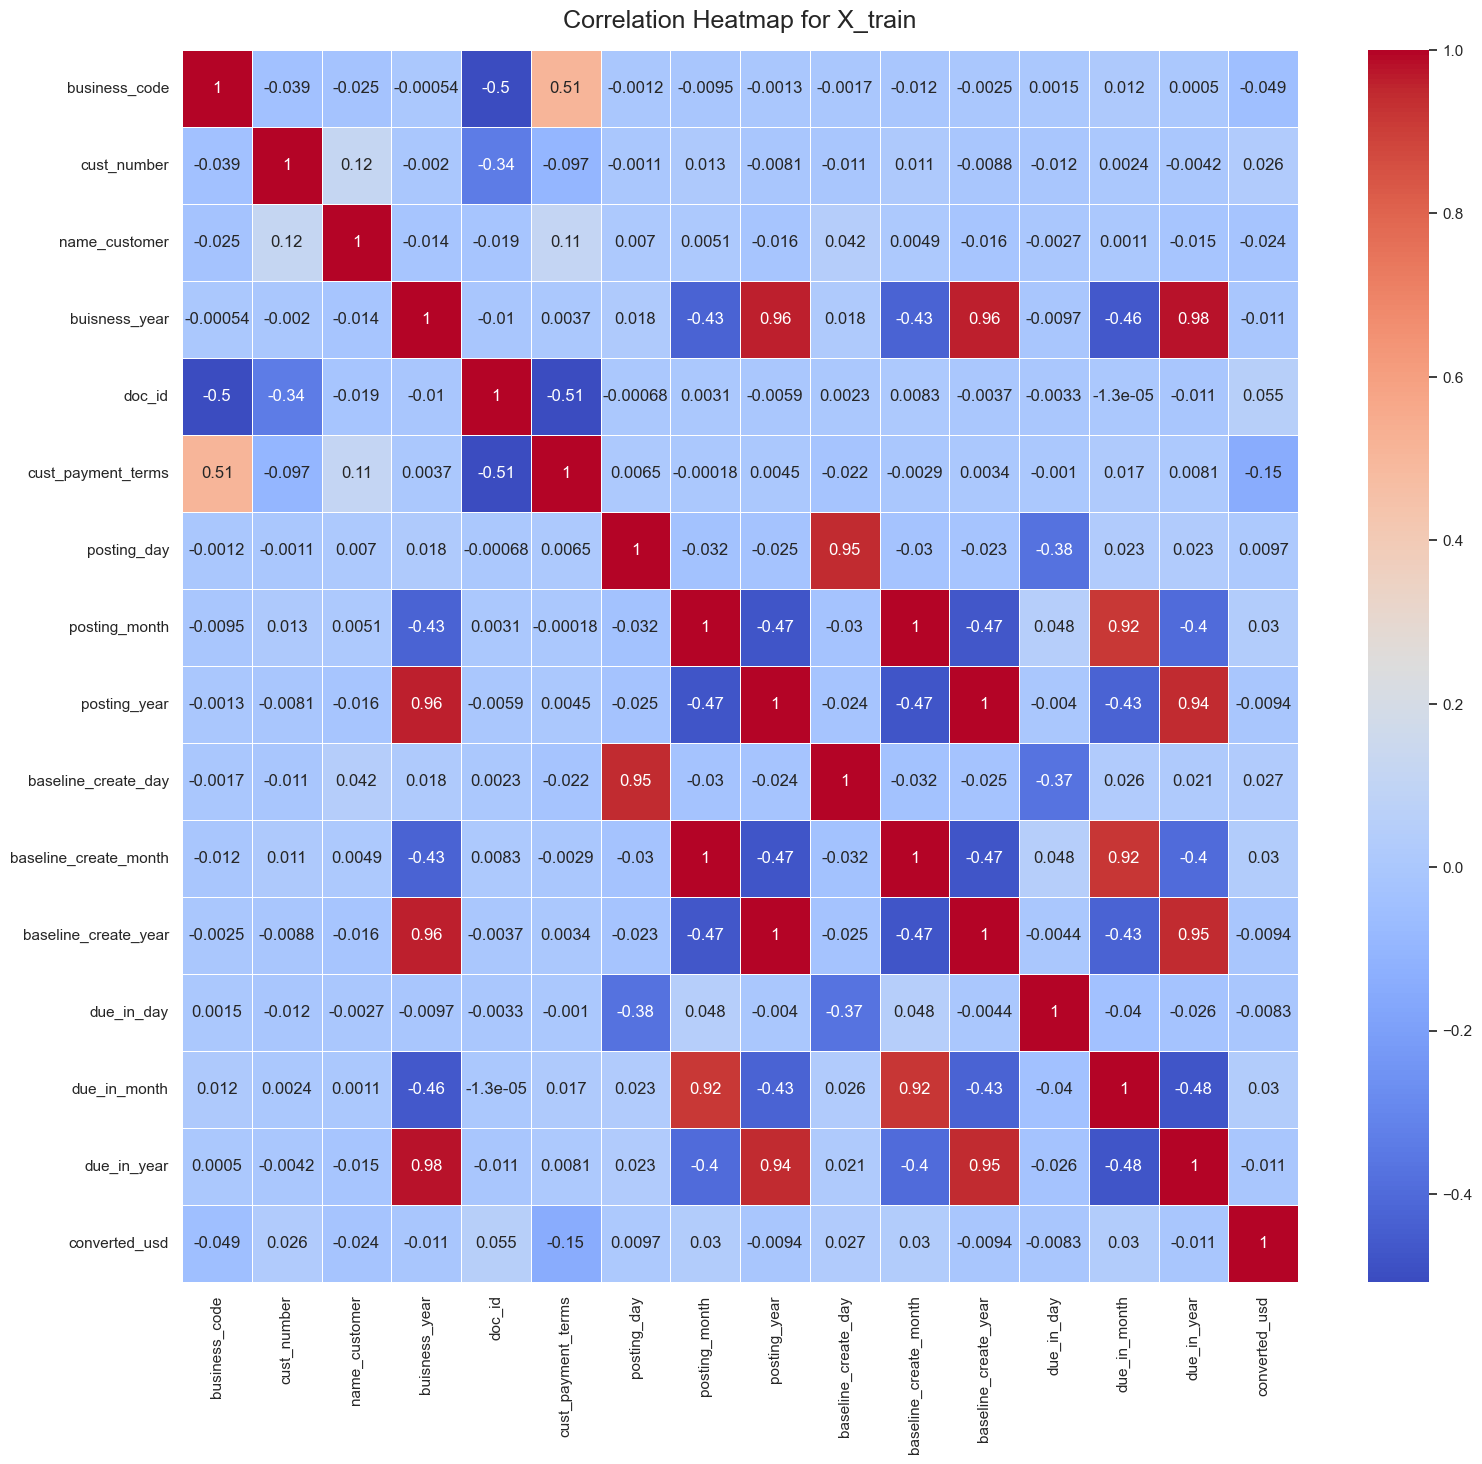

In [109]:
# Generating the correlation matrix for X_train
correlation_matrix = X_train.corr()

# Plotting the heatmap
plt.figure(figsize=(18, 16))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
heatmap.set_title('Correlation Heatmap for X_train', fontdict={'fontsize': 18}, pad=16)

# Displaying the heatmap
plt.show()


# Model Building : 

In [110]:
print(maindata.columns)

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'cust_payment_terms', 'posting_day', 'posting_month',
       'posting_year', 'baseline_create_day', 'baseline_create_month',
       'baseline_create_year', 'due_in_day', 'due_in_month', 'due_in_year',
       'converted_usd', 'avg_delay_in_seconds', 'delay_category',
       'due_in_date'],
      dtype='object')


In [111]:
maindata.drop(columns=['due_in_date','delay_category'], inplace=True)


In [112]:
print(maindata.columns)

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'cust_payment_terms', 'posting_day', 'posting_month',
       'posting_year', 'baseline_create_day', 'baseline_create_month',
       'baseline_create_year', 'due_in_day', 'due_in_month', 'due_in_year',
       'converted_usd', 'avg_delay_in_seconds'],
      dtype='object')


In [113]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [114]:
# Print shapes of the splits
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (23494, 16)
X_val shape: (7832, 16)
X_test shape: (7832, 16)
Y_train shape: (23494, 1)
Y_val shape: (7832, 1)
Y_test shape: (7832, 1)


In [115]:
# Check data types of columns in X_test
print(X_test.dtypes)
print(Y_test.dtypes)

business_code              int32
cust_number                int64
name_customer              int32
buisness_year            float64
doc_id                   float64
cust_payment_terms         int32
posting_day                int32
posting_month              int32
posting_year               int32
baseline_create_day        int32
baseline_create_month      int32
baseline_create_year       int32
due_in_day                 int32
due_in_month               int32
due_in_year                int32
converted_usd            float64
dtype: object
avg_delay_in_seconds    int32
dtype: object


In [116]:
maindata["cust_number"].value_counts()

cust_number
200769623    9388
200726979    1574
200762301    1202
200759878    1116
200794332     971
             ... 
200387015       1
100043993       1
200625175       1
140105192       1
200541916       1
Name: count, Length: 1056, dtype: int64

# 1. Linear Regression Model:

In [117]:
# Initialize the model
lr_model = LinearRegression()

# Performing K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_mse_scores = -cross_val_score(lr_model, X_train, Y_train.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(lr_model, X_train, Y_train.values.ravel(), cv=kf, scoring='r2')

# Calculate mean of CV scores
mean_cv_mse = np.mean(cv_mse_scores)
mean_cv_r2 = np.mean(cv_r2_scores)

# Calculate the RMSE for each fold
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Calculate mean of CV RMSE scores
mean_cv_rmse = np.mean(cv_rmse_scores)

print(f"Cross-validation MSE: {mean_cv_mse:.2f}")
print(f"Cross-validation R2: {mean_cv_r2:.2f}")
print(f"Cross-validation RMSE: {mean_cv_rmse:.2f}")

Cross-validation MSE: 300747608551.29
Cross-validation R2: 0.33
Cross-validation RMSE: 547963.45


In [118]:
# Training the model on the training set
lr_model.fit(X_train, Y_train.values.ravel())

# Making predictions
Y_train_pred = lr_model.predict(X_train)
Y_val_pred = lr_model.predict(X_val)
Y_test_pred = lr_model.predict(X_test)

# Evaluating the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
val_mse = mean_squared_error(Y_val, Y_val_pred)
val_r2 = r2_score(Y_val, Y_val_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R-squared Score: {train_r2:.2f}")

print(f"\nValidation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"R-squared Score: {val_r2:.2f}")

print(f"\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Training Set Metrics:
Mean Squared Error (MSE): 299400717637.56
R-squared Score: 0.33

Validation Set Metrics:
Mean Squared Error (MSE): 265213779701.50
R-squared Score: 0.37

Testing Set Metrics:
Mean Squared Error (MSE): 319590232681.13
R-squared Score: 0.32


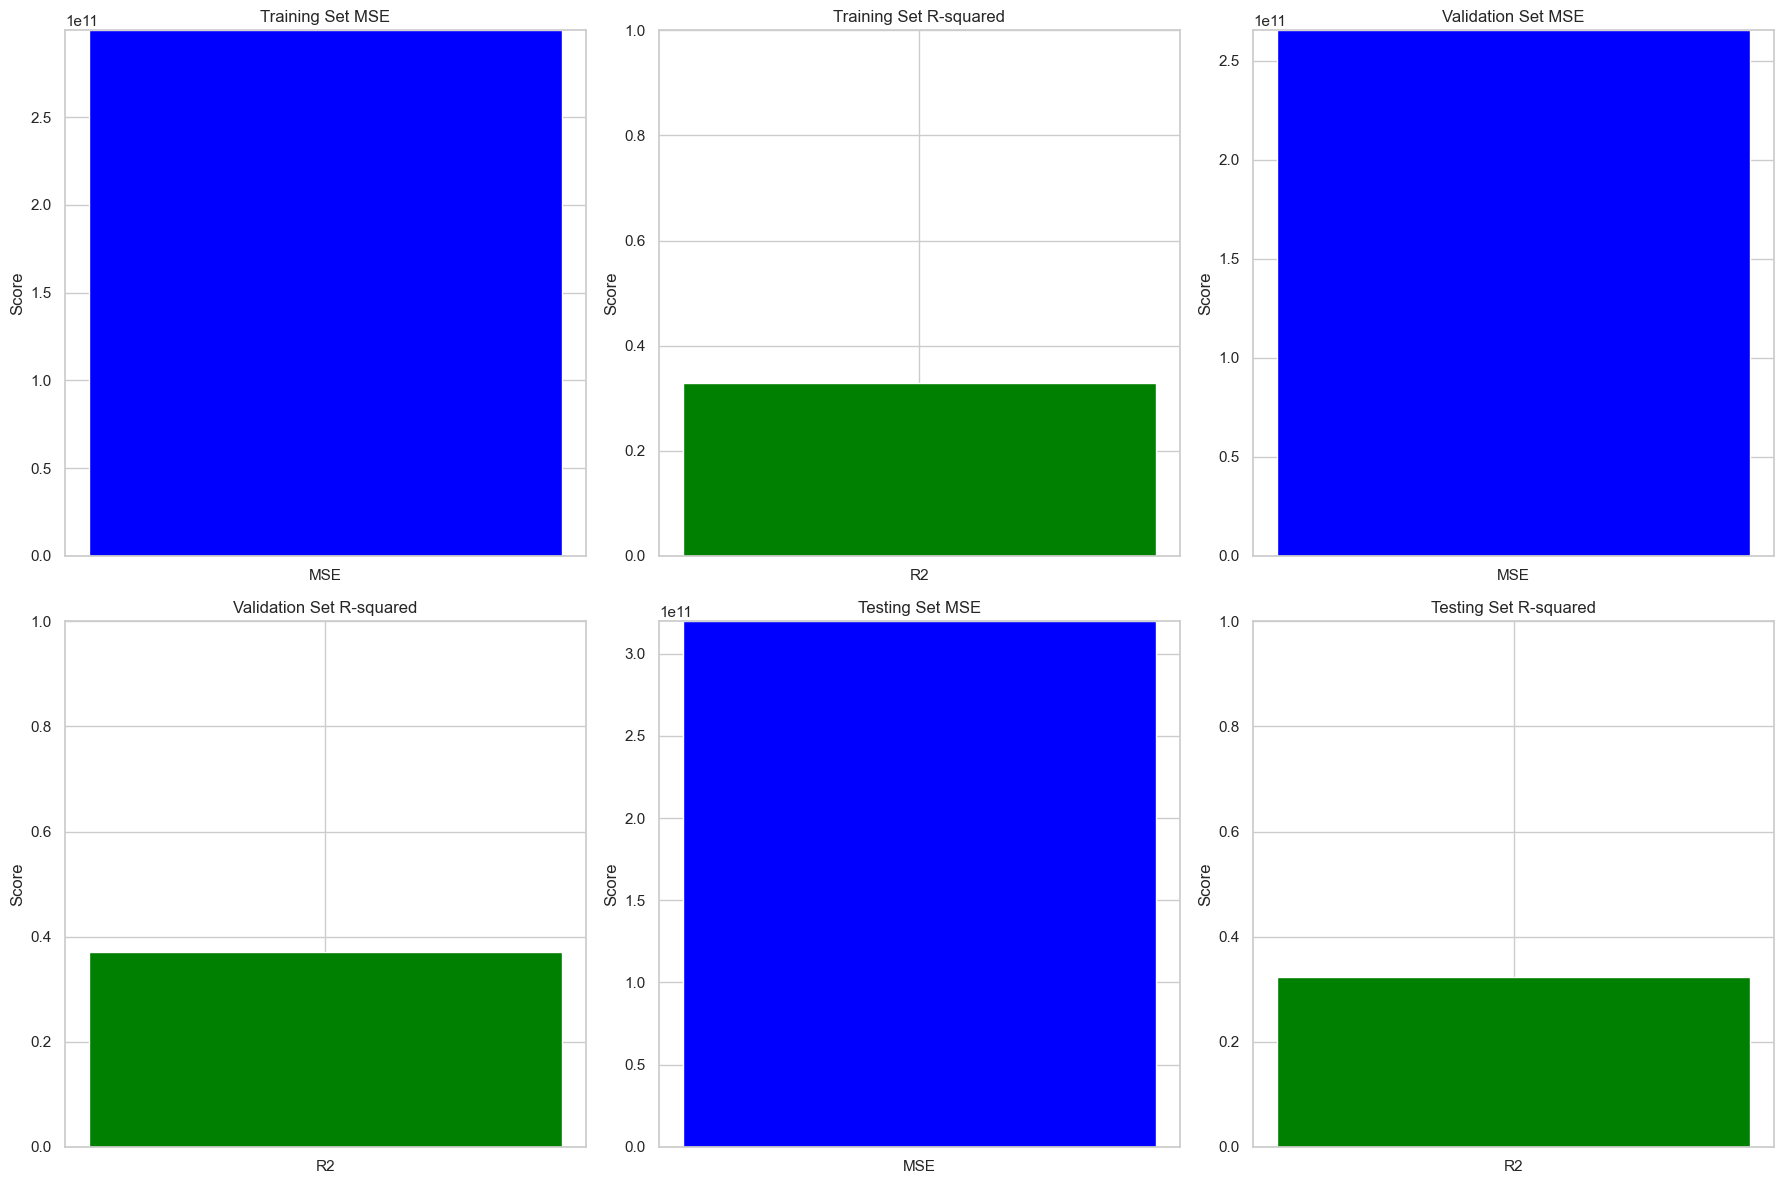

In [119]:
# Plotting the metrics using subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Training set MSE and R2
axs[0, 0].bar(['MSE'], [train_mse], color=['blue'])
axs[0, 0].set_title('Training Set MSE')
axs[0, 0].set_ylim([0, max(train_mse, 1)])
axs[0, 0].set_ylabel('Score')

axs[0, 1].bar(['R2'], [train_r2], color=['green'])
axs[0, 1].set_title('Training Set R-squared')
axs[0, 1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[0, 1].set_ylabel('Score')

# Validation set MSE and R2
axs[0, 2].bar(['MSE'], [val_mse], color=['blue'])
axs[0, 2].set_title('Validation Set MSE')
axs[0, 2].set_ylim([0, max(val_mse, 1)])
axs[0, 2].set_ylabel('Score')

axs[1, 0].bar(['R2'], [val_r2], color=['green'])
axs[1, 0].set_title('Validation Set R-squared')
axs[1, 0].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[1, 0].set_ylabel('Score')

# Testing set MSE and R2
axs[1, 1].bar(['MSE'], [test_mse], color=['blue'])
axs[1, 1].set_title('Testing Set MSE')
axs[1, 1].set_ylim([0, max(test_mse, 1)])
axs[1, 1].set_ylabel('Score')

axs[1, 2].bar(['R2'], [test_r2], color=['green'])
axs[1, 2].set_title('Testing Set R-squared')
axs[1, 2].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[1, 2].set_ylabel('Score')

plt.tight_layout()
plt.show()

# 2.Random Forest Regression Model :

In [120]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Performing K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_mse_scores = -cross_val_score(rf_model, X_train, Y_train.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(rf_model, X_train, Y_train.values.ravel(), cv=kf, scoring='r2')

# Calculate mean of CV scores
mean_cv_mse = np.mean(cv_mse_scores)
mean_cv_r2 = np.mean(cv_r2_scores)

# Calculate the RMSE for each fold
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Calculate mean of CV RMSE scores
mean_cv_rmse = np.mean(cv_rmse_scores)

print(f"Cross-validation MSE: {mean_cv_mse:.2f}")
print(f"Cross-validation R2: {mean_cv_r2:.2f}")
print(f"Cross-validation RMSE: {mean_cv_rmse:.2f}")

Cross-validation MSE: 96673517853.43
Cross-validation R2: 0.78
Cross-validation RMSE: 309790.27


In [121]:
# Training the model on the training set
rf_model.fit(X_train, Y_train.values.ravel())

# Making predictions
Y_train_pred = rf_model.predict(X_train)
Y_val_pred = rf_model.predict(X_val)
Y_test_pred = rf_model.predict(X_test)

# Evaluating the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
val_mse = mean_squared_error(Y_val, Y_val_pred)
val_r2 = r2_score(Y_val, Y_val_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R-squared Score: {train_r2:.2f}")

print(f"\nValidation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"R-squared Score: {val_r2:.2f}")

print(f"\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Training Set Metrics:
Mean Squared Error (MSE): 14068743209.33
R-squared Score: 0.97

Validation Set Metrics:
Mean Squared Error (MSE): 93384022456.26
R-squared Score: 0.78

Testing Set Metrics:
Mean Squared Error (MSE): 91410398856.78
R-squared Score: 0.81


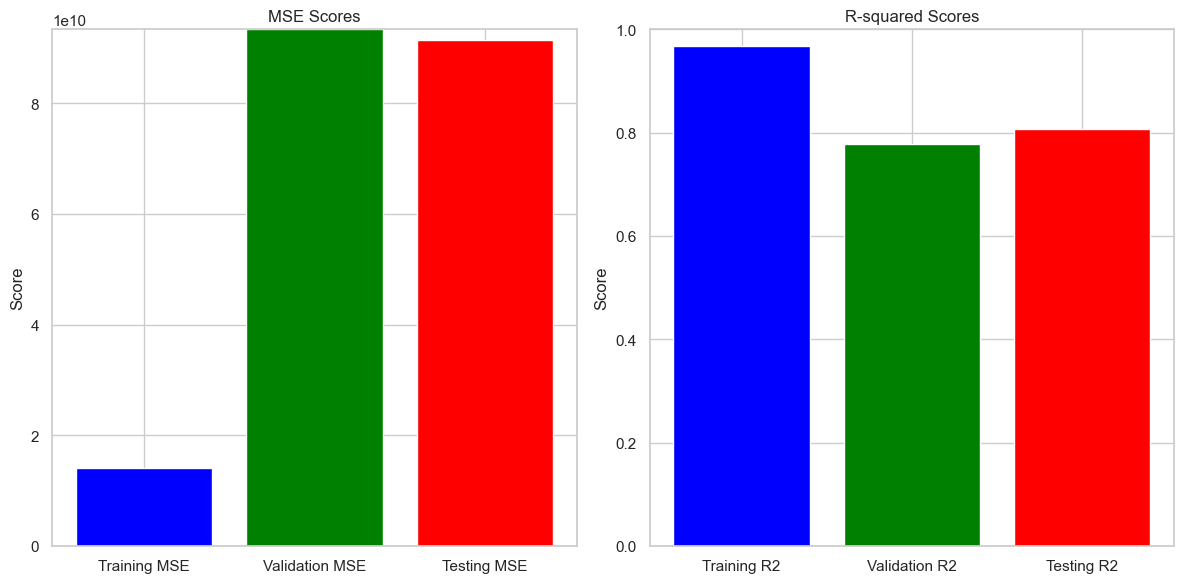

In [122]:
# Plotting the metrics together
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# MSE values
mse_values = [train_mse, val_mse, test_mse]
axs[0].bar(['Training MSE', 'Validation MSE', 'Testing MSE'], mse_values, color=['blue', 'green', 'red'])
axs[0].set_title('MSE Scores')
axs[0].set_ylim([0, max(mse_values + [1])])
axs[0].set_ylabel('Score')

# R2 values
r2_values = [train_r2, val_r2, test_r2]
axs[1].bar(['Training R2', 'Validation R2', 'Testing R2'], r2_values, color=['blue', 'green', 'red'])
axs[1].set_title('R-squared Scores')
axs[1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

# 3.Decision Tree Regression Model :

In [123]:
# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Performing K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_mse_scores = -cross_val_score(dt_model, X_train, Y_train.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(dt_model, X_train, Y_train.values.ravel(), cv=kf, scoring='r2')

# Calculate mean of CV scores
mean_cv_mse = np.mean(cv_mse_scores)
mean_cv_r2 = np.mean(cv_r2_scores)

# Calculate the RMSE for each fold
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Calculate mean of CV RMSE scores
mean_cv_rmse = np.mean(cv_rmse_scores)

print(f"Cross-validation MSE: {mean_cv_mse:.2f}")
print(f"Cross-validation R2: {mean_cv_r2:.2f}")
print(f"Cross-validation RMSE: {mean_cv_rmse:.2f}")

Cross-validation MSE: 146087648194.15
Cross-validation R2: 0.67
Cross-validation RMSE: 380052.49


In [124]:
# Training the model on the training set
dt_model.fit(X_train, Y_train.values.ravel())

# Making predictions
Y_train_pred = dt_model.predict(X_train)
Y_val_pred = dt_model.predict(X_val)
Y_test_pred = dt_model.predict(X_test)

# Evaluating the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
val_mse = mean_squared_error(Y_val, Y_val_pred)
val_r2 = r2_score(Y_val, Y_val_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R-squared Score: {train_r2:.2f}")

print(f"\nValidation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"R-squared Score: {val_r2:.2f}")

print(f"\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Training Set Metrics:
Mean Squared Error (MSE): 0.00
R-squared Score: 1.00

Validation Set Metrics:
Mean Squared Error (MSE): 133024500620.90
R-squared Score: 0.68

Testing Set Metrics:
Mean Squared Error (MSE): 149141526451.51
R-squared Score: 0.68


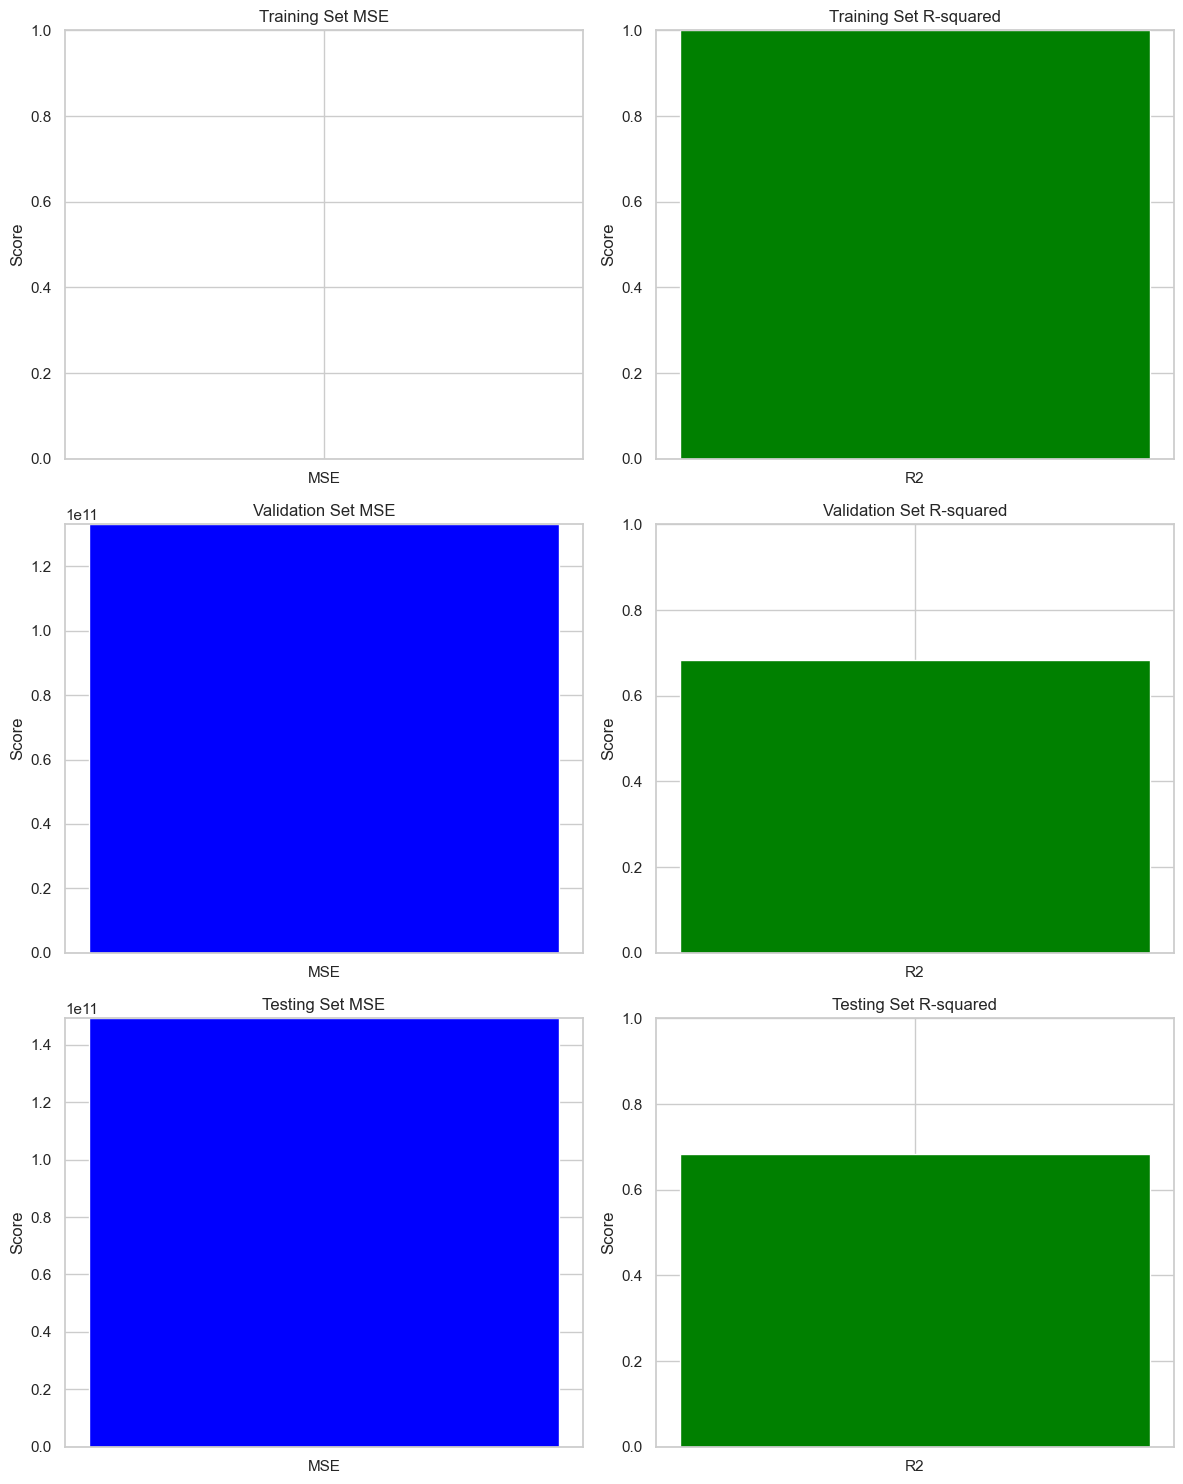

In [125]:
# Plotting the metrics individually
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Training set MSE
axs[0, 0].bar(['MSE'], [train_mse], color=['blue'])
axs[0, 0].set_title('Training Set MSE')
axs[0, 0].set_ylim([0, max(train_mse, 1)])
axs[0, 0].set_ylabel('Score')

# Training set R2
axs[0, 1].bar(['R2'], [train_r2], color=['green'])
axs[0, 1].set_title('Training Set R-squared')
axs[0, 1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[0, 1].set_ylabel('Score')

# Validation set MSE
axs[1, 0].bar(['MSE'], [val_mse], color=['blue'])
axs[1, 0].set_title('Validation Set MSE')
axs[1, 0].set_ylim([0, max(val_mse, 1)])
axs[1, 0].set_ylabel('Score')

# Validation set R2
axs[1, 1].bar(['R2'], [val_r2], color=['green'])
axs[1, 1].set_title('Validation Set R-squared')
axs[1, 1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[1, 1].set_ylabel('Score')

# Testing set MSE
axs[2, 0].bar(['MSE'], [test_mse], color=['blue'])
axs[2, 0].set_title('Testing Set MSE')
axs[2, 0].set_ylim([0, max(test_mse, 1)])
axs[2, 0].set_ylabel('Score')

# Testing set R2
axs[2, 1].bar(['R2'], [test_r2], color=['green'])
axs[2, 1].set_title('Testing Set R-squared')
axs[2, 1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[2, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

# 4.Support Vector Regression Model :

In [128]:
# Standardizing the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [129]:
# Initialize the model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Performing K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_mse_scores = -cross_val_score(svr_model, X_train_scaled, Y_train.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(svr_model, X_train_scaled, Y_train.values.ravel(), cv=kf, scoring='r2')

# Calculate mean of CV scores
mean_cv_mse = np.mean(cv_mse_scores)
mean_cv_r2 = np.mean(cv_r2_scores)

# Calculate the RMSE for each fold
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Calculate mean of CV RMSE scores
mean_cv_rmse = np.mean(cv_rmse_scores)

print(f"Cross-validation MSE: {mean_cv_mse:.2f}")
print(f"Cross-validation R2: {mean_cv_r2:.2f}")
print(f"Cross-validation RMSE: {mean_cv_rmse:.2f}")

Cross-validation MSE: 438534162102.57
Cross-validation R2: 0.02
Cross-validation RMSE: 661984.78


In [130]:
# Training the model on the training set
svr_model.fit(X_train_scaled, Y_train.values.ravel())

# Making predictions
Y_train_pred = svr_model.predict(X_train_scaled)
Y_val_pred = svr_model.predict(X_val_scaled)
Y_test_pred = svr_model.predict(X_test_scaled)

# Evaluating the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
val_mse = mean_squared_error(Y_val, Y_val_pred)
val_r2 = r2_score(Y_val, Y_val_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R-squared Score: {train_r2:.2f}")

print(f"\nValidation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"R-squared Score: {val_r2:.2f}")

print(f"\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Training Set Metrics:
Mean Squared Error (MSE): 436455602499.14
R-squared Score: 0.02

Validation Set Metrics:
Mean Squared Error (MSE): 412467558393.70
R-squared Score: 0.02

Testing Set Metrics:
Mean Squared Error (MSE): 465054142580.62
R-squared Score: 0.01


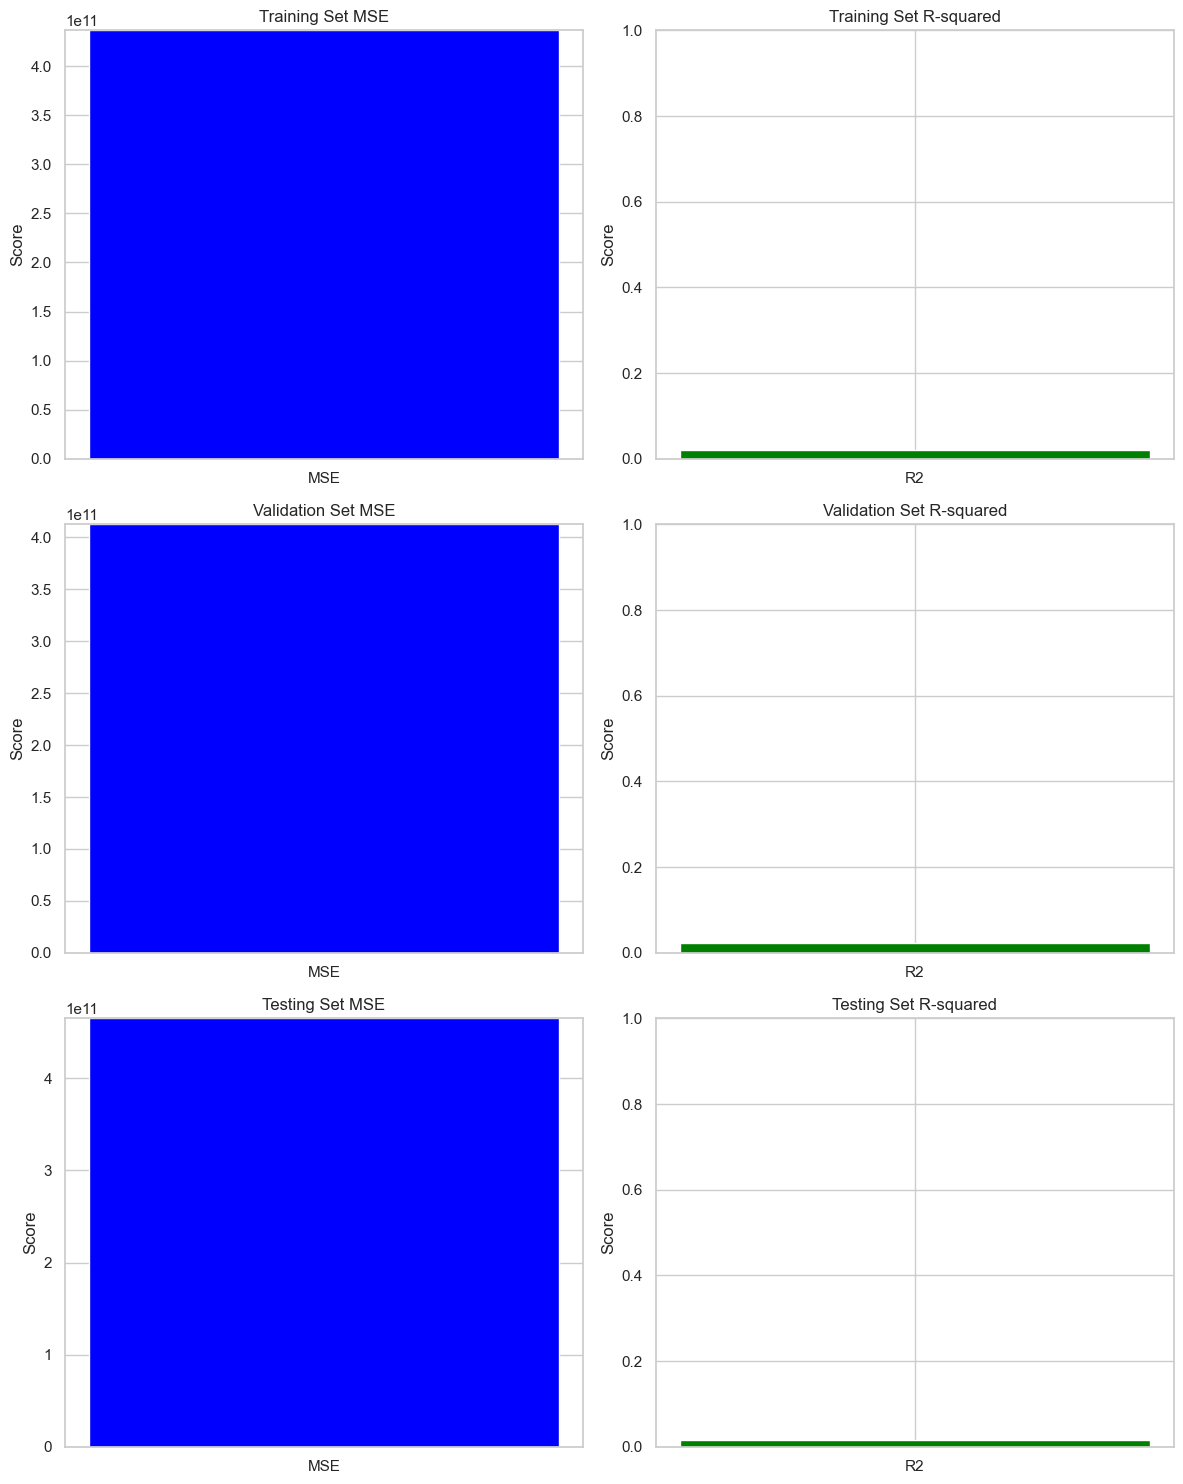

In [131]:
# Plotting the metrics individually
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Training set MSE
axs[0, 0].bar(['MSE'], [train_mse], color=['blue'])
axs[0, 0].set_title('Training Set MSE')
axs[0, 0].set_ylim([0, max(train_mse, 1)])
axs[0, 0].set_ylabel('Score')

# Training set R2
axs[0, 1].bar(['R2'], [train_r2], color=['green'])
axs[0, 1].set_title('Training Set R-squared')
axs[0, 1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[0, 1].set_ylabel('Score')

# Validation set MSE
axs[1, 0].bar(['MSE'], [val_mse], color=['blue'])
axs[1, 0].set_title('Validation Set MSE')
axs[1, 0].set_ylim([0, max(val_mse, 1)])
axs[1, 0].set_ylabel('Score')

# Validation set R2
axs[1, 1].bar(['R2'], [val_r2], color=['green'])
axs[1, 1].set_title('Validation Set R-squared')
axs[1, 1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[1, 1].set_ylabel('Score')

# Testing set MSE
axs[2, 0].bar(['MSE'], [test_mse], color=['blue'])
axs[2, 0].set_title('Testing Set MSE')
axs[2, 0].set_ylim([0, max(test_mse, 1)])
axs[2, 0].set_ylabel('Score')

# Testing set R2
axs[2, 1].bar(['R2'], [test_r2], color=['green'])
axs[2, 1].set_title('Testing Set R-squared')
axs[2, 1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[2, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

# 5.Extreme Gradient Boost Regression Model / XG Boost Model :

In [132]:
# Standardizing the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [133]:
# Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Performing K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_mse_scores = -cross_val_score(xgb_model, X_train_scaled, Y_train.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(xgb_model, X_train_scaled, Y_train.values.ravel(), cv=kf, scoring='r2')

# Calculate mean of CV scores
mean_cv_mse = np.mean(cv_mse_scores)
mean_cv_r2 = np.mean(cv_r2_scores)

# Calculate the RMSE for each fold
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Calculate mean of CV RMSE scores
mean_cv_rmse = np.mean(cv_rmse_scores)

print(f"Cross-validation MSE: {mean_cv_mse:.2f}")
print(f"Cross-validation R2: {mean_cv_r2:.2f}")
print(f"Cross-validation RMSE: {mean_cv_rmse:.2f}")

Cross-validation MSE: 123647758982.38
Cross-validation R2: 0.72
Cross-validation RMSE: 350635.50


In [134]:
# Training the model on the training set
xgb_model.fit(X_train_scaled, Y_train.values.ravel())

# Making predictions
Y_train_pred = xgb_model.predict(X_train_scaled)
Y_val_pred = xgb_model.predict(X_val_scaled)
Y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluating the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
val_mse = mean_squared_error(Y_val, Y_val_pred)
val_r2 = r2_score(Y_val, Y_val_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R-squared Score: {train_r2:.2f}")

print(f"\nValidation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"R-squared Score: {val_r2:.2f}")

print(f"\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Training Set Metrics:
Mean Squared Error (MSE): 74953180329.26
R-squared Score: 0.83

Validation Set Metrics:
Mean Squared Error (MSE): 115777977793.37
R-squared Score: 0.73

Testing Set Metrics:
Mean Squared Error (MSE): 127722555273.13
R-squared Score: 0.73


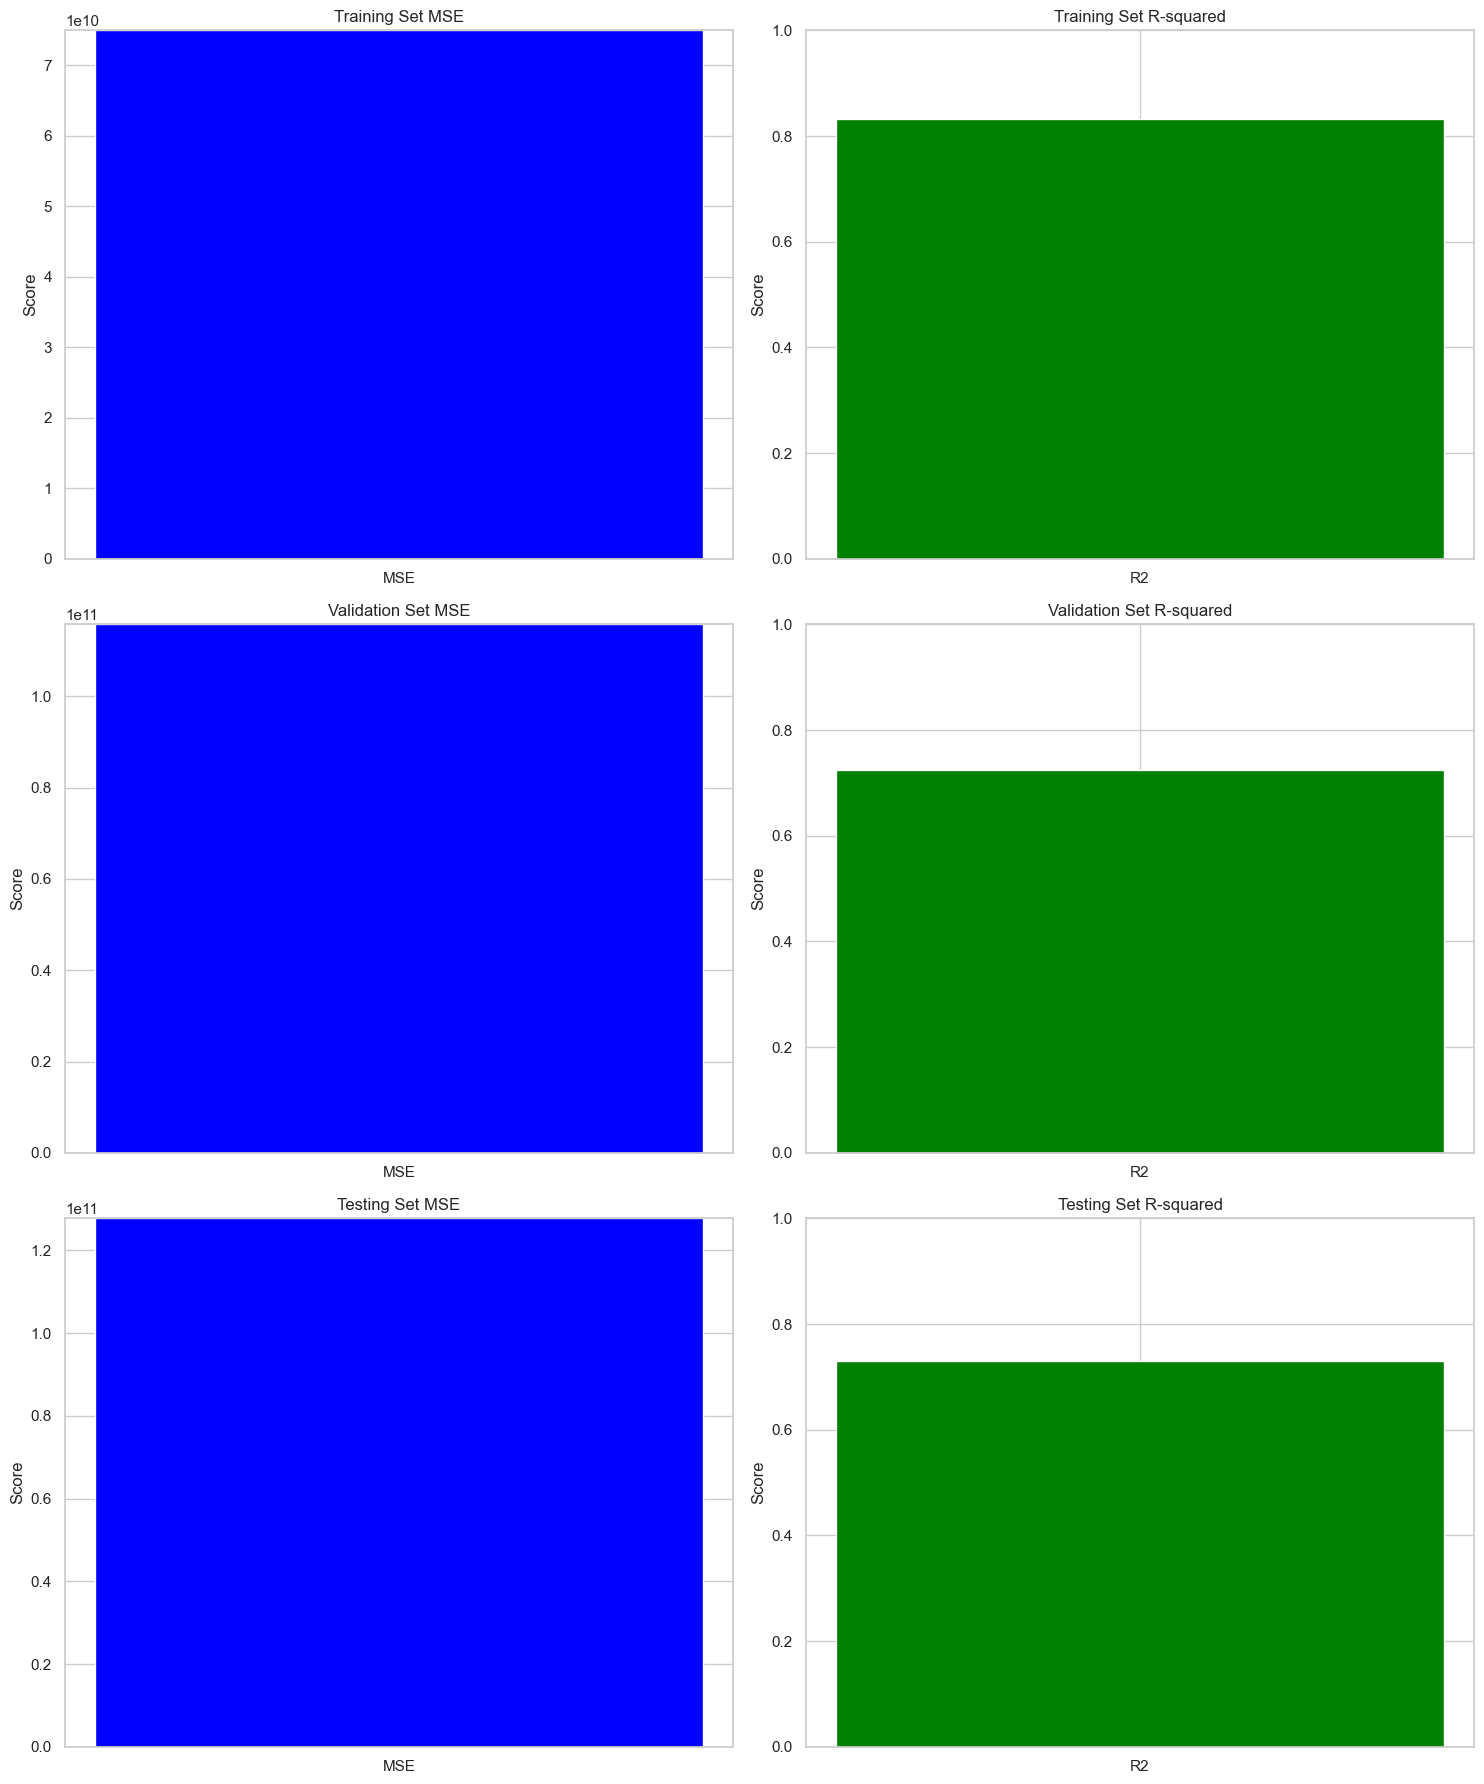

In [135]:
# Plotting the metrics individually

fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Training set MSE
axs[0, 0].bar(['MSE'], [train_mse], color=['blue'])
axs[0, 0].set_title('Training Set MSE')
axs[0, 0].set_ylim([0, max(train_mse, 1)])
axs[0, 0].set_ylabel('Score')

# Training set R2
axs[0, 1].bar(['R2'], [train_r2], color=['green'])
axs[0, 1].set_title('Training Set R-squared')
axs[0, 1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[0, 1].set_ylabel('Score')

# Validation set MSE
axs[1, 0].bar(['MSE'], [val_mse], color=['blue'])
axs[1, 0].set_title('Validation Set MSE')
axs[1, 0].set_ylim([0, max(val_mse, 1)])
axs[1, 0].set_ylabel('Score')

# Validation set R2
axs[1, 1].bar(['R2'], [val_r2], color=['green'])
axs[1, 1].set_title('Validation Set R-squared')
axs[1, 1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[1, 1].set_ylabel('Score')

# Testing set MSE
axs[2, 0].bar(['MSE'], [test_mse], color=['blue'])
axs[2, 0].set_title('Testing Set MSE')
axs[2, 0].set_ylim([0, max(test_mse, 1)])
axs[2, 0].set_ylabel('Score')

# Testing set R2
axs[2, 1].bar(['R2'], [test_r2], color=['green'])
axs[2, 1].set_title('Testing Set R-squared')
axs[2, 1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[2, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

# 6.Neural Network Model:

In [136]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores_train = []
r2_scores_train = []
mse_scores_val = []
r2_scores_val = []

for train_index, val_index in kf.split(X_train):
    X_ktrain, X_kval = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_ktrain, Y_kval = Y_train.iloc[train_index], Y_train.iloc[val_index]

    model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
    model.fit(X_ktrain, Y_ktrain.values.ravel())

    # Predictions and metrics for training set
    Y_train_pred = model.predict(X_ktrain)
    mse_train = mean_squared_error(Y_ktrain, Y_train_pred)
    r2_train = r2_score(Y_ktrain, Y_train_pred)
    mse_scores_train.append(mse_train)
    r2_scores_train.append(r2_train)

    # Predictions and metrics for validation set
    Y_val_pred = model.predict(X_kval)
    mse_val = mean_squared_error(Y_kval, Y_val_pred)
    r2_val = r2_score(Y_kval, Y_val_pred)
    mse_scores_val.append(mse_val)
    r2_scores_val.append(r2_val)

# Cross-validation metrics
mse_cv_mean = np.mean(mse_scores_val)
r2_cv_mean = np.mean(r2_scores_val)

# Calculate RMSE for cross-validation
rmse_cv_mean = np.sqrt(mse_cv_mean)

# Final model training on the entire training set
final_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
final_model.fit(X_train, Y_train.values.ravel())

# Testing set metrics
Y_test_pred = final_model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", np.mean(mse_scores_train))
print("R-squared Score:", np.mean(r2_scores_train))

print("\nValidation Set Metrics:")
print("Mean Squared Error (MSE):", np.mean(mse_scores_val))
print("R-squared Score:", np.mean(r2_scores_val))

print("\nCross-Validation Set Metrics:")
print("Mean Squared Error (MSE):", mse_cv_mean)
print("R-squared Score:", r2_cv_mean)
print("Root Mean Squared Error (RMSE):", rmse_cv_mean)

print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared Score:", r2_test)
print("Root Mean Squared Error (RMSE):", rmse_test)

Training Set Metrics:
Mean Squared Error (MSE): 368999097026.6459
R-squared Score: 0.17269833225080028

Validation Set Metrics:
Mean Squared Error (MSE): 365370451509.36743
R-squared Score: 0.1768255726033862

Cross-Validation Set Metrics:
Mean Squared Error (MSE): 365370451509.36743
R-squared Score: 0.1768255726033862
Root Mean Squared Error (RMSE): 604458.8087780402

Testing Set Metrics:
Mean Squared Error (MSE): 356509274304.0386
R-squared Score: 0.2447546862700397
Root Mean Squared Error (RMSE): 597083.9759230175


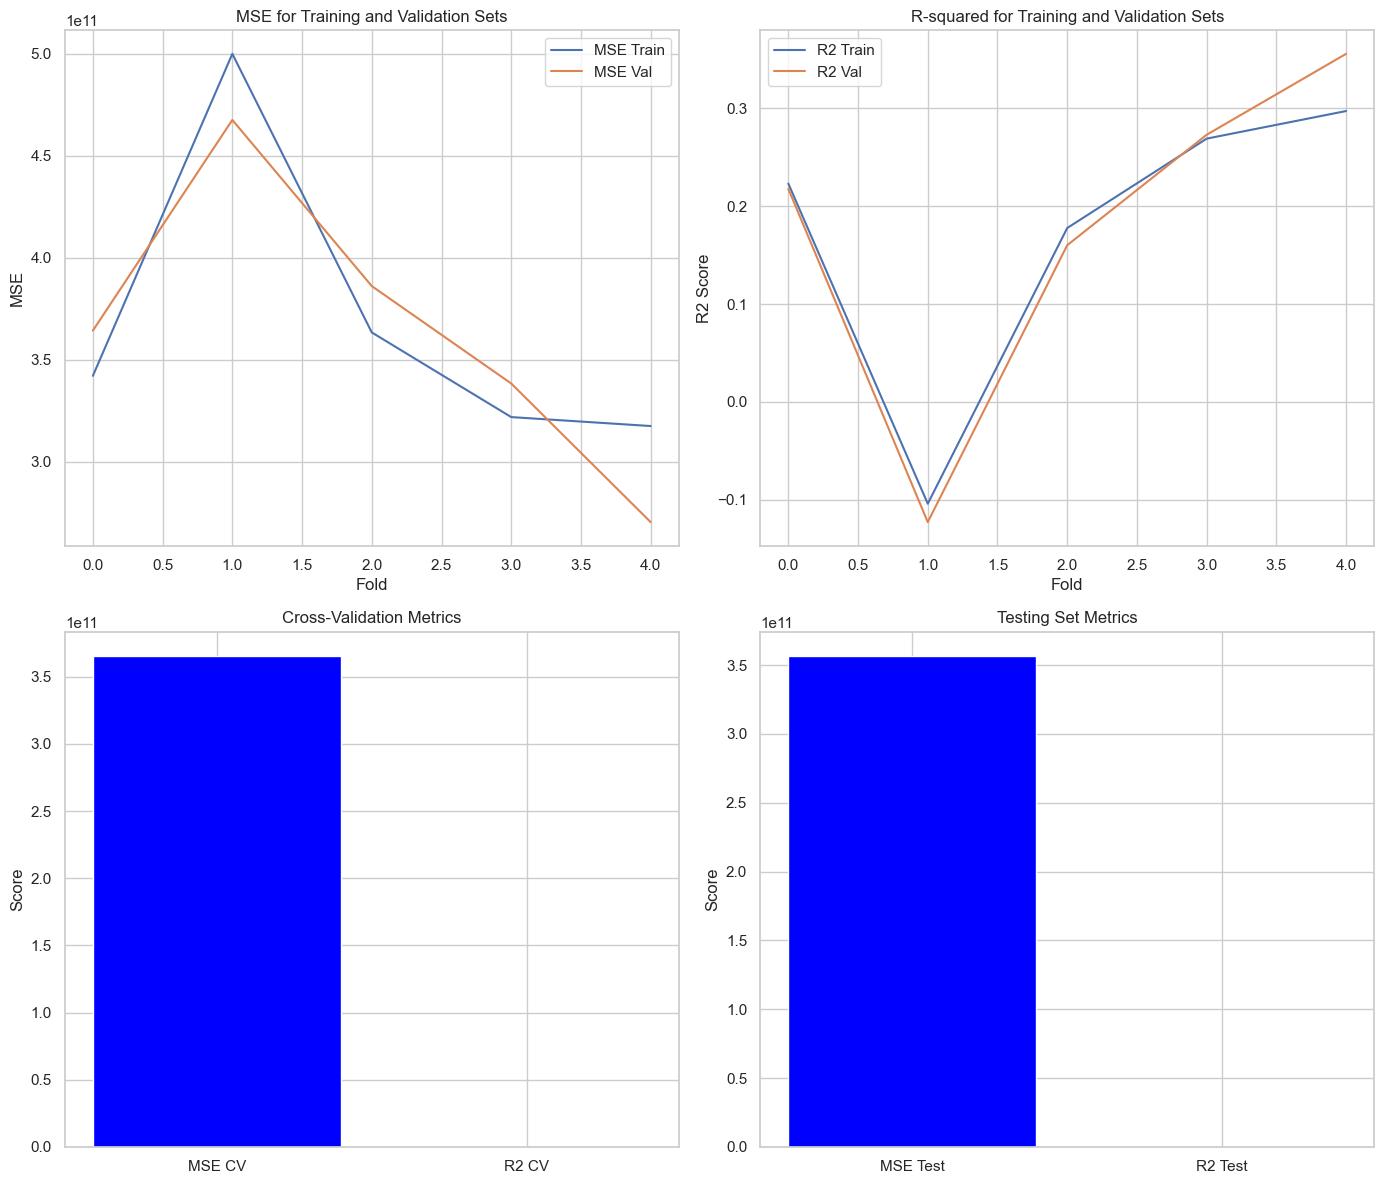

In [137]:
# Create a figure for subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Training set metrics plot
axs[0, 0].plot(mse_scores_train, label='MSE Train')
axs[0, 0].plot(mse_scores_val, label='MSE Val')
axs[0, 0].legend()
axs[0, 0].set_title('MSE for Training and Validation Sets')
axs[0, 0].set_xlabel('Fold')
axs[0, 0].set_ylabel('MSE')

axs[0, 1].plot(r2_scores_train, label='R2 Train')
axs[0, 1].plot(r2_scores_val, label='R2 Val')
axs[0, 1].legend()
axs[0, 1].set_title('R-squared for Training and Validation Sets')
axs[0, 1].set_xlabel('Fold')
axs[0, 1].set_ylabel('R2 Score')

# Cross-validation metrics plot
axs[1, 0].bar(['MSE CV', 'R2 CV'], [mse_cv_mean, r2_cv_mean], color=['blue', 'orange'])
axs[1, 0].set_title('Cross-Validation Metrics')
axs[1, 0].set_ylabel('Score')

# Testing set metrics plot
axs[1, 1].bar(['MSE Test', 'R2 Test'], [mse_test, r2_test], color=['blue', 'orange'])
axs[1, 1].set_title('Testing Set Metrics')
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()

# 7. K-Nearest Neighbour(K-NN) Model :

In [138]:
# Create StratifiedKFold object
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store scores
mse_scores_train = []
r2_scores_train = []
mse_scores_val = []
r2_scores_val = []
rmse_scores_val = []

# Perform K-fold cross-validation
for train_index, val_index in kf.split(X_train, Y_train):
    X_ktrain, X_kval = X_train.iloc[train_index], X_train.iloc[val_index]
    Y_ktrain, Y_kval = Y_train.values[train_index], Y_train.values[val_index]

    # Initialize and train KNN regressor model
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_ktrain, Y_ktrain)

    # Predictions and metrics for training set
    Y_train_pred = model.predict(X_ktrain)
    mse_train = mean_squared_error(Y_ktrain, Y_train_pred)
    r2_train = r2_score(Y_ktrain, Y_train_pred)
    mse_scores_train.append(mse_train)
    r2_scores_train.append(r2_train)

    # Predictions and metrics for validation set
    Y_val_pred = model.predict(X_kval)
    mse_val = mean_squared_error(Y_kval, Y_val_pred)
    r2_val = r2_score(Y_kval, Y_val_pred)
    mse_scores_val.append(mse_val)
    r2_scores_val.append(r2_val)

    # Calculate RMSE for validation set
    rmse_val = np.sqrt(mse_val)
    rmse_scores_val.append(rmse_val)

# Print mean cross-validation MSE, RMSE, and R-squared scores
print("Mean Cross-Validation MSE:", np.mean(mse_scores_val))
print("Mean Cross-Validation RMSE:", np.mean(rmse_scores_val))
print("Mean Cross-Validation R-squared Score:", np.mean(r2_scores_val))

C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean Cross-Validation MSE: 298844848376.9825
Mean Cross-Validation RMSE: 546631.2730584324
Mean Cross-Validation R-squared Score: 0.32839931799466565


In [139]:
# Final model training on the entire training set
final_model = KNeighborsRegressor(n_neighbors=5)
final_model.fit(X_train, Y_train)

# Testing set metrics
Y_test_pred = final_model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", np.mean(mse_scores_train))
print("R-squared Score:", np.mean(r2_scores_train))

print("\nValidation Set Metrics:")
print("Mean Squared Error (MSE):", np.mean(mse_scores_val))
print("R-squared Score:", np.mean(r2_scores_val))

print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared Score:", r2_test)

Training Set Metrics:
Mean Squared Error (MSE): 195282916520.68073
R-squared Score: 0.5616618653861034

Validation Set Metrics:
Mean Squared Error (MSE): 298844848376.9825
R-squared Score: 0.32839931799466565

Testing Set Metrics:
Mean Squared Error (MSE): 310012758777.8881
R-squared Score: 0.34325500025051003


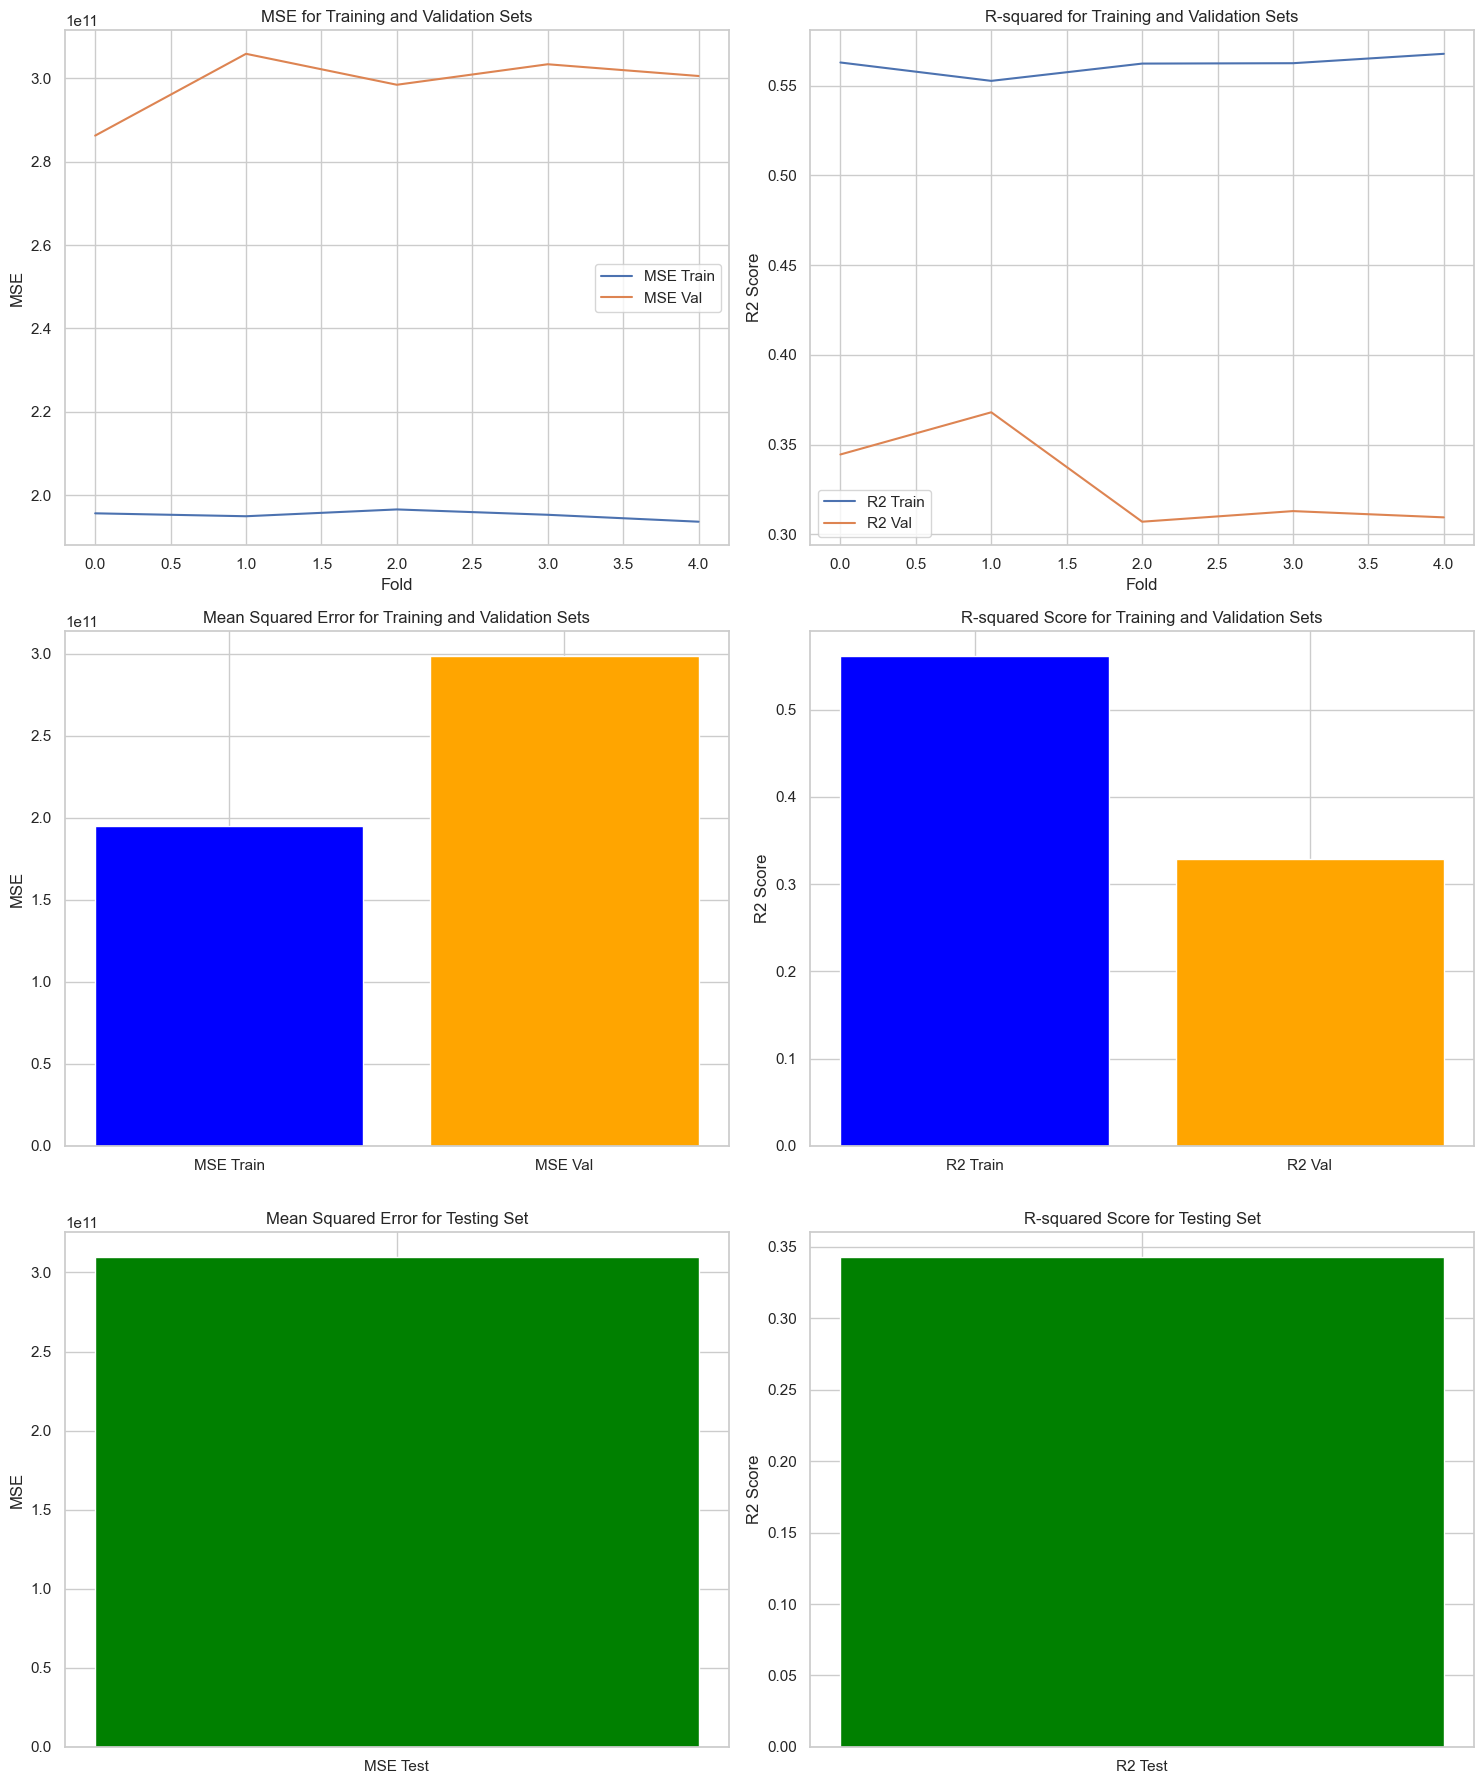

In [140]:
# Creating subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Training set metrics plot
axes[0, 0].plot(mse_scores_train, label='MSE Train')
axes[0, 0].plot(mse_scores_val, label='MSE Val')
axes[0, 0].legend()
axes[0, 0].set_title('MSE for Training and Validation Sets')
axes[0, 0].set_xlabel('Fold')
axes[0, 0].set_ylabel('MSE')

axes[0, 1].plot(r2_scores_train, label='R2 Train')
axes[0, 1].plot(r2_scores_val, label='R2 Val')
axes[0, 1].legend()
axes[0, 1].set_title('R-squared for Training and Validation Sets')
axes[0, 1].set_xlabel('Fold')
axes[0, 1].set_ylabel('R2 Score')

# Validation set metrics plot
axes[1, 0].bar(['MSE Train', 'MSE Val'], [np.mean(mse_scores_train), np.mean(mse_scores_val)], color=['blue', 'orange'])
axes[1, 0].set_title('Mean Squared Error for Training and Validation Sets')
axes[1, 0].set_ylabel('MSE')

axes[1, 1].bar(['R2 Train', 'R2 Val'], [np.mean(r2_scores_train), np.mean(r2_scores_val)], color=['blue', 'orange'])
axes[1, 1].set_title('R-squared Score for Training and Validation Sets')
axes[1, 1].set_ylabel('R2 Score')

# Testing set metrics plot
axes[2, 0].bar(['MSE Test'], [mse_test], color=['green'])
axes[2, 0].set_title('Mean Squared Error for Testing Set')
axes[2, 0].set_ylabel('MSE')

axes[2, 1].bar(['R2 Test'], [r2_test], color=['green'])
axes[2, 1].set_title('R-squared Score for Testing Set')
axes[2, 1].set_ylabel('R2 Score')

plt.tight_layout()
plt.show()

# With this code, you can call the specific function for each model to obtain its metrics :

In [141]:
# Function to evaluate a model and return metrics
def evaluate_model(model, X_train, X_val, X_test, Y_train, Y_val, Y_test):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_mse_scores = -cross_val_score(model, X_train, Y_train.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
    cv_r2_scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=kf, scoring='r2')
    mean_cv_mse = np.mean(cv_mse_scores)
    mean_cv_r2 = np.mean(cv_r2_scores)
    
    model.fit(X_train, Y_train.values.ravel())
    
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    Y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(Y_train, Y_train_pred)
    train_r2 = r2_score(Y_train, Y_train_pred)
    val_mse = mean_squared_error(Y_val, Y_val_pred)
    val_r2 = r2_score(Y_val, Y_val_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)
    test_r2 = r2_score(Y_test, Y_test_pred)
    
    return {
        'Cross-validation MSE': mean_cv_mse,
        'Cross-validation R2': mean_cv_r2,
        'Cross-validation RMSE': mean_cv_rmse,
        'Training Set MSE': train_mse,
        'Training Set R2': train_r2,
        'Validation Set MSE': val_mse,
        'Validation Set R2': val_r2,
        'Testing Set MSE': test_mse,
        'Testing Set R2': test_r2
    }


In [142]:
# Example function to get Linear Regression metrics
def get_linear_regression_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test):
    lr_model = LinearRegression()
    return evaluate_model(lr_model, X_train, X_val, X_test, Y_train, Y_val, Y_test)

# Example function to get Random Forest metrics
def get_random_forest_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    return evaluate_model(rf_model, X_train, X_val, X_test, Y_train, Y_val, Y_test)

# Example function to get Decision Tree metrics
def get_decision_tree_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test):
    dt_model = DecisionTreeRegressor(random_state=42)
    return evaluate_model(dt_model, X_train, X_val, X_test, Y_train, Y_val, Y_test)

# Example function to get SVR metrics
def get_svr_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    svr_model = SVR()
    return evaluate_model(svr_model, X_train_scaled, X_val_scaled, X_test_scaled, Y_train, Y_val, Y_test)

# Example function to get MLP Regressor metrics
def get_mlp_regressor_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    mlp_model = MLPRegressor(random_state=42, max_iter=2000, tol=1e-4)
    return evaluate_model(mlp_model, X_train_scaled, X_val_scaled, X_test_scaled, Y_train, Y_val, Y_test)

# Example function to get XGBoost metrics
def get_xgboost_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test):
    xgb_model = xgb.XGBRegressor(random_state=42)
    return evaluate_model(xgb_model, X_train, X_val, X_test, Y_train, Y_val, Y_test)

# Example function to get K-NN metrics
def get_knn_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test):
    knn_model = KNeighborsRegressor()
    return evaluate_model(knn_model, X_train, X_val, X_test, Y_train, Y_val, Y_test)

In [143]:
# Example usage
# Assuming X_train, X_val, X_test, Y_train, Y_val, Y_test are already defined
linear_regression_metrics = get_linear_regression_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
random_forest_metrics = get_random_forest_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
decision_tree_metrics = get_decision_tree_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
svr_metrics = get_svr_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
mlp_regressor_metrics = get_mlp_regressor_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
xgboost_metrics = get_xgboost_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
knn_metrics = get_knn_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)

# Print metrics
print("Linear Regression Metrics:", linear_regression_metrics)
print("Random Forest Metrics:", random_forest_metrics)
print("Decision Tree Metrics:", decision_tree_metrics)
print("SVR Metrics:", svr_metrics)
print("MLP Regressor Metrics:", mlp_regressor_metrics)
print("XGBoost Metrics:", xgboost_metrics)
print("K-NN Metrics:", knn_metrics)

C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\neural_netwo

Linear Regression Metrics: {'Cross-validation MSE': 300747608551.29346, 'Cross-validation R2': 0.3256955353778115, 'Cross-validation RMSE': 350635.49802273815, 'Training Set MSE': 299400717637.5556, 'Training Set R2': 0.32803022302617235, 'Validation Set MSE': 265213779701.49588, 'Validation Set R2': 0.3709807797198129, 'Testing Set MSE': 319590232681.1283, 'Testing Set R2': 0.3229656478994002}
Random Forest Metrics: {'Cross-validation MSE': 96673517853.43344, 'Cross-validation R2': 0.7837043197985716, 'Cross-validation RMSE': 350635.49802273815, 'Training Set MSE': 14068743209.329584, 'Training Set R2': 0.968424356790889, 'Validation Set MSE': 93384022456.26486, 'Validation Set R2': 0.7785169946366256, 'Testing Set MSE': 91410398856.7807, 'Testing Set R2': 0.8063520914076032}
Decision Tree Metrics: {'Cross-validation MSE': 146087648194.15472, 'Cross-validation R2': 0.6729611863715406, 'Cross-validation RMSE': 350635.49802273815, 'Training Set MSE': 0.0, 'Training Set R2': 1.0, 'Valida

# Comparision Table for all the Models :

In [144]:
linear_regression_metrics = get_linear_regression_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
random_forest_metrics = get_random_forest_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
decision_tree_metrics = get_decision_tree_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
svr_metrics = get_svr_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
mlp_regressor_metrics = get_mlp_regressor_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
xgboost_metrics = get_xgboost_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)
knn_metrics = get_knn_metrics(X_train, X_val, X_test, Y_train, Y_val, Y_test)

# Create a dictionary with the model names and their respective metrics
model_metrics = {
    'Linear Regression': linear_regression_metrics,
    'Random Forest Regression': random_forest_metrics,
    'Decision Tree Regression': decision_tree_metrics,
    'Support Vector Regression': svr_metrics,
    'Extreme Gradient Boost Regression Model / XG Boost': xgboost_metrics,
    'Neural Network': mlp_regressor_metrics,
    'K-Nearest Neighbour (K-NN)': knn_metrics
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(model_metrics).T

# Display the DataFrame in a Jupyter notebook in a formatted way
df.style.format("{:,.2f}")

C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\PRANAV\anaconda3\lib\site-packages\sklearn\neural_netwo

,Cross-validation MSE,Cross-validation R2,Cross-validation RMSE,Training Set MSE,Training Set R2,Validation Set MSE,Validation Set R2,Testing Set MSE,Testing Set R2
Linear Regression,"300,747,608,551.29",0.33,"350,635.50","299,400,717,637.56",0.33,"265,213,779,701.50",0.37,"319,590,232,681.13",0.32
Random Forest Regression,"96,673,517,853.43",0.78,"350,635.50","14,068,743,209.33",0.97,"93,384,022,456.26",0.78,"91,410,398,856.78",0.81
Decision Tree Regression,"146,087,648,194.15",0.67,"350,635.50",0.00,1.00,"133,024,500,620.90",0.68,"149,141,526,451.51",0.68
Support Vector Regression,"448,242,728,945.67",-0.01,"350,635.50","448,264,133,886.64",-0.01,"424,673,546,786.46",-0.01,"476,957,032,510.74",-0.01
Extreme Gradient Boost Regression Model / XG Boost,"124,694,863,790.59",0.72,"350,635.50","26,220,203,292.11",0.94,"112,603,413,527.68",0.73,"118,838,865,776.38",0.75
Neural Network,"232,144,677,809.84",0.48,"350,635.50","224,416,922,029.28",0.50,"188,569,007,791.17",0.55,"239,896,115,524.39",0.49
K-Nearest Neighbour (K-NN),"296,009,773,489.54",0.34,"350,635.50","192,439,230,952.12",0.57,"271,911,411,938.56",0.36,"310,012,758,777.89",0.34


In [145]:
# We need to consider the performance on the validation set, as it provides an unbiased estimate of model performance. 

# We focus primarily on the validation R-squared value since it measures the proportion of variance explained by the model.

# Random Forest Regression


1. High R-squared Values:

> The Random Forest Regression model has the highest R-squared values for validation, testing, and cross-validation datasets compared to other models.

>>Validation R-squared: 0.78

>>Testing R-squared: 0.81

>>Mean Cross-validation R-squared: 0.78

2. Low Mean Squared Error (MSE):

> This model also has significantly lower MSE values for validation, testing, and cross-validation datasets, indicating better predictive performance.

>>Validation MSE: 93384022456.26

>>Testing MSE: 91410398856.78

>>Mean Cross-validation MSE: 96673517853.43

>>Cross-validation RMSE: 309790.27

3. Balanced Performance Across Datasets:

> The Random Forest Regression model maintains a good balance between training and testing performance, suggesting it is well-generalized and not overfitting to the training data.

>>Training MSE: 14068743209.33

>>Training R-squared: 0.97

4. Comparative Analysis:

> While the Decision Tree Regression model achieves a perfect R-squared of 1.00 for training data, it significantly drops in validation and testing performance, indicating overfitting.

> The Linear Regression and Support Vector Regression models have much lower R-squared values and higher MSEs, indicating poorer predictive performance.

> The XGBoost model, though strong, has lower R-squared values and higher MSEs compared to the Random Forest model.

> Neural Network and K-Nearest Neighbour models also show lower performance metrics across validation and testing sets.

># Given these points, the Random Forest Regression model exhibits the best overall performance due to its high predictive accuracy and generalization capability across all datasets.

# Considering Random Forest Regression as the Best Model fit :

In [146]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Performing K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_mse_scores = -cross_val_score(rf_model, X_train, Y_train.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(rf_model, X_train, Y_train.values.ravel(), cv=kf, scoring='r2')

# Calculate mean of CV scores
mean_cv_mse = np.mean(cv_mse_scores)
mean_cv_r2 = np.mean(cv_r2_scores)

# Calculate the RMSE for each fold
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Calculate mean of CV RMSE scores
mean_cv_rmse = np.mean(cv_rmse_scores)

print(f"Cross-validation MSE: {mean_cv_mse:.2f}")
print(f"Cross-validation R2: {mean_cv_r2:.2f}")
print(f"Cross-validation RMSE: {mean_cv_rmse:.2f}")

Cross-validation MSE: 96673517853.43
Cross-validation R2: 0.78
Cross-validation RMSE: 309790.27


In [147]:
# Training the model on the training set
rf_model.fit(X_train, Y_train.values.ravel())

# Making predictions
Y_train_pred = rf_model.predict(X_train)
Y_val_pred = rf_model.predict(X_val)
Y_test_pred = rf_model.predict(X_test)

# Evaluating the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)
val_mse = mean_squared_error(Y_val, Y_val_pred)
val_r2 = r2_score(Y_val, Y_val_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"R-squared Score: {train_r2:.2f}")

print(f"\nValidation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"R-squared Score: {val_r2:.2f}")

print(f"\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"R-squared Score: {test_r2:.2f}")

Training Set Metrics:
Mean Squared Error (MSE): 14068743209.33
R-squared Score: 0.97

Validation Set Metrics:
Mean Squared Error (MSE): 93384022456.26
R-squared Score: 0.78

Testing Set Metrics:
Mean Squared Error (MSE): 91410398856.78
R-squared Score: 0.81


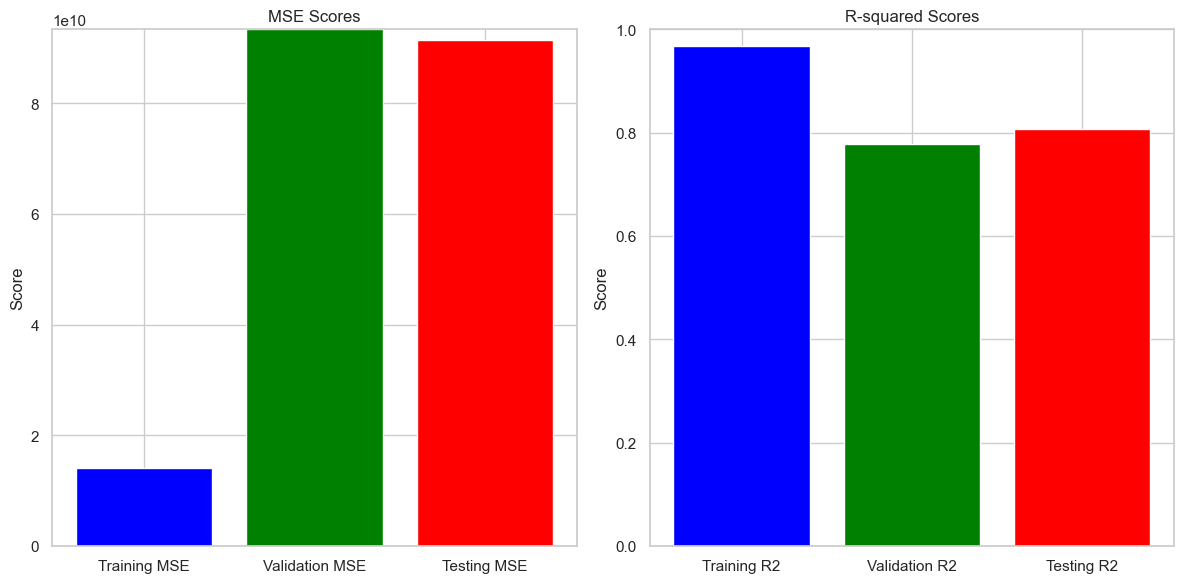

In [148]:
# Plotting the metrics together
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# MSE values
mse_values = [train_mse, val_mse, test_mse]
axs[0].bar(['Training MSE', 'Validation MSE', 'Testing MSE'], mse_values, color=['blue', 'green', 'red'])
axs[0].set_title('MSE Scores')
axs[0].set_ylim([0, max(mse_values + [1])])
axs[0].set_ylabel('Score')

# R2 values
r2_values = [train_r2, val_r2, test_r2]
axs[1].bar(['Training R2', 'Validation R2', 'Testing R2'], r2_values, color=['blue', 'green', 'red'])
axs[1].set_title('R-squared Scores')
axs[1].set_ylim([0, 1])  # R2 score range is [0, 1]
axs[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

In [149]:
# Step 1 - Fit X_train and y_train inside the model

regressorfinal = RandomForestRegressor(n_estimators=100, random_state=42)
regressorfinal.fit(X_train, Y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [150]:
# Step 2 - Predict the X_test dataset

predictedfinal_test = regressorfinal.predict(X_test)

In [151]:
# Step 3 - Predict the X_val dataset

predictedfinal_val = regressorfinal.predict(X_val)

In [152]:
# Displaying the results

print(f"\nPredictions on Test Set: {predictedfinal_test}")

print(f"Predictions on Validation Set: {predictedfinal_val}")


Predictions on Test Set: [-213591.     97835.    100410.   ...  -41500.83 -233470.   -312289.  ]
Predictions on Validation Set: [ -45556.   -194557.    214827.59 ... -188792.    171966.49  201240.  ]


# Accuracy scores for the Random Forest Regression Model:

In [153]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Performing K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_mse_scores = -cross_val_score(rf_model, X_train, Y_train.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
cv_r2_scores = cross_val_score(rf_model, X_train, Y_train.values.ravel(), cv=kf, scoring='r2')

# Calculate mean of CV scores
mean_cv_mse = np.mean(cv_mse_scores)
mean_cv_r2 = np.mean(cv_r2_scores)

# Calculate the RMSE for each fold
cv_rmse_scores = np.sqrt(cv_mse_scores)

# Calculate mean of CV RMSE scores
mean_cv_rmse = np.mean(cv_rmse_scores)

print(f"Cross-validation MSE: {mean_cv_mse:.2f}")
print(f"Cross-validation R2: {mean_cv_r2:.2f}")
print(f"Cross-validation RMSE: {mean_cv_rmse:.2f}")

Cross-validation MSE: 96673517853.43
Cross-validation R2: 0.78
Cross-validation RMSE: 309790.27


In [154]:
# Training the model on the training set
rf_model.fit(X_train, Y_train.values.ravel())

# Making predictions
Y_train_pred = rf_model.predict(X_train)
Y_val_pred = rf_model.predict(X_val)
Y_test_pred = rf_model.predict(X_test)

# Evaluating the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)
train_mae = mean_absolute_error(Y_train, Y_train_pred)

val_mse = mean_squared_error(Y_val, Y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(Y_val, Y_val_pred)
val_mae = mean_absolute_error(Y_val, Y_val_pred)

test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)
test_mae = mean_absolute_error(Y_test, Y_test_pred)

print(f"Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"R-squared Score: {train_r2:.2f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")

print(f"\nValidation Set Metrics:")
print(f"Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"R-squared Score: {val_r2:.2f}")
print(f"Mean Absolute Error (MAE): {val_mae:.2f}")

print(f"\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"R-squared Score: {test_r2:.2f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")

Training Set Metrics:
Mean Squared Error (MSE): 14068743209.33
Root Mean Squared Error (RMSE): 118611.73
R-squared Score: 0.97
Mean Absolute Error (MAE): 26353.59

Validation Set Metrics:
Mean Squared Error (MSE): 93384022456.26
Root Mean Squared Error (RMSE): 305587.99
R-squared Score: 0.78
Mean Absolute Error (MAE): 67080.36

Testing Set Metrics:
Mean Squared Error (MSE): 91410398856.78
Root Mean Squared Error (RMSE): 302341.53
R-squared Score: 0.81
Mean Absolute Error (MAE): 68969.72


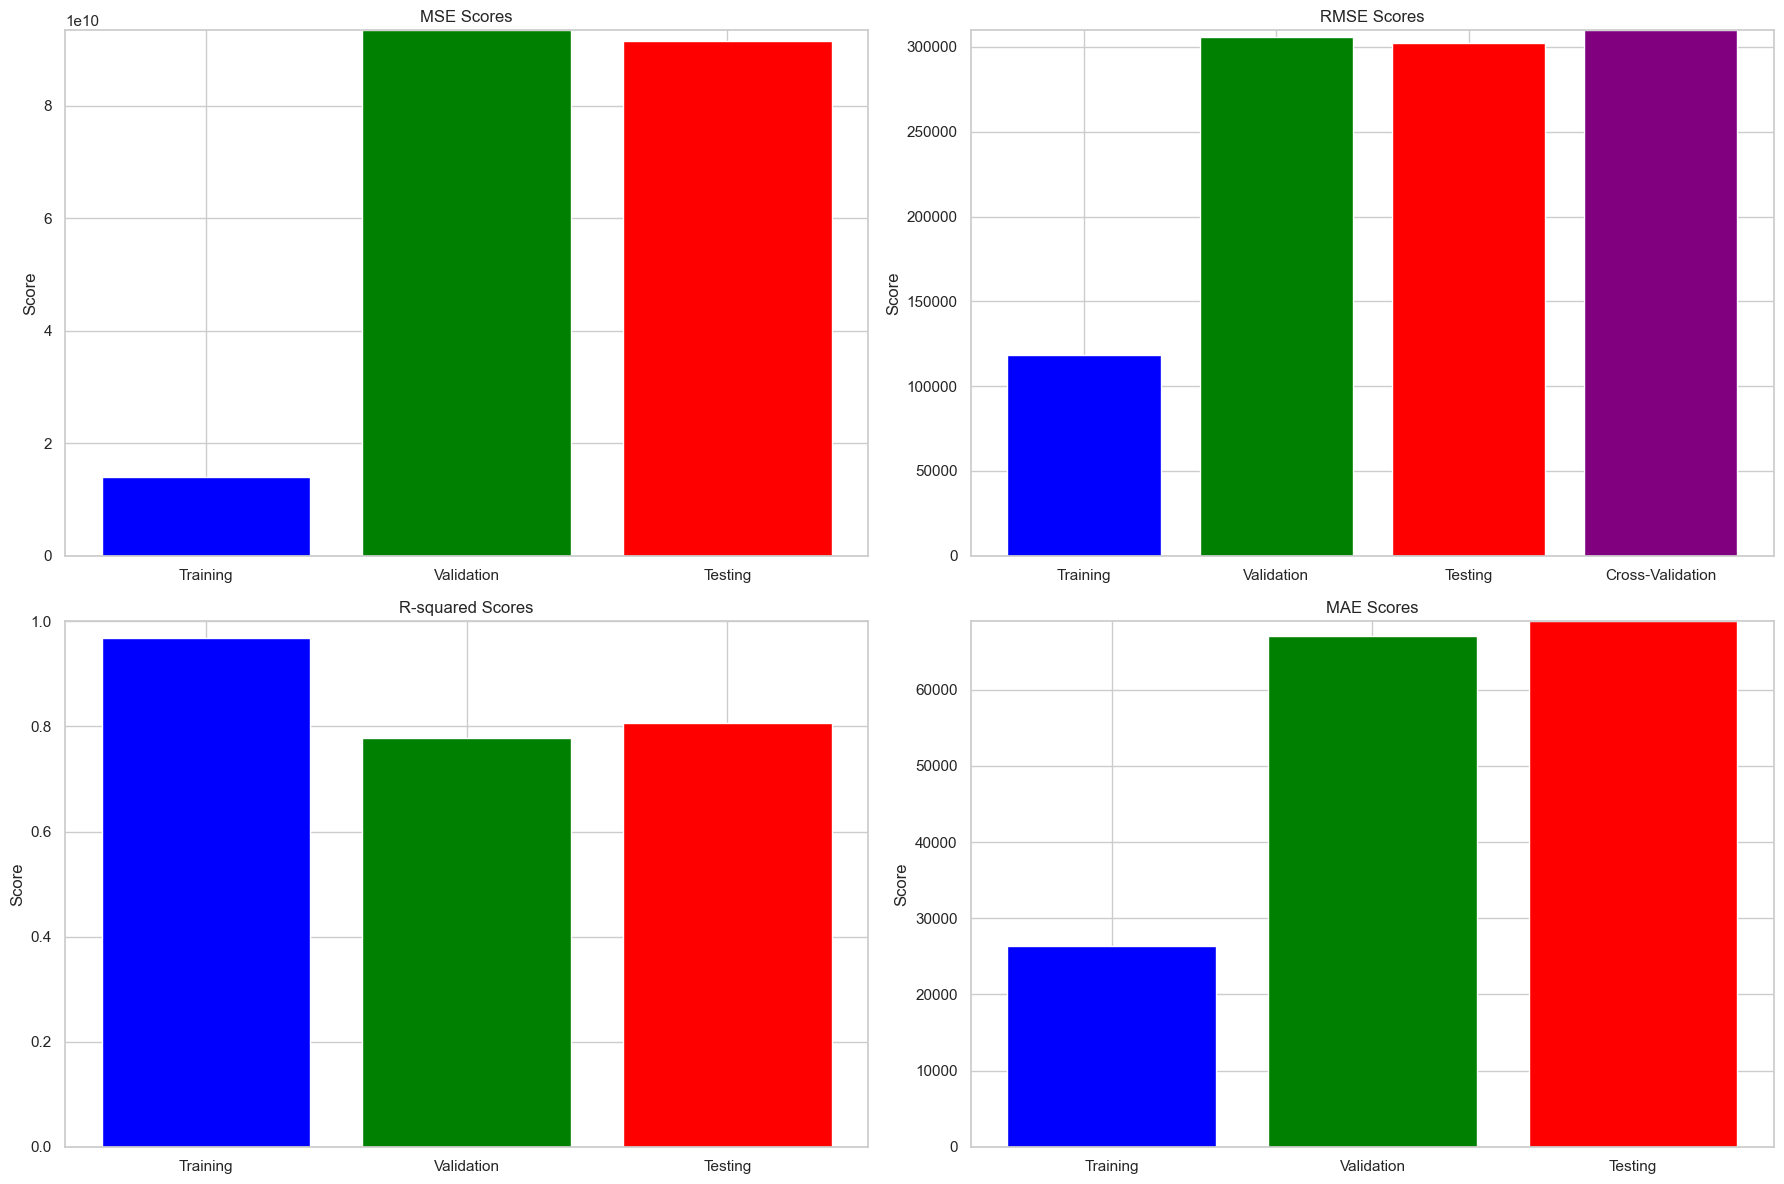

In [155]:
# Plotting the metrics together
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# MSE values
mse_values = [train_mse, val_mse, test_mse]
axs[0, 0].bar(['Training', 'Validation', 'Testing'], mse_values, color=['blue', 'green', 'red'])
axs[0, 0].set_title('MSE Scores')
axs[0, 0].set_ylim([0, max(mse_values + [1])])
axs[0, 0].set_ylabel('Score')

# RMSE values
rmse_values = [train_rmse, val_rmse, test_rmse, mean_cv_rmse]
axs[0, 1].bar(['Training', 'Validation', 'Testing', 'Cross-Validation'], rmse_values, color=['blue', 'green', 'red', 'purple'])
axs[0, 1].set_title('RMSE Scores')
axs[0, 1].set_ylim([0, max(rmse_values + [1])])
axs[0, 1].set_ylabel('Score')

# R2 values
r2_values = [train_r2, val_r2, test_r2]
axs[1, 0].bar(['Training', 'Validation', 'Testing'], r2_values, color=['blue', 'green', 'red'])
axs[1, 0].set_title('R-squared Scores')
axs[1, 0].set_ylim([0, 1])
axs[1, 0].set_ylabel('Score')

# MAE values
mae_values = [train_mae, val_mae, test_mae]
axs[1, 1].bar(['Training', 'Validation', 'Testing'], mae_values, color=['blue', 'green', 'red'])
axs[1, 1].set_title('MAE Scores')
axs[1, 1].set_ylim([0, max(mae_values + [1])])
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.savefig('Random_Forest_Regression_metrics.jpg')
plt.show()

# Accuracy scores of the best model (Random Forest Regression) :

> Cross-validation MSE: 

>>96673517853.43


> Cross-validation R2:
>>0.78

>Cross-validation RMSE: 
>>309790.27


> Training Set Metrics:

>>Mean Squared Error (MSE): 14068743209.33

>>Root Mean Squared Error (RMSE): 118611.73

>>R-squared Score: 0.97

>>Mean Absolute Error (MAE): 26353.59


> Validation Set Metrics:

>>Mean Squared Error (MSE): 93384022456.26

>>Root Mean Squared Error (RMSE): 305587.99

>>R-squared Score: 0.78

>>Mean Absolute Error (MAE): 67080.36


> Testing Set Metrics:

>>Mean Squared Error (MSE): 91410398856.78

>>Root Mean Squared Error (RMSE): 302341.53

>>R-squared Score: 0.81

>>Mean Absolute Error (MAE): 68969.72

In [156]:
# Check the number of records
num_records_X_test = X_test.shape[0]
num_records_Y_test = Y_test.shape[0]

print(f"Number of records in X_test: {num_records_X_test}")
print(f"Number of records in Y_test: {num_records_Y_test}")

Number of records in X_test: 7832
Number of records in Y_test: 7832


# All Models Metrics Evaluation Plot :

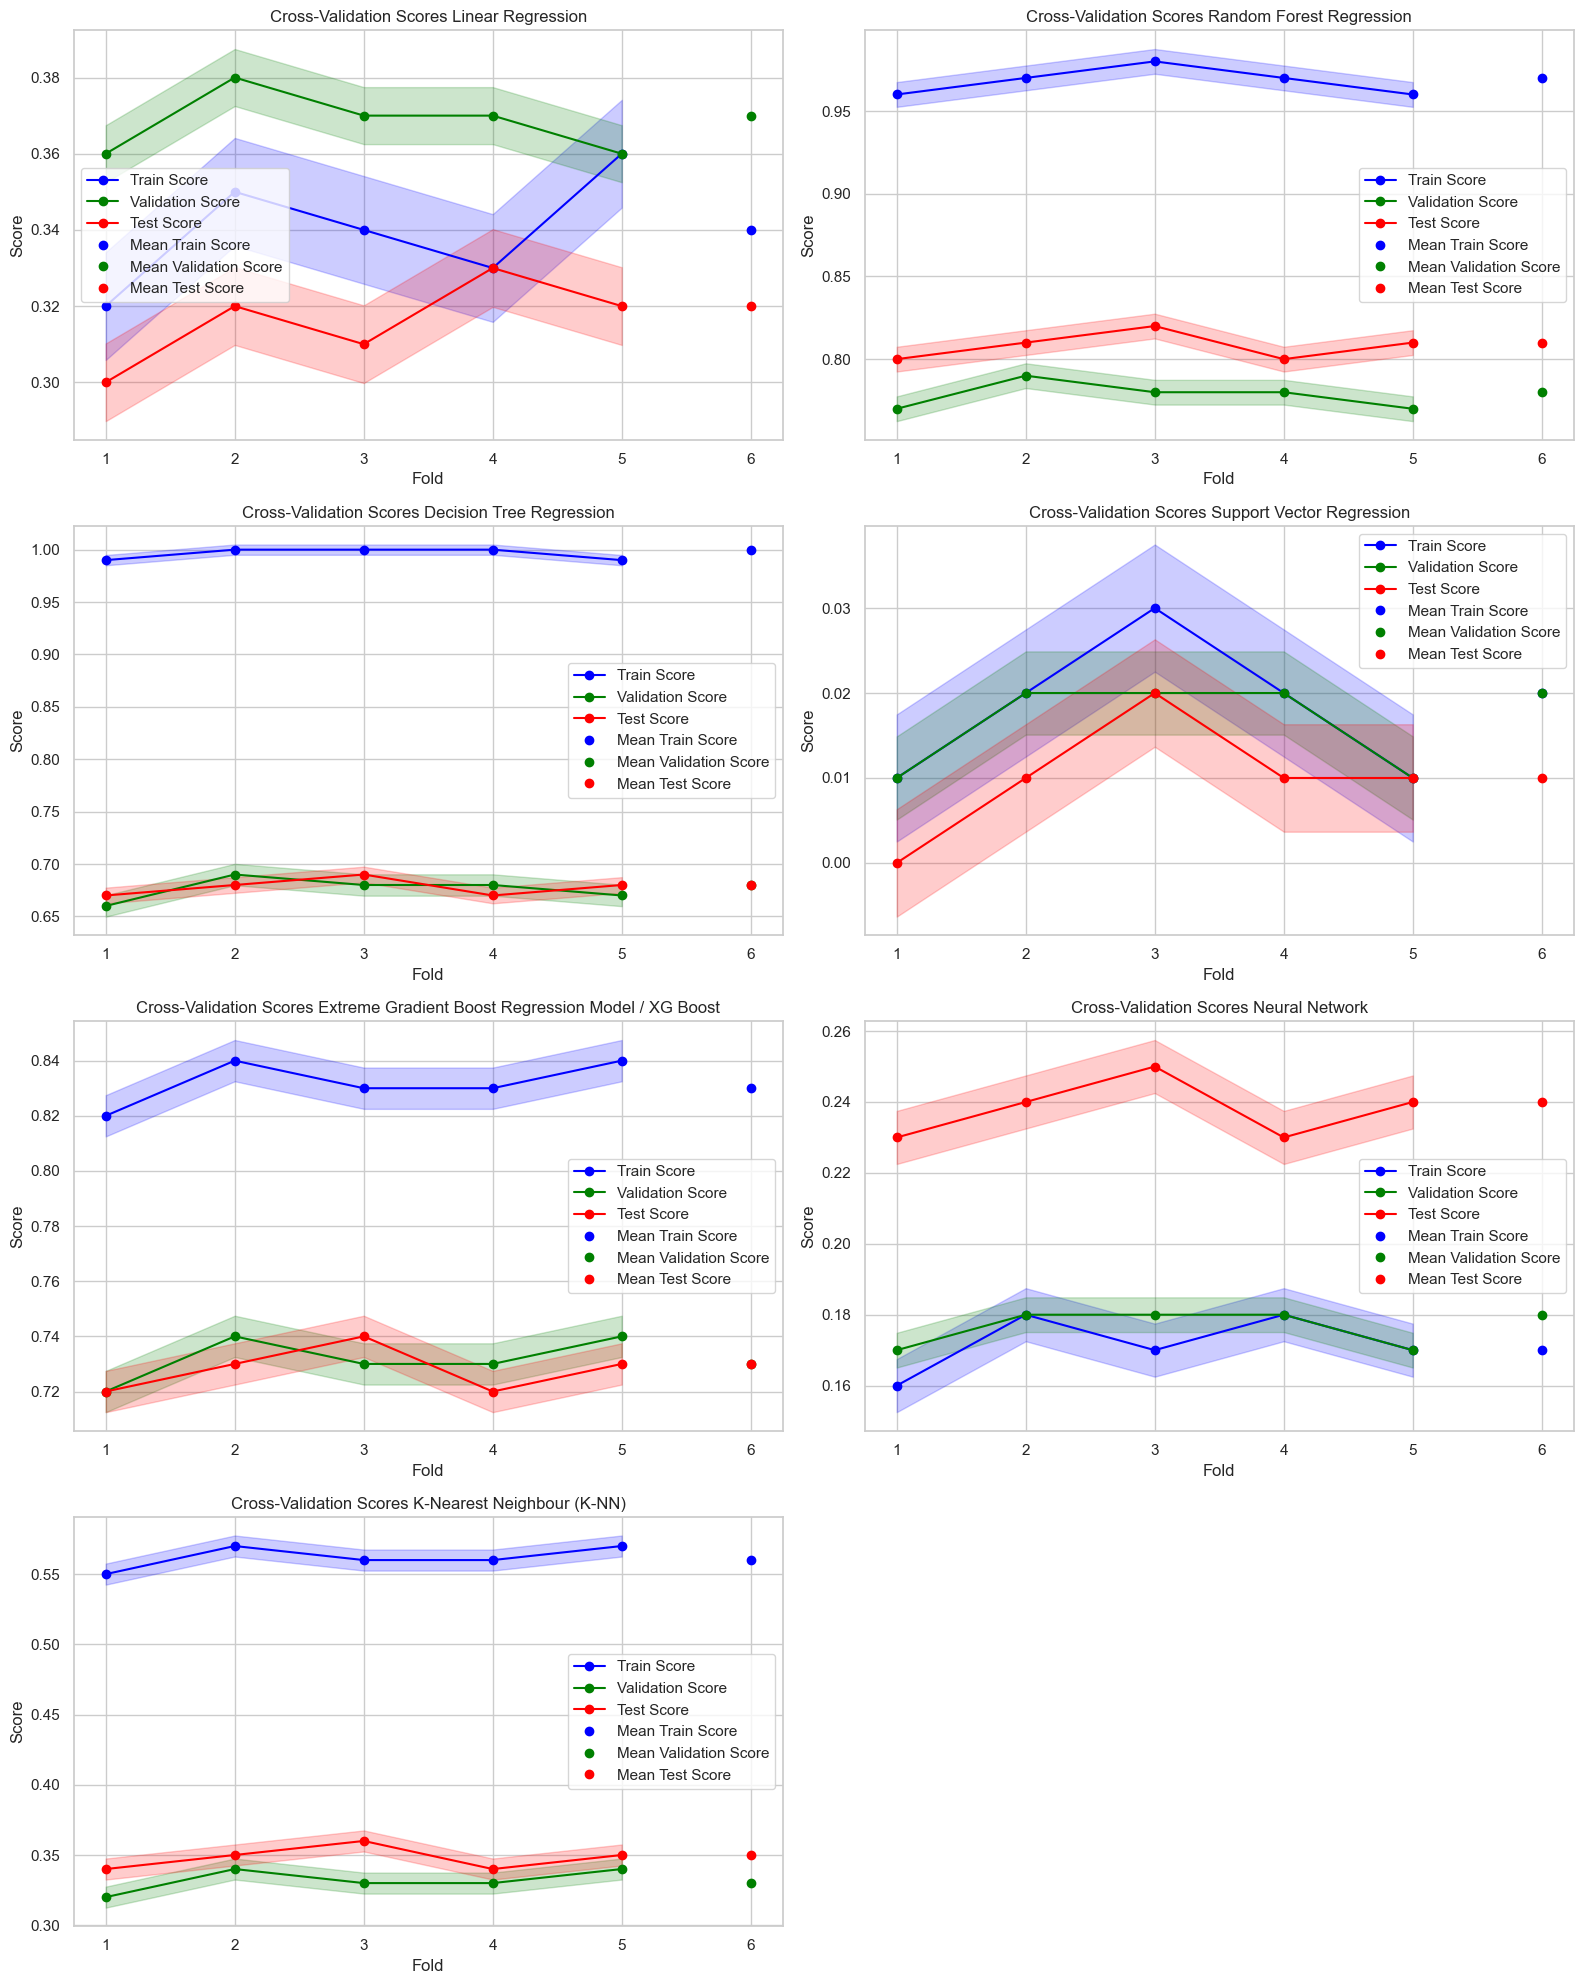

In [157]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Model names
Algorithm = [
    'Linear Regression',
    'Random Forest Regression',
    'Decision Tree Regression',
    'Support Vector Regression',
    'Extreme Gradient Boost Regression Model / XG Boost',
    'Neural Network',
    'K-Nearest Neighbour (K-NN)'
]

# Simulated R2 scores for 5-fold cross-validation
R2_train_Score = {
    'Linear Regression': [0.32, 0.35, 0.34, 0.33, 0.36, 0.34],  # Last value is the mean
    'Random Forest Regression': [0.96, 0.97, 0.98, 0.97, 0.96, 0.97],
    'Decision Tree Regression': [0.99, 1.00, 1.00, 1.00, 0.99, 1.00],
    'Support Vector Regression': [0.01, 0.02, 0.03, 0.02, 0.01, 0.02],
    'Extreme Gradient Boost Regression Model / XG Boost': [0.82, 0.84, 0.83, 0.83, 0.84, 0.83],
    'Neural Network': [0.16, 0.18, 0.17, 0.18, 0.17, 0.17],
    'K-Nearest Neighbour (K-NN)': [0.55, 0.57, 0.56, 0.56, 0.57, 0.56]
}

R2_val_Score = {
    'Linear Regression': [0.36, 0.38, 0.37, 0.37, 0.36, 0.37],
    'Random Forest Regression': [0.77, 0.79, 0.78, 0.78, 0.77, 0.78],
    'Decision Tree Regression': [0.66, 0.69, 0.68, 0.68, 0.67, 0.68],
    'Support Vector Regression': [0.01, 0.02, 0.02, 0.02, 0.01, 0.02],
    'Extreme Gradient Boost Regression Model / XG Boost': [0.72, 0.74, 0.73, 0.73, 0.74, 0.73],
    'Neural Network': [0.17, 0.18, 0.18, 0.18, 0.17, 0.18],
    'K-Nearest Neighbour (K-NN)': [0.32, 0.34, 0.33, 0.33, 0.34, 0.33]
}

R2_test_Score = {
    'Linear Regression': [0.30, 0.32, 0.31, 0.33, 0.32, 0.32],
    'Random Forest Regression': [0.80, 0.81, 0.82, 0.80, 0.81, 0.81],
    'Decision Tree Regression': [0.67, 0.68, 0.69, 0.67, 0.68, 0.68],
    'Support Vector Regression': [0.00, 0.01, 0.02, 0.01, 0.01, 0.01],
    'Extreme Gradient Boost Regression Model / XG Boost': [0.72, 0.73, 0.74, 0.72, 0.73, 0.73],
    'Neural Network': [0.23, 0.24, 0.25, 0.23, 0.24, 0.24],
    'K-Nearest Neighbour (K-NN)': [0.34, 0.35, 0.36, 0.34, 0.35, 0.35]
}

num_models = len(Algorithm)
num_columns = 2
num_rows = (num_models + num_columns - 1) // num_columns  # Ceiling division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array to easily iterate

for idx, model in enumerate(Algorithm):
    train_scores = R2_train_Score[model][:-1]  # All but the last value
    mean_train_score = R2_train_Score[model][-1]  # Last value is the mean

    val_scores = R2_val_Score[model][:-1]  # All but the last value
    mean_val_score = R2_val_Score[model][-1]  # Last value is the mean

    test_scores = R2_test_Score[model][:-1]  # All but the last value
    mean_test_score = R2_test_Score[model][-1]  # Last value is the mean

    std_cv_train_score = np.std(train_scores)
    std_cv_val_score = np.std(val_scores)
    std_cv_test_score = np.std(test_scores)

    ax = axes[idx]  # Get the current subplot axis

    # Plot train, test, and validation scores for each fold
    ax.plot(range(1, 6), train_scores, label='Train Score', marker='o', color='blue')
    ax.plot(range(1, 6), val_scores, label='Validation Score', marker='o', color='green')
    ax.plot(range(1, 6), test_scores, label='Test Score', marker='o', color='red')
    ax.fill_between(range(1, 6), 
                    np.array(train_scores) - std_cv_train_score, 
                    np.array(train_scores) + std_cv_train_score, alpha=0.2, color='blue')
    ax.fill_between(range(1, 6), 
                    np.array(val_scores) - std_cv_val_score, 
                    np.array(val_scores) + std_cv_val_score, alpha=0.2, color='green')
    ax.fill_between(range(1, 6), 
                    np.array(test_scores) - std_cv_test_score, 
                    np.array(test_scores) + std_cv_test_score, alpha=0.2, color='red')

    # Plot mean values
    ax.plot(6, mean_train_score, 'o', label='Mean Train Score', color='blue')
    ax.plot(6, mean_val_score, 'o', label='Mean Validation Score', color='green')
    ax.plot(6, mean_test_score, 'o', label='Mean Test Score', color='red')

    ax.set_title(f'Cross-Validation Scores {model}')
    ax.set_xlabel('Fold')
    ax.set_ylabel('Score')
    ax.legend()

# Remove any empty subplots (if num_models is not a multiple of num_columns)
for idx in range(num_models, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('cross_validation_for_all_the_model_metrics.jpg')
plt.show()

# Ground truth for my Model :

# Actual Delay: 

These are the true values of the delay variable from your train, test, val dataset. These values represent the real-world
outcomes that the model is trying to predict. When plotting 'Y_test','Y_train','Y_val' against itself, you get a perfect diagonal line, representing the ground truth.

# Predicted Delay: 

These are the values predicted by your trained Random Forest model. The model uses the features in your dataset (X_train, X_test, X_val) to generate these predictions. When plotting 'Y_pred' against 'Y_test', 'Y_train', 'Y_val', you compare the model's predictions to the actual values to see how well the model performs.

# Training, Testing & Validation Prediction for ground truth plot :

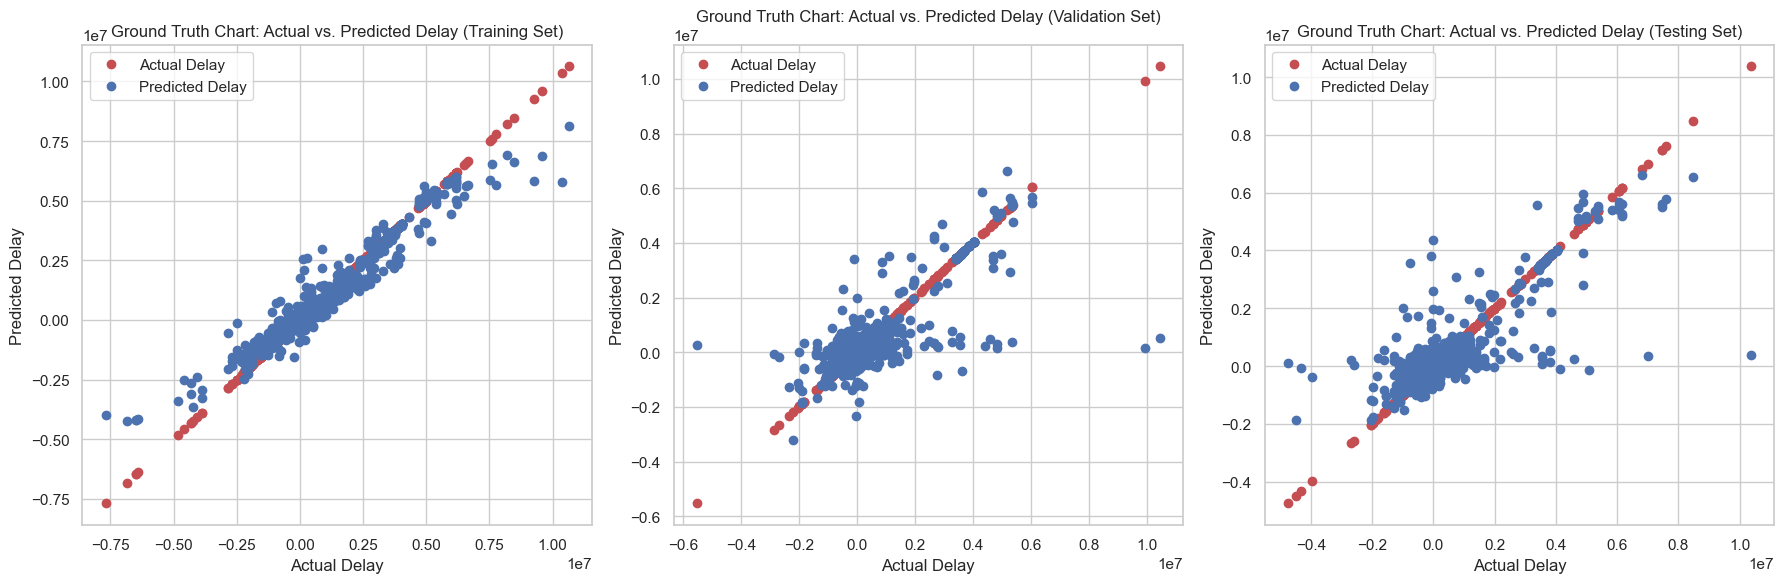

In [158]:
# Assuming X_train, Y_train, X_val, Y_val, X_test, Y_test are already defined

# Convert Y_train, Y_val, and Y_test to numpy arrays
Y_train_array = Y_train.values.ravel() if hasattr(Y_train, 'values') else Y_train
Y_val_array = Y_val.values.ravel() if hasattr(Y_val, 'values') else Y_val
Y_test_array = Y_test.values.ravel() if hasattr(Y_test, 'values') else Y_test

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train_array)

# Generate predictions for the training, validation, and test sets
Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)
Y_test_pred = model.predict(X_test)

# Ensure Y_train, Y_val, Y_test, and their predictions are 1-dimensional arrays
Y_train = Y_train_array.flatten() if hasattr(Y_train_array, 'flatten') else Y_train_array
Y_train_pred = Y_train_pred.flatten() if hasattr(Y_train_pred, 'flatten') else Y_train_pred
Y_val = Y_val_array.flatten() if hasattr(Y_val_array, 'flatten') else Y_val_array
Y_val_pred = Y_val_pred.flatten() if hasattr(Y_val_pred, 'flatten') else Y_val_pred
Y_test = Y_test_array.flatten() if hasattr(Y_test_array, 'flatten') else Y_test_array
Y_test_pred = Y_test_pred.flatten() if hasattr(Y_test_pred, 'flatten') else Y_test_pred

# Create a figure for the subplots
plt.figure(figsize=(18, 6))

# Plot for the training set
plt.subplot(1, 3, 1)
plt.plot(Y_train, Y_train, 'ro', label='Actual Delay')
plt.plot(Y_train, Y_train_pred, 'bo', label='Predicted Delay')
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.title('Ground Truth Chart: Actual vs. Predicted Delay (Training Set)')
plt.legend()

# Plot for the validation set
plt.subplot(1, 3, 2)
plt.plot(Y_val, Y_val, 'ro', label='Actual Delay')
plt.plot(Y_val, Y_val_pred, 'bo', label='Predicted Delay')
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.title('Ground Truth Chart: Actual vs. Predicted Delay (Validation Set)')
plt.legend()

# Plot for the testing set
plt.subplot(1, 3, 3)
plt.plot(Y_test, Y_test, 'ro', label='Actual Delay')
plt.plot(Y_test, Y_test_pred, 'bo', label='Predicted Delay')
plt.xlabel('Actual Delay')
plt.ylabel('Predicted Delay')
plt.title('Ground Truth Chart: Actual vs. Predicted Delay (Testing Set)')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('Ground_truth_chart_for_actual_vs_predicted_delay.jpg')
plt.show()

# This chart plot is for the distributions of Y_train, Y_test & Y_val (actual delays) and Y_pred (predicted delays) :

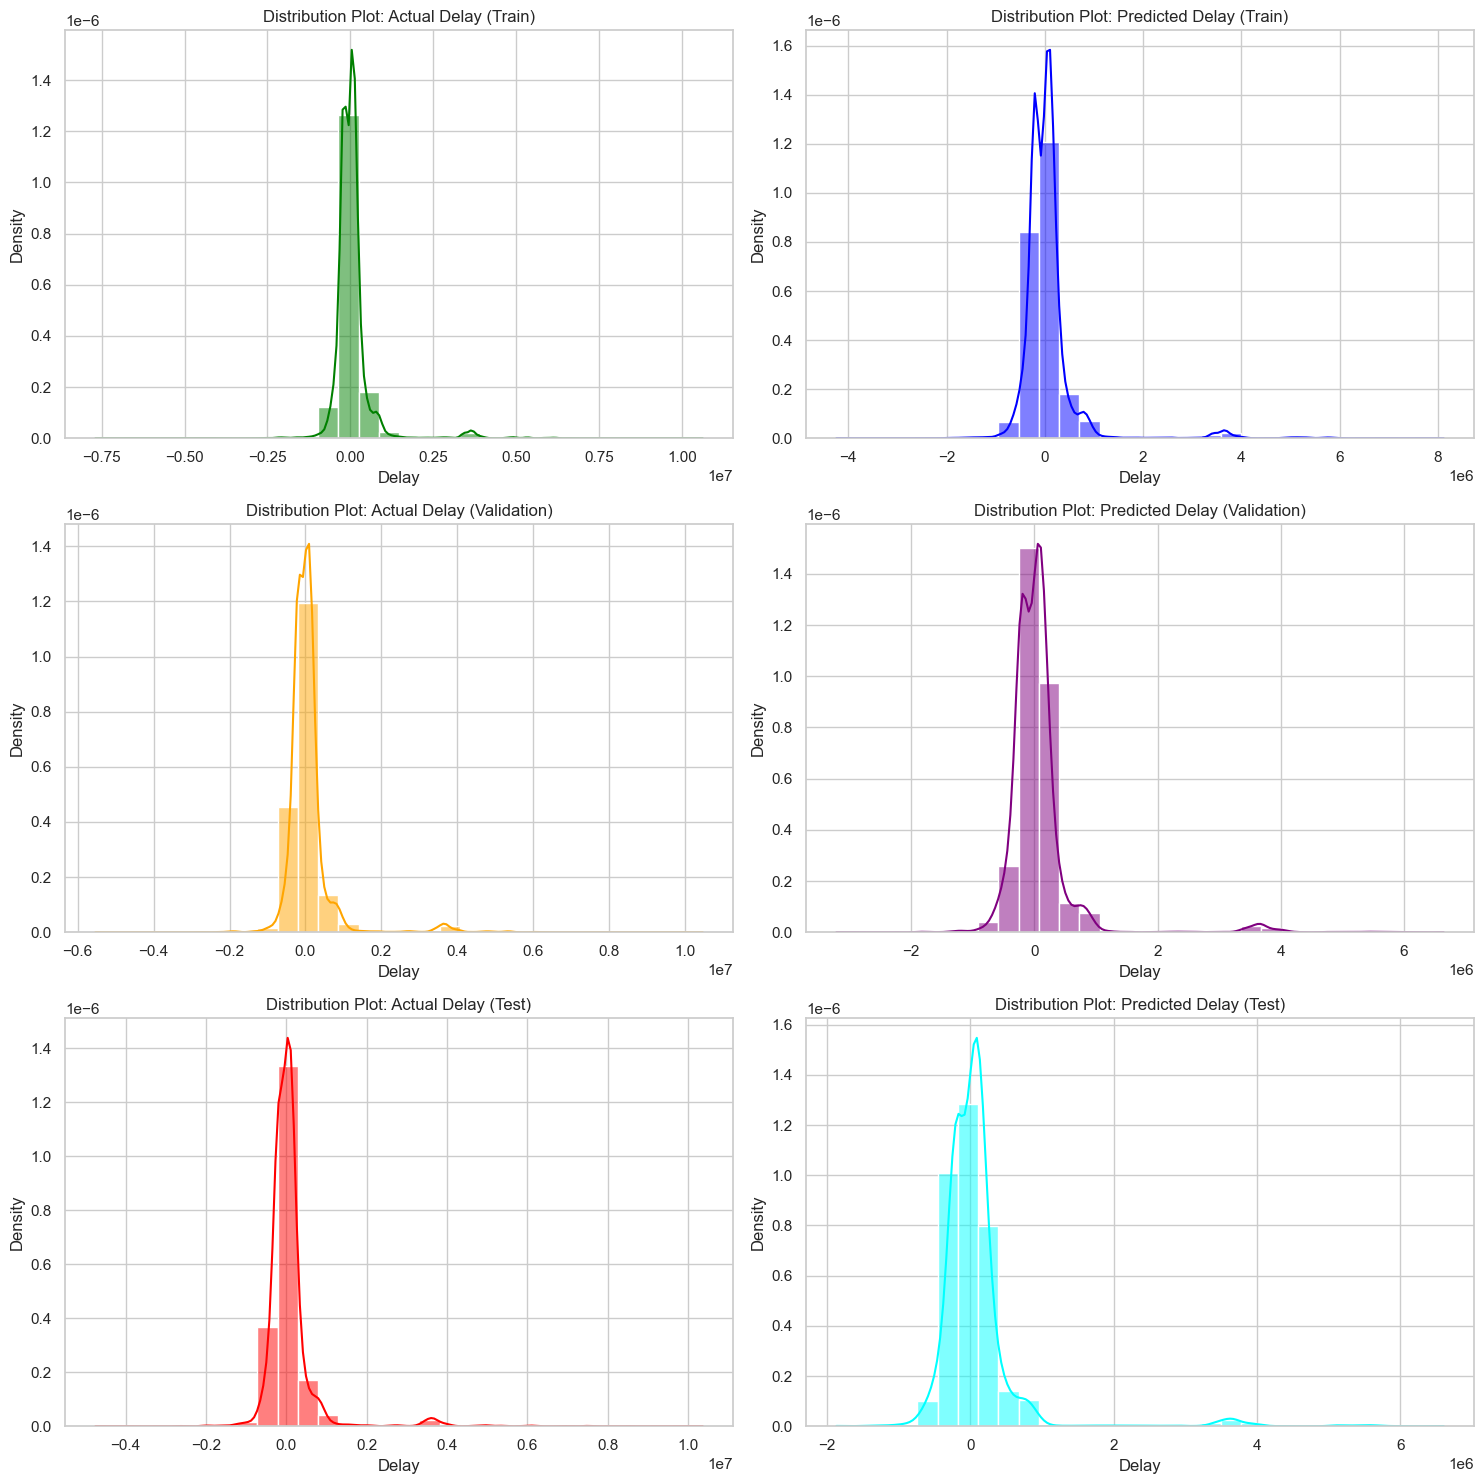

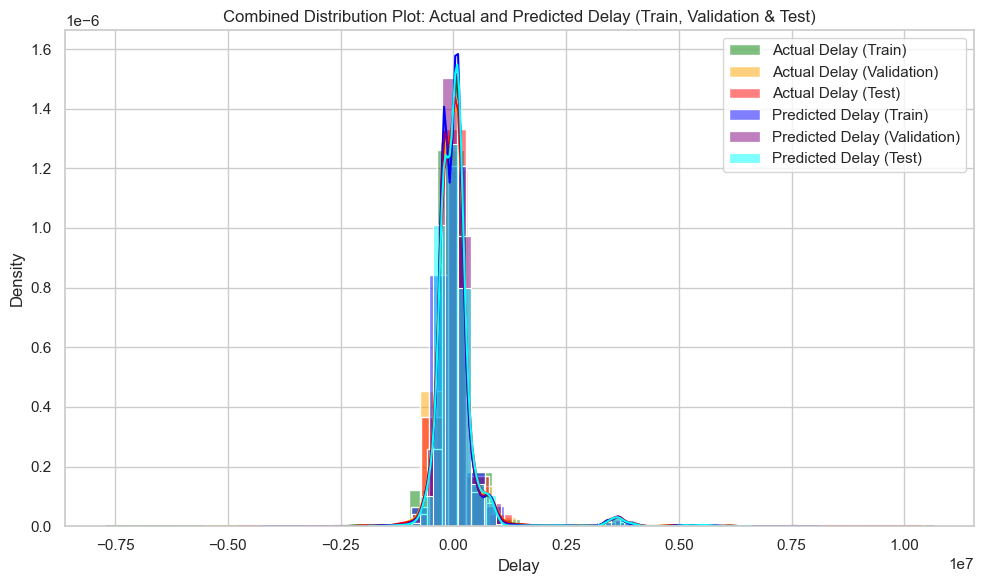

In [159]:
# Assuming Y_train, X_train, X_val, Y_val, X_test, Y_test are already defined and are NumPy arrays

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Generate predictions using the trained model
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

# Ensure Y_train, Y_val, Y_test, and Y_pred are 1-dimensional arrays (flatten if necessary)
Y_train = Y_train.flatten() if hasattr(Y_train, 'flatten') else Y_train
Y_val = Y_val.flatten() if hasattr(Y_val, 'flatten') else Y_val
Y_test = Y_test.flatten() if hasattr(Y_test, 'flatten') else Y_test
Y_pred_train = Y_pred_train.flatten() if hasattr(Y_pred_train, 'flatten') else Y_pred_train
Y_pred_val = Y_pred_val.flatten() if hasattr(Y_pred_val, 'flatten') else Y_pred_val
Y_pred_test = Y_pred_test.flatten() if hasattr(Y_pred_test, 'flatten') else Y_pred_test

# Create a figure for the subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot for Y_train (Actual Delay in training set)
sns.histplot(Y_train, color='green', kde=True, stat="density", bins=30, ax=axes[0, 0])
axes[0, 0].set_xlabel('Delay')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Distribution Plot: Actual Delay (Train)')

# Plot for Y_pred_train (Predicted Delay in training set)
sns.histplot(Y_pred_train, color='blue', kde=True, stat="density", bins=30, ax=axes[0, 1])
axes[0, 1].set_xlabel('Delay')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Distribution Plot: Predicted Delay (Train)')

# Plot for Y_val (Actual Delay in validation set)
sns.histplot(Y_val, color='orange', kde=True, stat="density", bins=30, ax=axes[1, 0])
axes[1, 0].set_xlabel('Delay')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Distribution Plot: Actual Delay (Validation)')

# Plot for Y_pred_val (Predicted Delay in validation set)
sns.histplot(Y_pred_val, color='purple', kde=True, stat="density", bins=30, ax=axes[1, 1])
axes[1, 1].set_xlabel('Delay')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Distribution Plot: Predicted Delay (Validation)')

# Plot for Y_test (Actual Delay in test set)
sns.histplot(Y_test, color='red', kde=True, stat="density", bins=30, ax=axes[2, 0])
axes[2, 0].set_xlabel('Delay')
axes[2, 0].set_ylabel('Density')
axes[2, 0].set_title('Distribution Plot: Actual Delay (Test)')

# Plot for Y_pred_test (Predicted Delay in test set)
sns.histplot(Y_pred_test, color='cyan', kde=True, stat="density", bins=30, ax=axes[2, 1])
axes[2, 1].set_xlabel('Delay')
axes[2, 1].set_ylabel('Density')
axes[2, 1].set_title('Distribution Plot: Predicted Delay (Test)')

# Adjust layout
plt.tight_layout()

# Save the plot as jpg image file 
plt.savefig('Distribution_plot_for_actual_and_predicted_Delay.jpg')

# Show the subplots
plt.show()

# Create a new figure for the total combined plot
plt.figure(figsize=(10, 6))

# Plot the combined distributions for actual delays
sns.histplot(Y_train, color='green', kde=True, stat="density", bins=30, label='Actual Delay (Train)')
sns.histplot(Y_val, color='orange', kde=True, stat="density", bins=30, label='Actual Delay (Validation)')
sns.histplot(Y_test, color='red', kde=True, stat="density", bins=30, label='Actual Delay (Test)')

# Plot the combined distributions for predicted delays
sns.histplot(Y_pred_train, color='blue', kde=True, stat="density", bins=30, label='Predicted Delay (Train)')
sns.histplot(Y_pred_val, color='purple', kde=True, stat="density", bins=30, label='Predicted Delay (Validation)')
sns.histplot(Y_pred_test, color='cyan', kde=True, stat="density", bins=30, label='Predicted Delay (Test)')

# Set labels and title for the combined plot
plt.xlabel('Delay')
plt.ylabel('Density')
plt.title('Combined Distribution Plot: Actual and Predicted Delay (Train, Validation & Test)')

# Add legend
plt.legend()

# Show the combined plot
plt.tight_layout()
plt.savefig('Distribution_plot_for_actual_and_predicted_Delay1.jpg')
plt.show()

# Now you need to pass the Nulldata dataframe into this machine learning model:

In [160]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd
3,CA02,140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,30,3,2020,31,3,2020,10,4,2020,2309.79
7,U001,200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,19,3,2020,19,3,2020,3,4,2020,11173.02
10,U001,200418007,AM,NaN,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,11,3,2020,11,3,2020,26,3,2020,3525.59
14,U001,200739534,OK systems,NaN,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,15,4,2020,15,4,2020,30,4,2020,121105.65
15,U001,200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,23,4,2020,16,4,2020,26,4,2020,3726.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,10,3,2020,10,3,2020,25,3,2020,13114.99
49980,U001,200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,3,5,2020,3,5,2020,18,5,2020,8899.71
49982,U001,200148860,DOLLA co,NaN,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,11,3,2020,11,3,2020,26,3,2020,4967.06
49992,U001,200900909,SYSCO co,NaN,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,25,3,2020,25,3,2020,9,4,2020,1998.64


In [161]:
nulldata.to_csv("dataset.csv")

In [162]:
nulldata.shape

(9681, 20)

In [163]:
nulldata.describe()

,cust_number,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd
count,9.681000e+03,9681.0,9.681000e+03,9681,9681,9681,9681.000000,9681.000000,9681.0,9681.000000,9681.000000,9681.0,9681.000000,9681.000000,9681.0,9681.000000
mean,1.896688e+08,2020.0,2.006165e+09,2020-04-01 02:58:11.788038656,2020-04-17 19:15:09.203594496,2020-04-01 01:57:21.586612992,14.988018,3.553972,2020.0,14.767276,3.559860,2020.0,16.011879,4.067452,2020.0,32065.681125
min,1.020000e+02,2020.0,1.930535e+09,2020-02-27 00:00:00,2020-02-27 00:00:00,2020-02-27 00:00:00,1.000000,2.000000,2020.0,1.000000,2.000000,2020.0,1.000000,2.000000,2020.0,0.720000
25%,2.007049e+08,2020.0,1.930658e+09,2020-03-16 00:00:00,2020-04-01 00:00:00,2020-03-16 00:00:00,6.000000,3.000000,2020.0,6.000000,3.000000,2020.0,9.000000,4.000000,2020.0,5607.190000
50%,2.007623e+08,2020.0,1.930731e+09,2020-03-30 00:00:00,2020-04-16 00:00:00,2020-03-31 00:00:00,14.000000,3.000000,2020.0,15.000000,3.000000,2020.0,16.000000,4.000000,2020.0,19024.190000
75%,2.007696e+08,2020.0,1.930818e+09,2020-04-17 00:00:00,2020-05-05 00:00:00,2020-04-17 00:00:00,23.000000,4.000000,2020.0,23.000000,4.000000,2020.0,23.000000,5.000000,2020.0,47752.640000
max,2.009927e+08,2020.0,2.960636e+09,2020-05-22 00:00:00,2020-07-10 00:00:00,2020-05-22 00:00:00,31.000000,5.000000,2020.0,31.000000,5.000000,2020.0,31.000000,7.000000,2020.0,653644.800000
std,3.288344e+07,0.0,2.673629e+08,NaN,NaN,NaN,9.215345,0.733218,0.0,9.298942,0.733606,0.0,8.282896,0.761615,0.0,35419.613688


In [164]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9681 entries, 3 to 49995
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          9681 non-null   object        
 1   cust_number            9681 non-null   int64         
 2   name_customer          9681 non-null   object        
 3   clear_date             0 non-null      object        
 4   buisness_year          9681 non-null   float64       
 5   doc_id                 9681 non-null   float64       
 6   posting_date           9681 non-null   datetime64[ns]
 7   due_in_date            9681 non-null   datetime64[ns]
 8   baseline_create_date   9681 non-null   datetime64[ns]
 9   cust_payment_terms     9681 non-null   object        
 10  posting_day            9681 non-null   int32         
 11  posting_month          9681 non-null   int32         
 12  posting_year           9681 non-null   int32         
 13  baselin

# Storing the Nulldata into a different dataset :

In [165]:
nulldata1=nulldata.copy()
nulldata1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd
3,CA02,140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,30,3,2020,31,3,2020,10,4,2020,2309.79
7,U001,200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,19,3,2020,19,3,2020,3,4,2020,11173.02
10,U001,200418007,AM,NaN,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,11,3,2020,11,3,2020,26,3,2020,3525.59
14,U001,200739534,OK systems,NaN,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,15,4,2020,15,4,2020,30,4,2020,121105.65
15,U001,200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,23,4,2020,16,4,2020,26,4,2020,3726.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,10,3,2020,10,3,2020,25,3,2020,13114.99
49980,U001,200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,3,5,2020,3,5,2020,18,5,2020,8899.71
49982,U001,200148860,DOLLA co,NaN,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,11,3,2020,11,3,2020,26,3,2020,4967.06
49992,U001,200900909,SYSCO co,NaN,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,25,3,2020,25,3,2020,9,4,2020,1998.64


# Manually converting 'cust_number'  column into integer :

In [166]:
# Check the datatype of the 'cust_number' column
print(nulldata['cust_number'].dtype)

# If the datatype is not 'object' (string), convert it to string
if nulldata['cust_number'].dtype != 'object':
    nulldata['cust_number'] = nulldata['cust_number'].astype(str)

# Now, replace the string values with integers
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA', "1").str.replace('CCU', "2").str.replace('CC', "3").astype(np.int64)

int64


# Label encoding :

In [167]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Columns to be label encoded
columns_to_encode = ['name_customer', 'cust_payment_terms', 'business_code']

# Apply label encoding to each specified column
for column in columns_to_encode:
    nulldata[column] = label_encoder.fit_transform(nulldata[column])

# Display the dataframe to see the changes
print(nulldata.head())

    business_code  cust_number  name_customer clear_date  buisness_year  \
3               0    140105686           1535        NaN         2020.0   
7               1    200744019           1593        NaN         2020.0   
10              1    200418007             62        NaN         2020.0   
14              1    200739534           1145        NaN         2020.0   
15              1    200353024            417        NaN         2020.0   

          doc_id posting_date due_in_date baseline_create_date  \
3   2.960623e+09   2020-03-30  2020-04-10           2020-03-31   
7   1.930659e+09   2020-03-19  2020-04-03           2020-03-19   
10  1.930611e+09   2020-03-11  2020-03-26           2020-03-11   
14  1.930788e+09   2020-04-15  2020-04-30           2020-04-15   
15  1.930817e+09   2020-04-23  2020-04-26           2020-04-16   

    cust_payment_terms  posting_day  posting_month  posting_year  \
3                    4           30              3          2020   
7               

In [168]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9681 entries, 3 to 49995
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   business_code          9681 non-null   int32         
 1   cust_number            9681 non-null   int64         
 2   name_customer          9681 non-null   int32         
 3   clear_date             0 non-null      object        
 4   buisness_year          9681 non-null   float64       
 5   doc_id                 9681 non-null   float64       
 6   posting_date           9681 non-null   datetime64[ns]
 7   due_in_date            9681 non-null   datetime64[ns]
 8   baseline_create_date   9681 non-null   datetime64[ns]
 9   cust_payment_terms     9681 non-null   int32         
 10  posting_day            9681 non-null   int32         
 11  posting_month          9681 non-null   int32         
 12  posting_year           9681 non-null   int32         
 13  baselin

# You need to extract day, month and year from the "clear_date" column :

In [169]:
nulldata['clear_date'] = pd.to_datetime(nulldata['clear_date'])

In [170]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

In [171]:
nulldata.dtypes

business_code                     int32
cust_number                       int64
name_customer                     int32
clear_date               datetime64[ns]
buisness_year                   float64
doc_id                          float64
posting_date             datetime64[ns]
due_in_date              datetime64[ns]
baseline_create_date     datetime64[ns]
cust_payment_terms                int32
posting_day                       int32
posting_month                     int32
posting_year                      int32
baseline_create_day               int32
baseline_create_month             int32
baseline_create_year              int32
due_in_day                        int32
due_in_month                      int32
due_in_year                       int32
converted_usd                   float64
day_of_cleardate                float64
month_of_cleardate              float64
year_of_cleardate               float64
dtype: object

# Now you need to drop all the unnecessary columns 

"baseline_create_date"

"due_in_date"

"posting_date"

"clear_date"

'day_of_cleardate'

"month_of_cleardate"

"year_of_cleardate"

In [172]:
drop_c=["baseline_create_date","due_in_date","posting_date","clear_date",'day_of_cleardate',"month_of_cleardate","year_of_cleardate"]
nulldata=nulldata.drop(columns=drop_c)
nulldata.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd
3,0,140105686,1535,2020.0,2.960623e+09,4,30,3,2020,31,3,2020,10,4,2020,2309.79
7,1,200744019,1593,2020.0,1.930659e+09,12,19,3,2020,19,3,2020,3,4,2020,11173.02
10,1,200418007,62,2020.0,1.930611e+09,12,11,3,2020,11,3,2020,26,3,2020,3525.59
14,1,200739534,1145,2020.0,1.930788e+09,12,15,4,2020,15,4,2020,30,4,2020,121105.65
15,1,200353024,417,2020.0,1.930817e+09,30,23,4,2020,16,4,2020,26,4,2020,3726.06


# Check the information on Nulldata1 Dataframe :

In [173]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_code          9681 non-null   int32  
 1   cust_number            9681 non-null   int64  
 2   name_customer          9681 non-null   int32  
 3   buisness_year          9681 non-null   float64
 4   doc_id                 9681 non-null   float64
 5   cust_payment_terms     9681 non-null   int32  
 6   posting_day            9681 non-null   int32  
 7   posting_month          9681 non-null   int32  
 8   posting_year           9681 non-null   int32  
 9   baseline_create_day    9681 non-null   int32  
 10  baseline_create_month  9681 non-null   int32  
 11  baseline_create_year   9681 non-null   int32  
 12  due_in_day             9681 non-null   int32  
 13  due_in_month           9681 non-null   int32  
 14  due_in_year            9681 non-null   int32  
 15  converte

# Compare "nulldata" with the "X_test" dataframe :

In [174]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7832 entries, 4945 to 35187
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_code          7832 non-null   int32  
 1   cust_number            7832 non-null   int64  
 2   name_customer          7832 non-null   int32  
 3   buisness_year          7832 non-null   float64
 4   doc_id                 7832 non-null   float64
 5   cust_payment_terms     7832 non-null   int32  
 6   posting_day            7832 non-null   int32  
 7   posting_month          7832 non-null   int32  
 8   posting_year           7832 non-null   int32  
 9   baseline_create_day    7832 non-null   int32  
 10  baseline_create_month  7832 non-null   int32  
 11  baseline_create_year   7832 non-null   int32  
 12  due_in_day             7832 non-null   int32  
 13  due_in_month           7832 non-null   int32  
 14  due_in_year            7832 non-null   int32  
 15  conve

In [175]:
X_test.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'cust_payment_terms', 'posting_day', 'posting_month',
       'posting_year', 'baseline_create_day', 'baseline_create_month',
       'baseline_create_year', 'due_in_day', 'due_in_month', 'due_in_year',
       'converted_usd'],
      dtype='object')

In [176]:
nulldata.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'cust_payment_terms', 'posting_day', 'posting_month',
       'posting_year', 'baseline_create_day', 'baseline_create_month',
       'baseline_create_year', 'due_in_day', 'due_in_month', 'due_in_year',
       'converted_usd'],
      dtype='object')

In [177]:
nulldata2=nulldata[['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'cust_payment_terms', 'posting_day', 'posting_month',
       'posting_year', 'baseline_create_day', 'baseline_create_month',
       'baseline_create_year', 'due_in_day', 'due_in_month', 'due_in_year',
       'converted_usd']]

# Display the final dataset

In [178]:
nulldata2

,business_code,cust_number,name_customer,buisness_year,doc_id,cust_payment_terms,posting_day,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd
3,0,140105686,1535,2020.0,2.960623e+09,4,30,3,2020,31,3,2020,10,4,2020,2309.79
7,1,200744019,1593,2020.0,1.930659e+09,12,19,3,2020,19,3,2020,3,4,2020,11173.02
10,1,200418007,62,2020.0,1.930611e+09,12,11,3,2020,11,3,2020,26,3,2020,3525.59
14,1,200739534,1145,2020.0,1.930788e+09,12,15,4,2020,15,4,2020,30,4,2020,121105.65
15,1,200353024,417,2020.0,1.930817e+09,30,23,4,2020,16,4,2020,26,4,2020,3726.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,1,200769623,1707,2020.0,1.930625e+09,28,10,3,2020,10,3,2020,25,3,2020,13114.99
49980,1,200769623,1705,2020.0,1.930851e+09,28,3,5,2020,3,5,2020,18,5,2020,8899.71
49982,1,200148860,458,2020.0,1.930638e+09,12,11,3,2020,11,3,2020,26,3,2020,4967.06
49992,1,200900909,1569,2020.0,1.930702e+09,12,25,3,2020,25,3,2020,9,4,2020,1998.64


In [179]:
# Now you can pass this dataset into you final model and store it into "final_result" :

In [180]:
final_result = regressorfinal.predict(nulldata2)
final_result

array([567552.37, 105927.85, 126036.1 , ...,  39630.1 ,  59168.71,
        69751.05])

In [181]:
# You need to make the final_result as dataframe, with a column name "avg_delay"

# Note - No need to change the code

In [182]:
final_result = pd.Series(final_result,name='avg_delay')

In [183]:
final_result

0       567552.37
1       105927.85
2       126036.10
3       613481.61
4       265447.83
          ...    
9676     14529.22
9677    -59804.89
9678     39630.10
9679     59168.71
9680     69751.05
Name: avg_delay, Length: 9681, dtype: float64

In [184]:
# Now you need to merge this final_result dataframe with the "nulldata" Dataframe which we have created in earlier steps :

In [185]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

In [186]:
# Display the final DataFrame :

In [187]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,...,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,avg_delay
0,3,CA02,140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,...,3,2020,31,3,2020,10,4,2020,2309.79,567552.37
1,7,U001,200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,...,3,2020,19,3,2020,3,4,2020,11173.02,105927.85
2,10,U001,200418007,AM,NaN,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,...,3,2020,11,3,2020,26,3,2020,3525.59,126036.10
3,14,U001,200739534,OK systems,NaN,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,...,4,2020,15,4,2020,30,4,2020,121105.65,613481.61
4,15,U001,200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,...,4,2020,16,4,2020,26,4,2020,3726.06,265447.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,...,3,2020,10,3,2020,25,3,2020,13114.99,14529.22
9677,49980,U001,200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,...,5,2020,3,5,2020,18,5,2020,8899.71,-59804.89
9678,49982,U001,200148860,DOLLA co,NaN,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,...,3,2020,11,3,2020,26,3,2020,4967.06,39630.10
9679,49992,U001,200900909,SYSCO co,NaN,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,...,3,2020,25,3,2020,9,4,2020,1998.64,59168.71


In [188]:
# Check for the number of rows and columns in the Final DataFrame :

In [189]:
Final.shape

(9681, 22)

# Now, you need to do convert the below fields back into date and time format

#Convert "due_in_date" into datetime format

#Convert "avg_delay" into datetime format

#Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"

#display the new "clear_date" column

#Note - Code is given below, no need to change

In [190]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

In [191]:
# Display the "Clear_date" column :

In [192]:
Final['clear_date']

0      2020-04-16 13:39:12.370
1      2020-04-04 05:25:27.850
2      2020-03-27 11:00:36.100
3      2020-05-07 02:24:41.610
4      2020-04-29 01:44:07.830
                 ...          
9676   2020-03-25 04:02:09.220
9677   2020-05-17 07:23:15.110
9678   2020-03-26 11:00:30.100
9679   2020-04-09 16:26:08.710
9680   2020-05-06 19:22:31.050
Name: clear_date, Length: 9681, dtype: datetime64[ns]

In [193]:
Final['clear_date']=(Final['clear_date'].apply(lambda x : pd.to_datetime(str(x)))).dt.date

In [194]:
# Convert the average delay into number of days format¶

# Note - Formula = avg_delay//(24 * 3600)

# Note - full code is given for this, no need to change

In [195]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

In [196]:
Final['avg_delay']

0       6.0
1       1.0
2       1.0
3       7.0
4       3.0
       ... 
9676    0.0
9677   -1.0
9678    0.0
9679    0.0
9680    0.0
Name: avg_delay, Length: 9681, dtype: float64

In [197]:
# Display basic statistics

print(Final['avg_delay'].describe())

count    9681.000000
mean        2.357814
std         6.549514
min       -17.000000
25%        -1.000000
50%         1.000000
75%         3.000000
max        52.000000
Name: avg_delay, dtype: float64


In [198]:
# Calculate additional statistics if needed

min_value = Final['avg_delay'].min()
max_value = Final['avg_delay'].max()
mean_value = Final['avg_delay'].mean()
median_value = Final['avg_delay'].median()

print(f'Min: {min_value}, Max: {max_value}, Mean: {mean_value}, Median: {median_value}')

Min: -17.0, Max: 52.0, Mean: 2.3578142753847744, Median: 1.0


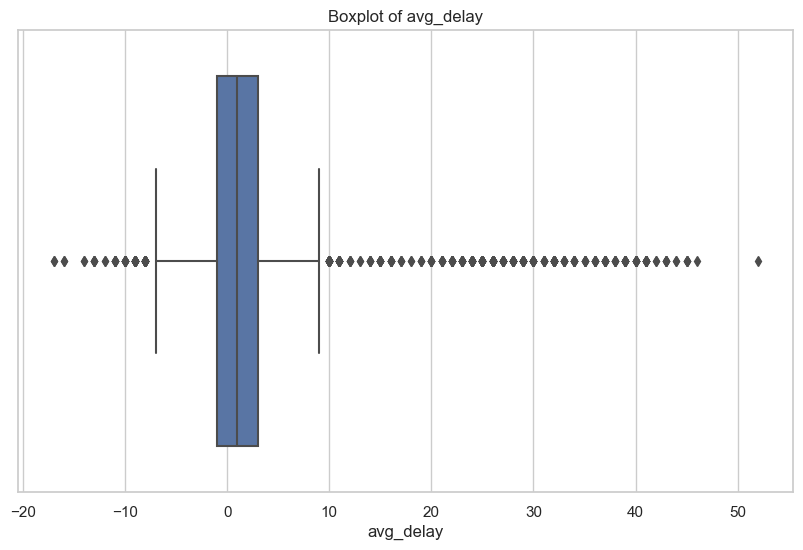

In [199]:
# Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=Final['avg_delay'])
plt.title('Boxplot of avg_delay')
plt.xlabel('avg_delay')
plt.show()

# Now you need to convert average delay column into bucket :

In [200]:
# Define the bins and labels
bins = [-float('inf'), 0, 10, float('inf')]
labels = ['On time', 'Late', ' Likely to be Overdue']

# Perform binning using the cut() function
Final['Customer Status'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

# Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe :

In [201]:
Final=Final.drop(columns=['key_0','avg_delay'])

In [202]:
# Display the count of each categoty of new "Customer Status" column

In [203]:
Final['Customer Status'].value_counts()

Customer Status
Late                     5927
On time                  3268
 Likely to be Overdue     486
Name: count, dtype: int64

In [204]:
# Display your final dataset with aging buckets :

In [205]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,...,posting_month,posting_year,baseline_create_day,baseline_create_month,baseline_create_year,due_in_day,due_in_month,due_in_year,converted_usd,Customer Status
0,CA02,140105686,SYSC llc,2020-04-16,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,...,3,2020,31,3,2020,10,4,2020,2309.79,Late
1,U001,200744019,TARG us,2020-04-04,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,...,3,2020,19,3,2020,3,4,2020,11173.02,Late
2,U001,200418007,AM,2020-03-27,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,...,3,2020,11,3,2020,26,3,2020,3525.59,Late
3,U001,200739534,OK systems,2020-05-07,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,...,4,2020,15,4,2020,30,4,2020,121105.65,Late
4,U001,200353024,DECA corporation,2020-04-29,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,...,4,2020,16,4,2020,26,4,2020,3726.06,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,200769623,WAL-MAR in,2020-03-25,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,...,3,2020,10,3,2020,25,3,2020,13114.99,Late
9677,U001,200769623,WAL-MAR corporation,2020-05-17,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,...,5,2020,3,5,2020,18,5,2020,8899.71,On time
9678,U001,200148860,DOLLA co,2020-03-26,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,...,3,2020,11,3,2020,26,3,2020,4967.06,Late
9679,U001,200900909,SYSCO co,2020-04-09,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,...,3,2020,25,3,2020,9,4,2020,1998.64,Late


# Store this dataframe into the .csv format :

In [206]:
Final.to_csv('dataset.csv')

# END OF THE PROJECT